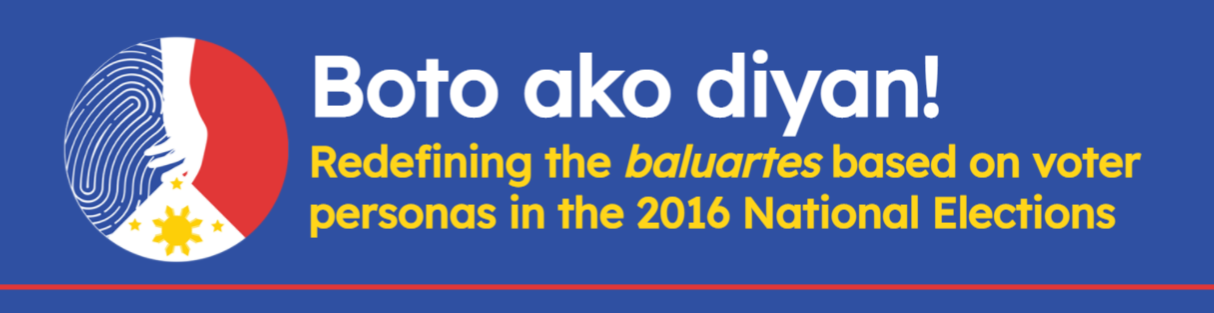

## <span style="color:#2f50a2;">Executive Summary</span>

The 2016 national elections saw the highest voter turnout for the Philippines since 1986. Considered widely as the strongest vote of confidence for President Rodrigo Duterte and Vice President Leni Robredo, the extent of their wins has only been explained in terms of their geographical bailiwicks (“baluarte”). However, **this study extends the definition of baluartes from mere geographic barriers into voter profiles (the “Study”). We also explored the characteristics of these bailiwicks especially in terms of (1) voter turnout or the level of voting participation of a particular region and (2) number of registered voters in an area.** These numbers largely define the outcome of the elections for a candidate.


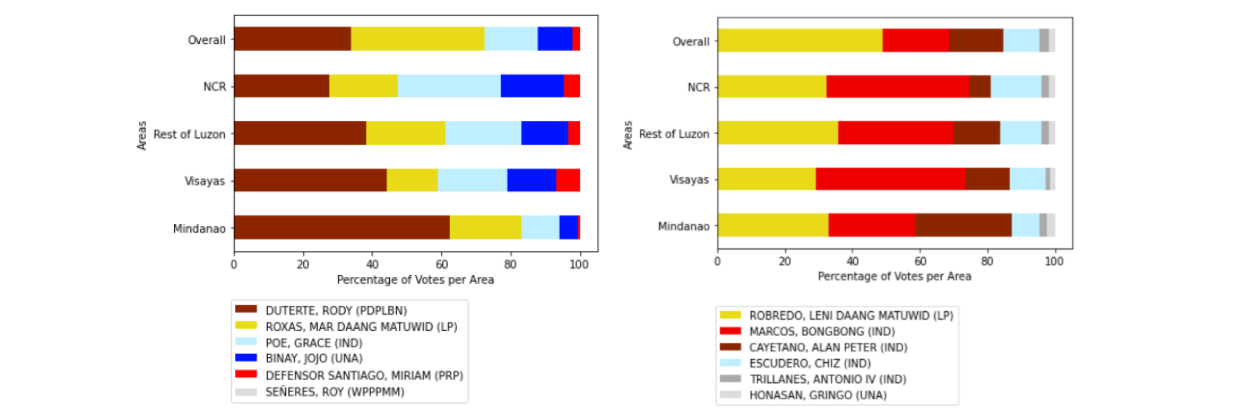

<center><b><font size=2>Figure 1. Share of votes of presidential and vice presidential bets </font></b></center>
<center><font size=2><font color="gray">For the code of this figure, kindly refer to the Appendix.</font></font></center>

We applied an exploratory data analysis on available demographic data from COMELEC to surface insights and evidence on profiles, turnouts, and voting patterns which revealed stark polarization beyond geographical location. Specifically, we addressed the following research questions:
1. How does the voter profile (e.g. age, sex, marital status, literacy rate, persons with disability) differ among candidates’ winning provinces? Describe the general voter profile as well.
2. What insights can we draw from the candidates’ baluartes in terms of:<br>
    a. Share of votes (%) and registered voters among provinces to maximize winnability<br>
    b. Preferred presidential and vice presidential tandem among regions 

This Study has a heavy application of data mining and wrangling with the following steps in our methodology:
1. Examining the two separate COMELEC datasets on voter profile and election outcomes;
2. Extracting the election outcomes data from 181,282 nested JSON files containing the electoral data per precinct;
3. Cleaning the data and handling nuances in merging the two datasets (voter profile and election outcomes) using the `City/Municipality` as the merging key;
4. Merging the two datasets and storing them in a unified data frame for the presidential candidates (with a shape of 466,134 rows x 31 cols) and vice presidential candidates (522,384 rows x 31 cols). Row number is a factor of the number of precincts and candidates in a position. Columns refer to the election outcome (number of votes) and voter profile (e.g. sex, age, literacy rate, among others);
5. Performing exploratory data analysis to address the research questions; and
6. Harnessing insights and researching academic studies to support our analysis.


In response to the objectives of this study, our key insights are as follows: 
1. Beyond geographical baluartes, we unearthed select insights on voter profiles of the winning candidates:
 - *Age*: Duterte appears to be popular across all age groups, while Roxas is popular with younger voters, and Poe with older voters. Robredo is popular among younger voters while Marcos with older voters. 
 - *Marital status*: Duterte won in provinces with more single voters, while Binay is popular among provinces with more married ones. Unlike the presidential bets, Robredo and Marcos both appear to be popular among single and married registered voters.
 - *Literacy rate*: Duterte is popular among provinces that have the highest and lowest literacy rate (i.e. polarized literacy rates). Marcos dominates provinces with the highest literacy rate while Robredo is popular among the lowest ones. 
 - *Voter turnouts*: Duterte predominantly won in regions with less-than-average voter turnouts (mostly Mindanaoans), while Poe garnered the highest votes in regions that have higher-than-average. Robredo won in more regions with less-than-average voter turnout, despite the “Solid North” support to Marcos.
2. The most significant difference between the regions with high voter turnout and low voter turnout is their literacy rate. High voter turnout regions have higher literacy rates (around 98%) on average, while low voter turn out regions have lower (around 92%).
3. Mindanao regions and provinces have less-than-average number of registered voters and voter turnouts, but their unified voting-choice led to the win of the Duterte-Robredo presidential and vice presidential race. 
4. Duterte’s votes are polarized in Mindanao, while Robredo’s votes come from vote-rich provinces (i.e. higher than average registered voters) across all main island groups. 
5. Voters across all regions do not vote for a party (or tandem); they vote for individual candidates. It was only Region 11 (Davao Region) who voted for the Duterte-Cayetano tandem.

Our recommendations for next steps and avenues of further research are as follows:
1. We have only focused on the Presidential and Vice-Presidential race, and have excluded other political positions. Considering other factors, such as political parties, is worth exploring to appreciate a complete picture of the 2016 national elections; 
2. We did not validate the raw data in Jojie with other external sources, such as counts from election watchdogs or the media, in the interest of time. Our findings would benefit from further validation and review; and
3. We focused on an exploratory analysis approach for this study, specifically, describing the profile of the regions/provinces where each of the candidates won. Future researchers may further explore predicting, and not merely describing, the effect of a voter’s demographic profile on his/her candidate of choice.

In light of the upcoming 2022 elections, we hope that this exploratory study would not only help candidates to identify their bailiwicks, but more to support government leaders and non-profit efforts towards targeted voter engagement and registration, which has been made difficult due to government restrictions during the COVID-19 pandemic. Moreover, we hope that this extended definition of baluartes helps the candidates better strategize their campaign strategy in the upcoming elections, especially the servant leaders who put the country’s welfare first instead of their own. 



## <span style="color:#2f50a2;">Introduction</span>

### <span style="color:#2f50a2;">Overview</span>

Voting behavior and preference has been a perennial interest among researchers, mostly because a paradox exists: while politicians are expected to be *representatives* of its citizens, those elected do not reflect the actual reality. In the Philippines, overrepresentation of some groups and underrepresentation of others has existed and is well-documented in its party list system ([Fermin, 2001](#fermin); [Jallorina, 2021](#jallorina); [Teehankee, 2020](#teehankee)).

In other offices, however, positions are much more limited. Consider the presidential and vice-presidential elections: because only one individual can sit in either office, candidates must appeal to multiple identities and social groups all at once. Political scientists have thus made several attempts to understand voter behavior and preference in this context: do citizens vote for the candidates that they identify with demographically? Studies are also conflicted, with some suggesting that demographics affect and possibly predict election outcomes ([McDermott, 1998](#mcdermott)), and others seeing weak to no effect at all ([Ansolabehere and Hersh, 2011](#ansolabehere)). 

The Philippines is an interesting case, having traditionally been a highly engaged electorate. Voter turnout for presidential elections from 1945 to 2010 averaged at 77.8%, higher than the average across all of Asia ([Holmes, 2016](#holmes)). In fact, 2016 alone was the **highest** voter turnout since democracy was restored in 1986. This has led several experts analyzing the President's appeal and charisma, describing it as an "electoral earthquake" which had its own "aftershocks" amidst a politics of anxiety ([Arugay, 2017](#arugay); [Curato, 2016](#curato)). [Abinales (2016)](#abinales) even goes to say that 

> [Rodrigo] Duterte was the most preferred candidate of the rich and the poor, young and old, the educated and the semi‐literate, men and women, and urbanites and peasants. 

Yet so far, the extent of his win has only been explained in terms of his bailiwicks and not to other demographic information. In this report, we explore and attempt to provide evidence on voting patterns among citizens, using publicly-available data from the 2016 Philippine Presidential and Vice Presidential elections. We applied an exploratory data analysis using official government information from the Philippine Commission on Elections (COMELEC), most data of which was gathered from a public Python scraper ([Alis, 2016](#alis)).

### <span style="color:#2f50a2;">Research Questions</span>

The main objective of this Study is to **explore the differences among voter profiles and election outcomes of the candidates’ winning regions and provinces (the “baluartes”).** More specifically, this Study aims to answer the following research questions:
1. How does the voter profile (e.g. age, sex, marital status, literacy rate, persons with disability) differ among candidates’ winning provinces? Describe the general voter profile as well.
2. What insights can we draw upon the candidates’ baluartes in terms of:<br>
a. Share of votes (%) and registered voters among provinces to maximize winnability<br>
b. Preferred presidential and vice presidential tandem among regions 


### <span style="color:#2f50a2;">Scope and Limitations</span>

We evaluated a few limitations of this report, and have taken steps to minimize them wherever possible:

1. **Study scope**. We focused on the Presidential and Vice-Presidential race and excluded other positions in the interest of time. While this may provide an incomplete picture of the 2016 Philippine elections, we think it will not negatively impact our attempt to answer the research questions.
2. **Data entry errors**. We are aware of the risk that records may be incomplete or may contain errors, which can lead to incorrect analysis. We implemented validation routines to ensure out-of-range values and logical inconsistencies have been considered and acted upon before analysis. This is explained in a later section in this report.
3. **Observational research**. Because this is an exploratory exercise, it will not attempt to find correlations nor associations between demographics and voting behavior. We have pre-specified our research plans in our submitted `game plan`. We have slightly modified our plans but refrained from making drastic changes to prevent confirmation or hindsight biases.

## <span style="color:#2f50a2;">Rationale</span>

It is the *baluartes* or the bailiwicks that are the "most secure source of votes for a national candidate" ([Landé, 1996](#lande); [Teehankee, 2018](#teehangkee-2)). But it may be insufficient to fully explain the President and Vice-Presidential wins, as it does not fully consider the complexities of voter behavior and demographics at every national election. We have made the report based on the following:

1. This report was made in the context of the upcoming 2022 national elections, where both offices of the President and Vice-President will again be open, and candidates are forced to appeal to different identities all at the same time. Thus, candidates require identifying their bailiwicks **apart** from their area/s of birth and residence to maximize their reach and winnability.

2. Apart from candidates, however, results of this report may aid nonprofit organizations that are in the field of citizen engagement. It may possibly support efforts towards targeted voter engagement and registration, which has been made difficult due to government restrictions during the COVID-19 pandemic.

3. Finally, political strategists, consultants, and polling organizations may find the results useful in order to confirm or compare their current voter personas in preparation for the upcoming elections.

## <span style="color:#2f50a2;">Data</span>

This Study primarily uses two (2) publicly available election-related datasets. These datasets were merged on the basis of location, specifically `City/Municipality` (see Table 2) of the raw election results and profiles of the registered voters in the 2016 elections. We discussed the details of the data preprocessing in the [next section](#Methodology-and-Data-Preprocessing). Table 1 below summarizes the description, type, and sources of these datasets.
<br>
<br>

<center><left><b><font size=2> Table 1. Datasets in the Study </font></b></left>
<br>
<font size=2><font color="gray">Details and sources of the datasets</font></font></center>

| No. | Dataset | Description | Type | Source |
|:---:|:---|:---|:---|:---|
| 1 | 2016 Raw election results (“Election results”) | Vote counting machine (VCM) election results per electoral precinct | JSON  (nested JSON files) | Extracted JSON files using the scraper of [Prof. Christian Alis](https://github.com/ianalis/scraper2016). Ultimate source is COMELEC |
| 2 | 2016 Voter profile by provinces and cities or municipalities  (“Voter profile”) | Profiles of the registered voters per city/municipality | CSV | COMELEC |

<br>
From these datasets, the researchers were able to extract the variables that were used in this study (Table 2). 
<br>


<center><left><b><font size=2> Table 2. Variables in the Study </font></b></left>
<br>
<font size=2><font color="gray">Description of the variables</font></font></center>

| No.  | Variables | Variable name/s | Data type | Description | Dataset |
|:---:|:---|:---|:---|:---|:---|
| 1 | Candidate name and position to run | bName Position | STR | Name of the candidates. The Position variable differentiates the candidates for President and Vice President | Election results |
| 2 | Number of votes per candidate | votes | INT | Number of votes per candidate. In the exploratory data analysis (EDA), the votes were normalized per region by calculating the share (%) of votes of a particular candidate relative to the total city/municipality, region, or any other summation that is of interest | Election results |
| 3 | Location | Region, Province, City/Municipality | STR | This serves as the variable that links the Voter profile and Election results dataset (the “merging key”) | Election results and voter profile |
| 4 | Number of registered voters | registered_voter | INT | Number of registered voters per city and municipality in the 2016 national elections | Voter profile |
| 5 | Sex | male, female | STR | Biological sex of registered age groups | Voter profile |
| 6 | Age groups | 17-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-above |  | Age groups of registered voters  | Voter profile |
| 7 | Literacy rate | literacy | FLOAT | The percentage of the population 10 years old and over, who can read, write and understand simple messages in any language or dialect (PSA). The raw data is originally a STR, but this was type casted into FLOAT for further analysis. | Voter profile |
| 8 | Indigenous people | indigenous_people | INT | A group of people or homogenous societies identified by self-ascription and ascription by others, who have continuously lived as organized community (PSA) | Voter profile |
| 9 | Person with disability | person_with_disability | INT | Persons with disabilities including those who have long-term physical, mental, intellectual and other forms of impairments | Voter profile |
| 10 | Marital status | single, married, widow | STR | Legally defined marital state  | Voter profile |

<br>

The shapes of the merged datasets for Presidents and Vice Presidents are both **(522,384 rows x 31 columns)**, respectively. The row number is a factor of the number of precincts and candidates in a position. Columns refer to the election outcome (number of votes) and voter profile (e.g. sex, age, literacy rate, among others). Kindly note that each categorical variable (eg. `sex`) has its own column (e.g. number of `males` and `females`). The same is true for `location`, `age groups`, and `marital status`.
<br>

## <span style="color:#2f50a2;">Methodology and Data Preprocessing</span>
<a id="S5"></a>
The methodology for this Study is summarized in the following six (6) steps:
<br>
<br>
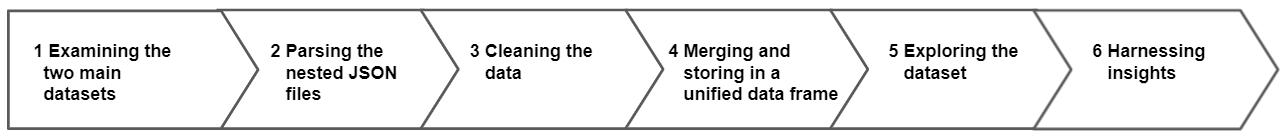

<center><b><font size=2>Figure 2. Methodology and Data Processing Steps </font></b></center>

We discussed each of these steps in the succeeding subsections:


### <span style="color:#2f50a2;">Examining the two main datasets</span>
We examined the two (2) election-related datasets that were considered in the Study. Driven by our motivation to identify the voter personas in the baluarte locations of the presidential and vice presidential candidates, we noted that the merging variable for the two separate datasets is the `City/Municipality`. However, we also noted that some of `City/Municipality` values are not the same for both datasets. For example, “Bacoor City” was present in the Election results data, but it was referred to as “Bacoor” in the Voters profile. A significant portion of our workflow is the cleaning of the datasets. For more information on the data cleaning, kindly refer to [Section 5.3: Cleaning the data](#Cleaning-the-data).

### <span style="color:#2f50a2;">Parsing the nested JSON files</span>
The Election results data are stored in nested JSON files. Figure 3 illustrates how the JSON files are nested:

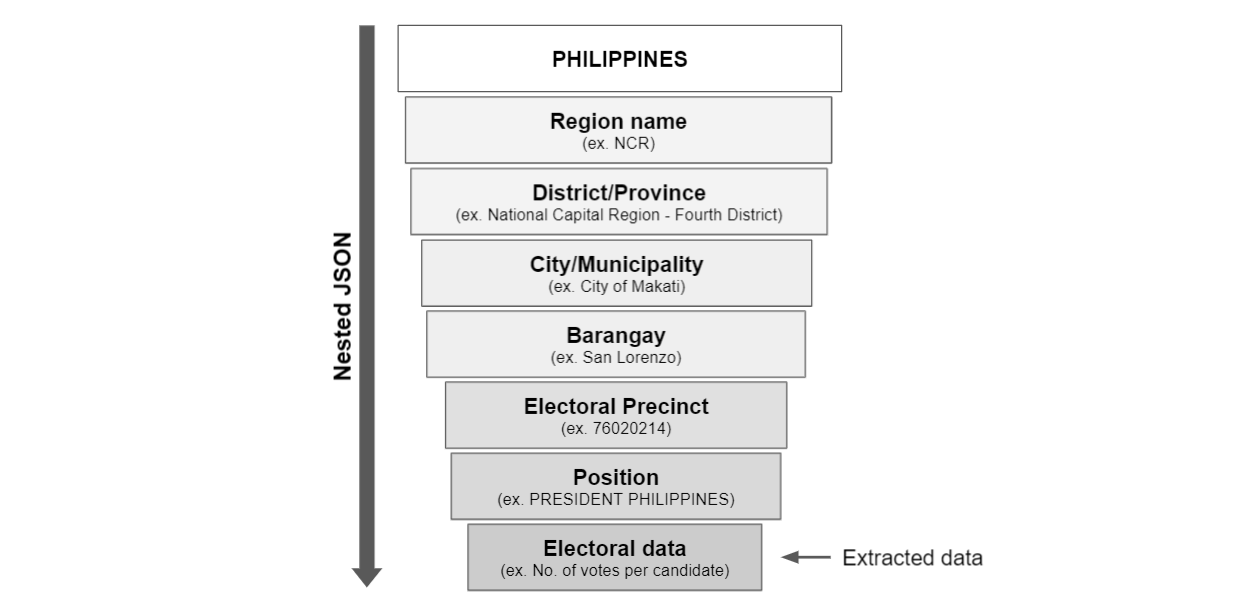

<center><b><font size=2>Figure 3. Organization of the nested JSON files </font></b></center>

The raw electoral data is stored in the innermost nest of the JSON file path. For this Study, we extracted the data from 181,282 JSON files corresponding to 90,641 unique electoral precincts x 2 positions considered (i.e. President and Vice President). While there are other positions available (e.g. Senator, Party List, and Local positions), they were not considered as they are outside of the scope of this Study. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import warnings
import json
import glob
import os
import re
from shapely.geometry import Point
from matplotlib.colors import ListedColormap
warnings.filterwarnings('ignore')
%matplotlib inline

#### <span style="color:#2f50a2;">Retrieval of file paths of JSON files and loading of the dataframe</span>

To extract the Elections result, we first stored the JSON file paths in a csv file. From there, we opened and extracted the relevant variables using the `for` loop. Afterwards, we loaded the data frame in the variable `file_df`.


In [2]:
def create_csv_from_json():
    """Create a dataFrame from filepaths of JSON files.
    
    Create a dataFrame from filepaths of all json files under
    the `/mnt/data/public/elections/nle2016/PHILIPPINES/`
    folder.
    
    Add a column `path` containing the whole filepath.
    
    Returns
    -------
    pandas DataFrame
        columns : `Region`, `District`, `City/Municipality`,
                  `Barangay`, `Precint`, `File`, `path`    
    """
    path = ('/mnt/data/public/elections/' 
            + 'nle2016/PHILIPPINES/**/*PHILIPPINES.json')

    file_list = []
    for file in glob.iglob(path, recursive = True):
        file_list.append(file)
    
    file_comp = []
    for i in file_list:
        comp = os.path.normpath(i).split(os.sep)
        file_comp.append(comp)

    file_df = (pd.DataFrame(file_comp, 
                           columns=[0,1,2,3,4,5,6,
                                    'Region',
                                    'District',
                                    'City/Municipality',
                                    'Barangay',
                                    'Precint',
                                    'File'])
               .drop(columns=[0,1,2,3,4,5,6]))

    file_df['path'] = file_list
    
    file_df.to_csv('miniproject_filepaths.csv', index=None)

########################################################################
# Create a CSV file containing all the links to the required JSON files
########################################################################
create_csv_from_json()

In [9]:
file_df = pd.read_csv('miniproject_filepaths.csv')

#### <span style="color:#2f50a2;">Creation of CSV files for each position per region</span>

To manage the time and reduce the risks of runtime error, we decided to create a csv file of the Election results for each position per region instead. The data was also cleaned on a per region basis. Details on data cleaning are in the next subsection [Section 5.3: Cleaning the data](#Cleaning-the-data). 

In [ ]:
def create_params():
    """Generate parameters needed to create `csv` files."""
    file_df = pd.read_csv('miniproject_filepaths.csv')
    regions = list(file_df.Region.unique())
    posfiles = list(file_df.File.unique())[1::2]
    positions = ['pres', 'vp']

    poscsv_list = []
    for h in positions:
        for i in regions:
            x = i.lower().split(' ')
            if len(x) == 2:
                x = h + '_' + x[0] + x[1] + '.csv'
            else:
                x = h + '_' + str(x[0]) + '.csv'
            poscsv_list.append(x)

    param_list = pd.DataFrame({'reg' : regions*2, 'poscsv' : poscsv_list})
    param_list['posfile'] = posfiles[0]
    param_list['posfile'][19:38] = posfiles[1]
    param_list['position'] = positions[0]
    param_list['position'][19:38] = positions[1]
    param_list = param_list[['reg', 'posfile', 'poscsv', 'position']]
    param_list = param_list.apply(tuple, axis=1).tolist()
    
    return param_list

def create_csv_pos(reg, posfile, poscsv, position):
    """Create `csv` file from `json` file per position.
    
    Read `miniproject_filepaths.csv` and retrieve rows
    pertaining to specified position and region. Then,
    create a csv file with the following columns:
    `bName`, `votes`, `percentage`, `canCode`,
    `Region`, `District`, `City/Municipality`,
    `Barangay`, `Precint` and `Position`.
    
    Parameters
    ----------
    posfile : json file name for the position
    poscsv : csv file name where the csv will be saved
    
    """
    file_df = pd.read_csv('miniproject_filepaths.csv')
    pos_df = (file_df[(file_df.File == posfile) &
                    (file_df['Region'] == reg)])
    pos_conso = pd.DataFrame(columns=['bName',
                                      'votes', 
                                      'percentage',
                                      'canCode',
                                      'Region',
                                      'District',
                                      'City/Municipality',
                                      'Barangay',
                                      'Precint'])
    for i in pos_df.index:
        path = os.path.normpath(pos_df['path'][i])

        with open(path, 'r') as f:    
            data = json.load(f)
            pos = pd.DataFrame.from_dict(data['results'])
            pos['cClass'] = data['cClass']
            pos['Position'] = position
            pos['Region'] = pos_df['Region'][i]
            pos['District'] = pos_df['District'][i]
            pos['City/Municipality'] = pos_df['City/Municipality'][i]
            pos['Barangay'] = pos_df['Barangay'][i]
            pos['Precint'] = pos_df['Precint'][i]
        pos_conso = pd.concat([pos_conso, pos])

    pos_conso.to_csv(poscsv, index=None)

#########################################
# generate the CSV files from JSON files 
#########################################
for i in create_params():
    create_csv_pos(str(i[0]), str(i[1]), str(i[2]), str(i[3]))

### <span style="color:#2f50a2;">Cleaning the data</span>
As noted in [Section 5.1 Examining the two main datasets](#Examining-the-two-main-datasets), we observed that the merging variable `City/Municipality` has a number of nuances. The most prominent one being the mismatch on the labelling, spelling, and tagging of cities/municipalities in the Voters profile and Election results data. We note that these nuances occurred even though both datasets ultimately came from COMELEC. 

The unique considerations in cleaning data and the remedy are summarized in Table 3 below. Our ultimate goal in the clean-up was to have the `City/Municipality` (the “merging key”) matched in between the two datasets:  Election results (JSON file) and Voters profile (CSV file).
<br>
<br>

<center><left><b><font size=2> Table 3. Considerations in Data Cleaning and Remedies </font></b></left>
<br>
<font size=2><font color="gray"> Approaches in handling data cleaning </font></font></center>
   
| No.  | Data considerations | Remedies | 
|:---:|:---|:---|
| 1 | Some cities/municipalities in the JSON file have multiple spaces (e.g. ``DAPITAN  CITY``) whereas the CSV file only has one. The Election results also label the cities in uppercase whereas the CSV files are in title case capitalization. | We created and applied functions that would handle these nuances in the data. The functions does the following: (1) Splits the `City/Municipality` using the space (if there is any) as a delimiter and then re-joins them together with a single space. This effectively addresses the cities with multiple spaces in between. (2) Converts all of the `City/Municipality` data into uppercase. |
| 2 | The character Ñ may not be properly read by different programs; there is a need to ensure that it can be read as is in whichever program. | For the purposes of matching and the analysis, we converted all of the “Ñ” and “ñ” into “N” and “n”. Example: The N-tilde in ``PEÑABLANCA`` was removed, and has now become ``PENABLANCA``.|
| 3 | There are differences in the tagging of cities with respect to their districts/partitions within the city. Examples (select only) are as follows: CSV file: “City of Makati, 1st District; City of Makati, 2nd District” vs JSON file: “CITY OF MAKATI” CSV file: “Island Garden City of Samal, Babak District; Island Garden City of Samal, Kaputian District; Island Garden City of Samal, Samal District” vs  JSON file: “ISLAND GARDEN CITY OF SAMAL” | The cities that have partitions into different districts (e.g. “City of Makati, 1st District; City of Makati, 2nd District”) are labelled using the name of their ‘parent city’ (e.g. “CITY OF MAKATI”). This applies to other cities with the same case as well. | 
| 4 | There are differences in the spelling of city labels (e.g. TBOLI vs T’BOLI; Mlang vs M’LANG) | We were able to filter which cities in the CSV file do not have a corresponding match in JSON (or vice versa). We manually handle these differences in the spelling to match each other. | 
| 5 | The JSON file has considered “Negros Island Region” (NIR) as a separate region altogether. However in the CSV file, Negros Occidental and Negros Oriental are included in Region VI and Region VII, respectively.  | We conformed to the tagging of the CSV wherein Negros Occidental and Negros Oriental should be appended to the dataframes for Region VI and Region VII, respectively. |
| 6 | There were unmatched cities even after applying the remedies in Data considerations nos. 1 to 5. Examples:  ‘Banga’ and ‘Esperanza’ in Region 12 (CSV) did not have matching cities in the JSON ‘Maconacon’ in Region 2 (CSV) did not have any matching cities in the JSON | After all of the automated and manual handling of the data, if cities in the CSV remain unmatched to JSON, we drop the cities in the CSV file. This is further handled in Section 5.4 Merging and storing to a consolidated dataframe as well. | 

#### <span style="color:#2f50a2;">Cleaning the Election results data</span>

For Election results data, the Data Considerations nos 1 and 2 would apply (see Table 3. Considerations in Data Cleaning and Remedies). The code for handling such is shown below. The datasets per position and per region are then stored into their respective data frames.

In [5]:
###################################
# Load the csv files as dataframes
###################################
df_pres_armm = pd.read_csv('pres_armm.csv')
df_pres_car = pd.read_csv('pres_car.csv')
df_pres_ncr = pd.read_csv('pres_ncr.csv')
df_pres_nir = pd.read_csv('pres_nir.csv')
df_pres_oav = pd.read_csv('pres_oav.csv')
df_pres_regioni = pd.read_csv('pres_regioni.csv')
df_pres_regionii = pd.read_csv('pres_regionii.csv')
df_pres_regioniii = pd.read_csv('pres_regioniii.csv')
df_pres_regioniv_a = pd.read_csv('pres_regioniv-a.csv')
df_pres_regioniv_b = pd.read_csv('pres_regioniv-b.csv')
df_pres_regionix = pd.read_csv('pres_regionix.csv')
df_pres_regionv = pd.read_csv('pres_regionv.csv')
df_pres_regionvi = pd.read_csv('pres_regionvi.csv')
df_pres_regionvii = pd.read_csv('pres_regionvii.csv')
df_pres_regionviii = pd.read_csv('pres_regionviii.csv')
df_pres_regionx = pd.read_csv('pres_regionx.csv')
df_pres_regionxi = pd.read_csv('pres_regionxi.csv')
df_pres_regionxii = pd.read_csv('pres_regionxii.csv')
df_pres_regionxiii = pd.read_csv('pres_regionxiii.csv')
df_vp_armm = pd.read_csv('vp_armm.csv')
df_vp_car = pd.read_csv('vp_car.csv')
df_vp_ncr = pd.read_csv('vp_ncr.csv')
df_vp_nir = pd.read_csv('vp_nir.csv')
df_vp_oav = pd.read_csv('vp_oav.csv')
df_vp_regioni = pd.read_csv('vp_regioni.csv')
df_vp_regionii = pd.read_csv('vp_regionii.csv')
df_vp_regioniii = pd.read_csv('vp_regioniii.csv')
df_vp_regioniv_a = pd.read_csv('vp_regioniv-a.csv')
df_vp_regioniv_b = pd.read_csv('vp_regioniv-b.csv')
df_vp_regionix = pd.read_csv('vp_regionix.csv')
df_vp_regionv = pd.read_csv('vp_regionv.csv')
df_vp_regionvi = pd.read_csv('vp_regionvi.csv')
df_vp_regionvii = pd.read_csv('vp_regionvii.csv')
df_vp_regionviii = pd.read_csv('vp_regionviii.csv')
df_vp_regionx = pd.read_csv('vp_regionx.csv')
df_vp_regionxi = pd.read_csv('vp_regionxi.csv')
df_vp_regionxii = pd.read_csv('vp_regionxii.csv')
df_vp_regionxiii = pd.read_csv('vp_regionxiii.csv')



######################
# Clean the datasets
######################

def trimmer(row):
    "Delete whitespaces in between words."
    if len(row.split()) > 1:
        return re.sub(r' +',' ', row)
    else:
        return row

def N_tilde(row):
    "Change Ñ to N."
    if 'Ñ' in list(row):
        return row.replace('Ñ', 'N')
    else:
        return row

# create a list of all dataframes    
dfs_pres = [df_pres_armm, df_pres_car, df_pres_ncr, df_pres_nir, df_pres_oav,
            df_pres_regioni, df_pres_regionii, df_pres_regioniii, 
            df_pres_regioniv_a, df_pres_regioniv_b, df_pres_regionix,
            df_pres_regionv, df_pres_regionvi, df_pres_regionvii,
            df_pres_regionviii, df_pres_regionx, df_pres_regionxi, 
            df_pres_regionxii, df_pres_regionxiii]
dfs_vp = [df_vp_armm, df_vp_car, df_vp_ncr, df_vp_nir, df_vp_oav,
          df_vp_regioni, df_vp_regionii, df_vp_regioniii, df_vp_regioniv_a,
          df_vp_regioniv_b, df_vp_regionix, df_vp_regionv, df_vp_regionvi,
          df_vp_regionvii, df_vp_regionviii, df_vp_regionx, df_vp_regionxi,
          df_vp_regionxii, df_vp_regionxiii]

# apply changes that need to be made
for a in dfs_pres:
    a['City/Municipality'] = a['City/Municipality'].apply(trimmer)
    a['City/Municipality'] = a['City/Municipality'].apply(N_tilde)
    a = a.rename(columns={'District':'Province'}, inplace=True)
for a in dfs_vp:
    a['City/Municipality'] = a['City/Municipality'].apply(trimmer)
    a['City/Municipality'] = a['City/Municipality'].apply(N_tilde)
    a = a.rename(columns={'District':'Province'}, inplace=True)
for a in dfs_pres:
    a = a.drop('Position', axis=1, inplace=True)
for a in dfs_vp:
    a = a.drop('Position', axis=1, inplace=True)
    
df_pres_ncr['Province'] = (df_pres_ncr['Province']
                           .replace({'TAGUIG - PATEROS':
                                     'NATIONAL CAPITAL REGION '
                                     '- FOURTH DISTRICT'}))
df_vp_ncr['Province'] = (df_vp_ncr['Province']
                         .replace({'TAGUIG - PATEROS':
                                   'NATIONAL CAPITAL REGION '
                                   '- FOURTH DISTRICT'}))

############################################################
# overwrite the csv files with the updated cleaned datasets
############################################################

df_pres_armm.to_csv('pres_armm.csv', index=None)
df_pres_car.to_csv('pres_car.csv', index=None)
df_pres_ncr.to_csv('pres_ncr.csv', index=None)
df_pres_nir.to_csv('pres_nir.csv', index=None)
df_pres_oav.to_csv('pres_oav.csv', index=None)
df_pres_regioni.to_csv('pres_regioni.csv', index=None)
df_pres_regionii.to_csv('pres_regionii.csv', index=None)
df_pres_regioniii.to_csv('pres_regioniii.csv', index=None)
df_pres_regioniv_a.to_csv('pres_regioniv-a.csv', index=None)
df_pres_regioniv_b.to_csv('pres_regioniv-b.csv', index=None)
df_pres_regionix.to_csv('pres_regionix.csv', index=None)
df_pres_regionv.to_csv('pres_regionv.csv', index=None)
df_pres_regionvi.to_csv('pres_regionvi.csv', index=None)
df_pres_regionvii.to_csv('pres_regionvii.csv', index=None)
df_pres_regionviii.to_csv('pres_regionviii.csv', index=None)
df_pres_regionx.to_csv('pres_regionx.csv', index=None)
df_pres_regionxi.to_csv('pres_regionxi.csv', index=None)
df_pres_regionxii.to_csv('pres_regionxii.csv', index=None)
df_pres_regionxiii.to_csv('pres_regionxiii.csv', index=None)
df_vp_armm.to_csv('vp_armm.csv', index=None)
df_vp_car.to_csv('vp_car.csv', index=None)
df_vp_ncr.to_csv('vp_ncr.csv', index=None)
df_vp_nir.to_csv('vp_nir.csv', index=None)
df_vp_oav.to_csv('vp_oav.csv', index=None)
df_vp_regioni.to_csv('vp_regioni.csv', index=None)
df_vp_regionii.to_csv('vp_regionii.csv', index=None)
df_vp_regioniii.to_csv('vp_regioniii.csv', index=None)
df_vp_regioniv_a.to_csv('vp_regioniv-a.csv', index=None)
df_vp_regioniv_b.to_csv('vp_regioniv-b.csv', index=None)
df_vp_regionix.to_csv('vp_regionix.csv', index=None)
df_vp_regionv.to_csv('vp_regionv.csv', index=None)
df_vp_regionvi.to_csv('vp_regionvi.csv', index=None)
df_vp_regionvii.to_csv('vp_regionvii.csv', index=None)
df_vp_regionviii.to_csv('vp_regionviii.csv', index=None)
df_vp_regionx.to_csv('vp_regionx.csv', index=None)
df_vp_regionxi.to_csv('vp_regionxi.csv', index=None)
df_vp_regionxii.to_csv('vp_regionxii.csv', index=None)
df_vp_regionxiii.to_csv('vp_regionxiii.csv', index=None)

#### <span style="color:#2f50a2;">Cleaning the Voter profile data</span>

We loaded the publicly available dataset on Voter profile data as follows. Similar to Election results, we also handled Data Considerations nos. 1 and 2 in this dataset (see Table 3. Considerations in Data Cleaning and Remedies). Further, we renamed the `city_or_municipality_including_districts` column of `voter_profile` to match it to the JSON files (Election results data).

In [3]:
# load the dataset
voter_profile = pd.read_csv('/mnt/data/public/elections/'
                            'comelec/voters_profile/philippine'
                            '_2016_voter_profile_by_provinces'
                            '_and_cities_or_municipalities_'
                            'including_districts.csv')


# rename to conform to JSON files
voter_profile = voter_profile.rename(columns={
    'city_or_municipality_including_districts':
    'City/Municipality', 'region':'Region','province':'Province'})
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .str.upper()) # to conform to JSON
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .str.strip())
voter_profile['Region'] = (voter_profile['Region'].str.
                                      upper()) # to conform to JSON
voter_profile['Region'] = (voter_profile['Region'].str.
                                      strip())
voter_profile['Province'] = (voter_profile['Province'].str.
                                      upper()) # to conform to JSON
voter_profile['Province'] = (voter_profile['Province'].str.
                                      strip())

#change literacy value to float and strip %
voter_profile['literacy'] = (voter_profile['literacy'].str
                             .rstrip('%')).astype(float)

def trimmer(row):
    "Delete whitespaces in between words."
    if len(row.split()) > 1:
        return re.sub(r' +',' ', row)
    else:
        return row

def N_tilde(row):
    "Change Ñ to N."
    if 'Ñ' in list(row):
        return row.replace('Ñ', 'N')
    else:
        return row
    
# automated extraneous white space in the middle of cities trimmer
voter_profile['City/Municipality'] = \
voter_profile['City/Municipality'].apply(trimmer)

# automated way of changing N-tilde to just N
voter_profile['City/Municipality'] = \
 voter_profile['City/Municipality'].apply(N_tilde)

Data considerations nos. 3 to 5 (see Table 3. Considerations in Data Cleaning and Remedies) are handled in the code below. We checked first for the differences in the naming convention for the cities in both the CSV and JSON files. In our Excel schema, ``BACOOR`` in the `voter_profile` dataset is named as ``BACOOR CITY`` in the ``region4A`` dataset. For this case, there is no way to automate this. It is recommended to use the ``.replace()`` method of Pandas instead by replacing the value of ``BACOOR`` in the `voter_profile` dataset to ``BACOOR CITY`` 

We then manually replaced the values of cities/municipalities in the `voter_profile` to match the data from the JSON files.


In [4]:
#####################################################################
# manual way of changing values in City/Municipality of voter_profile
# to match it with the regions dataset
######################################################################

###########
# region 1
###########
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .replace({'POZZORUBIO': 'POZORRUBIO'}))

###########
# region 2
###########
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .replace(
                                       {'ILAGAN':'ILAGAN CITY'}))
###########
# region 3 
###########
#- no special case

############
# region 4A
############
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .replace( 
                                       {'BACOOR':'BACOOR CITY',
                                        'IMUS':'IMUS CITY',
                                        'CABUYAO CITY':'CABUYAO'}))

############
# region 4B
############

voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .replace( 
                                      {'BROOKES POINT':'BROOKE\'S POINT'}))

###########
# region 5
###########
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                   .replace( 
                                      {'LIGAO CITY':'CITY OF LIGAO'}))
###########
# region 6 
###########
#- no special case

###########
# region 7
###########
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .replace( 
                                       {'CEBU CITY, 1ST DISTRICT':
                                        'CEBU CITY', 
                                        'CEBU CITY, 2ND DISTRICT': 
                                        'CEBU CITY'}))

###########
# region 8 
###########
# - no special case

###########
# region 9 
###########
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .replace( 
                                          {'ZAMBOANGA CITY, 1ST DISTRICT':
                                           'ZAMBOANGA CITY',
                                           'ZAMBOANGA CITY, 2ND DISTRICT':
                                           'ZAMBOANGA CITY'}))

############
# region 10
############
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .replace( 
                                       {'MAGSAYSAY':'MAGSAYSAY (LINUGOS)'}))

############
# region 11
############
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                    .replace( 
                                       {'CARMEN':
                                        'PANABO CITY',
                                       'DAVAO CITY, 1ST DISTRICT':
                                        'DAVAO CITY',
                                       'DAVAO CITY, 2ND DISTRICT':
                                        'DAVAO CITY',
                                       'DAVAO CITY, 3RD DISTRICT':
                                        'DAVAO CITY',
                                       'ISLAND GARDEN CITY OF SAMAL,'
                                        ' BABAK DISTRICT':
                                        'ISLAND GARDEN CITY OF SAMAL',
                                       'ISLAND GARDEN CITY OF SAMAL,'
                                        ' KAPUTIAN DISTRICT':
                                        'ISLAND GARDEN CITY OF SAMAL',
                                       'ISLAND GARDEN CITY OF SAMAL, '
                                        'SAMAL DISTRICT':
                                        'ISLAND GARDEN CITY OF SAMAL'}))

############
# region 12
############
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .replace( 
                                       {'BANISILAN':'KABACAN',
                                       'MLANG':"M'LANG",
                                       'President Roxas':'KABACAN',
                                       "TBOLI":"T'BOLI"}))

############
# region 13
#############
voter_profile['Region'] = (voter_profile['Region']
                                      .replace({'CARAGA':'REGION XIII'}))
#######
# ARMM 
#######
#- no special case

######
# CAR 
######
#- no special case

######
# NCR
######
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .apply(lambda x: x.split(',')[0]))
voter_profile['City/Municipality'] = (voter_profile['City/Municipality']
                                      .replace({'MANILA':'MANILA', 
                                                'TAGUIG CITY':'TAGUIG'}))

voter_profile['Province'] = (voter_profile['Province']
                             .replace({'FOURTH DISTRICT':
                                       'NATIONAL CAPITAL REGION '
                                       '- FOURTH DISTRICT',
                                      'MANILA':'NATIONAL CAPITAL REGION '
                                       '- MANILA',
                                      'SECOND DISTRICT':
                                       'NATIONAL CAPITAL REGION '
                                       '- SECOND DISTRICT',
                                      'THIRD DISTRICT':
                                       'NATIONAL CAPITAL REGION '
                                       '- THIRD DISTRICT'}))

#####################
# Special Provinces
####################
isabela = (voter_profile
           [voter_profile['City/Municipality'] == 'ISABELA CITY']
           .replace({'Region':{'SPECIAL PROVINCES':'ARMM'},
                     'Province':{'SPECIAL PROVINCES':'BASILAN'}}))
cotabato = (voter_profile
            [voter_profile['City/Municipality'] == 'COTABATO CITY']
            .replace({'Region':{'SPECIAL PROVINCES':'ARMM'},
                      'Province':{'SPECIAL PROVINCES':'MAGUINDANAO'}}))
voter_profile = pd.concat([voter_profile[2:], isabela, cotabato])

Lastly, we aggregated all the values for repeating cities/municipalities brought about by the replacement above.

In [6]:
# check which cities/municipalities have duplicates

# (voter_profile.groupby(['Region', 'Province', 'City/Municipality'])
#  ['City/Municipality'].count().sort_values(ascending=False))[:20]

#######################################################
# aggregate results of repeating cities/municipalities
# brought about by name changes
#######################################################

changed = (voter_profile[
    (voter_profile['City/Municipality'] == 'QUEZON CITY') |
    (voter_profile['City/Municipality'] == 'MANILA') |
    (voter_profile['City/Municipality'] == 'ISLAND GARDEN CITY OF SAMAL') |
    (voter_profile['City/Municipality'] == 'DAVAO CITY') |
    (voter_profile['City/Municipality'] == 'PANABO CITY') |
    (voter_profile['City/Municipality'] == 'CEBU CITY') |
    (voter_profile['City/Municipality'] == 'CITY OF MAKATI') |
    (voter_profile['City/Municipality'] == 'KABACAN') |
    (voter_profile['City/Municipality'] == 'PASAY CITY') |
    (voter_profile['City/Municipality'] == 'ZAMBOANGA CITY') |
    (voter_profile['City/Municipality'] == 'CITY OF MARIKINA') |
    (voter_profile['City/Municipality'] == 'CITY OF PASIG') |
    (voter_profile['City/Municipality'] == 'CALOOCAN CITY') |
    (voter_profile['City/Municipality'] == 'CITY OF VALENZUELA')])

# change values to float
changed[['registered_voter', 'male', 'female',
         '17-19', '20-24', '25-29', '30-34',
         '35-39', '40-44', '45-49', '50-54',
         '55-59', '60-64', '65-above',
         'literacy', 'indigenous_people',
         'person_with_disability',
         'single', 'married', 'widow',
         'legally_seperated']] = (changed[['registered_voter',
                                           'male', 'female', '17-19',
                                           '20-24', '25-29', '30-34',
                                           '35-39', '40-44', '45-49',
                                           '50-54', '55-59', '60-64',
                                           '65-above', 'literacy',
                                           'indigenous_people',
                                           'person_with_disability',
                                           'single', 'married', 'widow',
                                           'legally_seperated']]
                                  .astype(float))

# aggregating data for multiple cities/municipalities
changed = (changed.groupby(['Region', 'Province', 'City/Municipality'])
           .agg({'registered_voter':'sum', 'male':'sum', 
                 'female':'sum', '17-19':'sum', '20-24':'sum',
                 '25-29':'sum', '30-34':'sum', '35-39':'sum',
                 '40-44':'sum', '45-49':'sum', '50-54':'sum',
                 '55-59':'sum', '60-64':'sum', '65-above':'sum',
                 'literacy':'mean', 'indigenous_people':'sum',
                 'person_with_disability':'sum', 'single':'sum',
                 'married':'sum', 'widow':'sum', 'legally_seperated':'sum'}))

# reset index to recover Region
changed = changed.reset_index(['Region', 'Province',
                                           'City/Municipality'])
withoutchanged = (voter_profile[~
    (voter_profile['City/Municipality'] == 'QUEZON CITY') | 
    (voter_profile['City/Municipality'] == 'MANILA') | 
    (voter_profile['City/Municipality'] == 'ISLAND GARDEN CITY OF SAMAL') | 
    (voter_profile['City/Municipality'] == 'DAVAO CITY') | 
    (voter_profile['City/Municipality'] == 'PANABO CITY') | 
    (voter_profile['City/Municipality'] == 'CEBU CITY') | 
    (voter_profile['City/Municipality'] == 'CITY OF MAKATI') | 
    (voter_profile['City/Municipality'] == 'KABACAN') | 
    (voter_profile['City/Municipality'] == 'PASAY CITY') | 
    (voter_profile['City/Municipality'] == 'ZAMBOANGA CITY') | 
    (voter_profile['City/Municipality'] == 'CITY OF MARIKINA') | 
    (voter_profile['City/Municipality'] == 'CITY OF PASIG') | 
    (voter_profile['City/Municipality'] == 'CALOOCAN CITY') | 
    (voter_profile['City/Municipality'] == 'CITY OF VALENZUELA')])

voter_profile = pd.concat([changed, withoutchanged])

ValueError: too many values to unpack (expected 3)

We then rechecked for `NaN` values before saving to a `csv` file.

In [ ]:
# voter_profile[voter_profile['Region'].isna()]

Once all discrepancies and issues were handled, we then saved the dataframe to a `csv` file.

In [7]:
voter_profile.to_csv('new_voter_profile.csv', index=None)

### <span style="color:#2f50a2;">Merging and storing in a unified data frame</span>

<b><span style="color:#2f50a2;">Merging of datasets per position and per region</span></b>
<br><br>
After the data extraction and cleaning process, we were a step closer in merging the dataset. However, as noted in the previous subsection, there were differences in the tagging of cities with respect to their districts/partitions within the city (See no. 3 in Table 3. Considerations in Data Cleaning and Remedies). Hence, there were cities with two or more entries (values) for registered voters, literacy rate, age, and so on. For those cities with multiple entries, we added the variables (e.g. number of people in a particular age group, number of single people, among others), except for literacy rate wherein we got the simple average to represent a particular city. In this stage, we have successfully created two (2) data frames for presidents and vice presidents. Each of these data frames were merged with the Voter profile with respect to `City/Municipality`. The following summarizes our approach under this step:

1. We loaded the datasets for election results and voter profile pertinent to the position and region.
2. We then merged both datasets, using `City/Municipality` as the merging key.
3. We then checked for other unhandled `NaN` values (aside from the extraneous white spaces and the N-tilde).
4. We dropped values with `NaN`. As can be noted, this happened only for Region VII.
5. We saved the merged dataset to a `csv` file.

In [5]:
##############################################################
##############################################################
# lOADING THE DATASETS FOR ELECTION RESULTS AND VOTER PROFILE
##############################################################
##############################################################

voter_profile = pd.read_csv('new_voter_profile.csv')
df_pres_armm = pd.read_csv('pres_armm.csv')
df_pres_oav = pd.read_csv('pres_oav.csv')
df_pres_car = pd.read_csv('pres_car.csv')
df_pres_ncr = pd.read_csv('pres_ncr.csv')
df_pres_nir = pd.read_csv('pres_nir.csv')
df_pres_regioni = pd.read_csv('pres_regioni.csv')
df_pres_regionii = pd.read_csv('pres_regionii.csv')
df_pres_regioniii = pd.read_csv('pres_regioniii.csv')
df_pres_regioniv_a = pd.read_csv('pres_regioniv-a.csv')
df_pres_regioniv_b = pd.read_csv('pres_regioniv-b.csv')
df_pres_regionix = pd.read_csv('pres_regionix.csv')
df_pres_regionv = pd.read_csv('pres_regionv.csv')
df_pres_regionvi = pd.read_csv('pres_regionvi.csv')
df_pres_regionvii = pd.read_csv('pres_regionvii.csv')
df_pres_regionviii = pd.read_csv('pres_regionviii.csv')
df_pres_regionx = pd.read_csv('pres_regionx.csv')
df_pres_regionxi = pd.read_csv('pres_regionxi.csv')
df_pres_regionxii = pd.read_csv('pres_regionxii.csv')
df_pres_regionxiii = pd.read_csv('pres_regionxiii.csv')
df_vp_armm = pd.read_csv('vp_armm.csv')
df_vp_car = pd.read_csv('vp_car.csv')
df_vp_ncr = pd.read_csv('vp_ncr.csv')
df_vp_nir = pd.read_csv('vp_nir.csv')
df_vp_oav = pd.read_csv('vp_oav.csv')
df_vp_regioni = pd.read_csv('vp_regioni.csv')
df_vp_regionii = pd.read_csv('vp_regionii.csv')
df_vp_regioniii = pd.read_csv('vp_regioniii.csv')
df_vp_regioniv_a = pd.read_csv('vp_regioniv-a.csv')
df_vp_regioniv_b = pd.read_csv('vp_regioniv-b.csv')
df_vp_regionix = pd.read_csv('vp_regionix.csv')
df_vp_regionv = pd.read_csv('vp_regionv.csv')
df_vp_regionvi = pd.read_csv('vp_regionvi.csv')
df_vp_regionvii = pd.read_csv('vp_regionvii.csv')
df_vp_regionviii = pd.read_csv('vp_regionviii.csv')
df_vp_regionx = pd.read_csv('vp_regionx.csv')
df_vp_regionxi = pd.read_csv('vp_regionxi.csv')
df_vp_regionxii = pd.read_csv('vp_regionxii.csv')
df_vp_regionxiii = pd.read_csv('vp_regionxiii.csv')

##################################################
##################################################
# BUILDING THE REGIONAL MERGED FILES - PRESIDENTS
##################################################
##################################################

#######
# ARMM
#######

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'ARMM']

# change value to appropriate dataframe for election result
df_pres = df_pres_armm

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('armm_pres.csv', index=None)

######
# CAR
######

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'CAR']

# change value to appropriate dataframe for election result
df_pres = df_pres_car

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('car_pres.csv', index=None)

#######
# NCR
#######

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'NCR']

# change value to appropriate dataframe for election result
df_pres = df_pres_ncr

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('ncr_pres.csv', index=None)

###########
# REGION I
###########

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION I']

# change value to appropriate dataframe for election result
df_pres = df_pres_regioni

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg1_pres.csv', index=None)

############
# REGION II
############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION II']

# change value to appropriate dataframe for election result
df_pres = df_pres_regionii

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg2_pres.csv', index=None)

#############
# REGION III
#############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION III']

# change value to appropriate dataframe for election result
df_pres = df_pres_regioniii

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg3_pres.csv', index=None)

###############
# REGION IV-A
###############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION IV-A']

# change value to appropriate dataframe for election result
df_pres = df_pres_regioniv_a

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg4A_pres.csv', index=None)

##############
# REGION IV-B
##############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION IV-B']

# change value to appropriate dataframe for election result
df_pres = df_pres_regioniv_b

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg4B_pres.csv', index=None)

###########
# REGION V
###########

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION V']

# change value to appropriate dataframe for election result
df_pres = df_pres_regionv

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg5_pres.csv', index=None)

############
# REGION VI
############

# load NIR
# df_pres_nir = df_pres_nir.drop(columns=['Region'])
df_pres_nir = df_pres_nir.rename(columns={'province':'Province'})
df_pres_nir = df_pres_nir.replace({'Region': {'NIR':'REGION VI'}})

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION VI']

# # change value to appropriate dataframe for election result
df_pres = df_pres_regionvi
# df_pres[df_pres.Province == 'NEGROS OCCIDENTAL']

# merge election results with voter profile
merged_df = pd.merge(voter_profile, df_pres, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# # check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# merge with NIR
region6_nir = merged_df[merged_df['votes'].isna()].dropna(axis=1)
NIL_cities = pd.merge(region6_nir, df_pres_nir, 
                      on=['Region', 'Province',
                          'City/Municipality'], how='left')
                      
NIL_cities = NIL_cities.drop('Unnamed: 0', axis=1)
# NIL_cities[NIL_cities['votes'].isna()]

# merge both dataframes
merged_df = merged_df.dropna()
merged_df = pd.concat([merged_df, NIL_cities])

# final checker
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg6_pres.csv', index=None)

#############
# REGION VII
#############

# load NIR
df_pres_nir = df_pres_nir.rename(columns={'province':'Province'})
df_pres_nir = df_pres_nir.replace({'Region': {'NIR':'REGION VII'}})

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION VII']

# change value to appropriate dataframe for election result
df_pres = df_pres_regionvii

# merge election results with voter profile
merged_df = pd.merge(voter_profile, df_pres, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# merged_df[merged_df['votes'].isna()]

# merge with NIR
region7_nir = merged_df[merged_df['votes'].isna()].dropna(axis=1)
NIL_cities = pd.merge(region7_nir, df_pres_nir, 
                      on=['Region','Province', 'City/Municipality'], 
                      how='left')

# check for unhandled `NaN` values and handle if possible
# NIL_cities[NIL_cities['votes'].isna()]

# merge both dataframes
merged_df = merged_df.dropna()
merged_df = pd.concat([merged_df, NIL_cities])

# final checker
merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg7_pres.csv', index=None)

###############
# REGION VIII
##############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION VIII']

# change value to appropriate dataframe for election result
df_pres = df_pres_regionviii

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg8_pres.csv', index=None)

############
# REGION IX
############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION IX']

# change value to appropriate dataframe for election result
df_pres = df_pres_regionix

merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg9_pres.csv', index=None)

###########
# REGION X
###########

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION X']

# change value to appropriate dataframe for election result
df_pres = df_pres_regionx

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg10_pres.csv', index=None)

############
# REGION XI
############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION XI']

# change value to appropriate dataframe for election result
df_pres = df_pres_regionxi

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg11_pres.csv', index=None)

#############
# REGION XII
#############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION XII']

# change value to appropriate dataframe for election result
df_pres = df_pres_regionxii
df_pres = df_pres.rename(columns={'province' : 'Province'})

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['registered_voter'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg12_pres.csv', index=None)

##############
# REGION XIII
##############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION XIII']

# change value to appropriate dataframe for election result
df_pres = df_pres_regionxiii

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
#  merged_df[merged_df['registered_voter'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg13_pres.csv', index=None)

#######################################################
#######################################################
# BUILDING THE REGIONAL MERGED FILES - VICE PRESIDENTS  
#######################################################
#######################################################

#######
# ARMM
#######

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'ARMM']

# change value to appropriate dataframe for election result
df_pres = df_vp_armm

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('armm_vp.csv', index=None)

######
# CAR
######

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'CAR']

# change value to appropriate dataframe for election result
df_pres = df_vp_car

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('car_vp.csv', index=None)

#######
# NCR
#######

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'NCR']

# change value to appropriate dataframe for election result
df_pres = df_vp_ncr

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('ncr_vp.csv', index=None)

###########
# REGION I
###########

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION I']

# change value to appropriate dataframe for election result
df_pres = df_vp_regioni

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg1_vp.csv', index=None)

############
# REGION II
############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION II']

# change value to appropriate dataframe for election result
df_pres = df_vp_regionii

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg2_vp.csv', index=None)

#############
# REGION III
#############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION III']

# change value to appropriate dataframe for election result
df_pres = df_vp_regioniii

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg3_vp.csv', index=None)

###############
# REGION IV-A
###############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION IV-A']

# change value to appropriate dataframe for election result
df_pres = df_vp_regioniv_a

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg4A_vp.csv', index=None)

##############
# REGION IV-B
##############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION IV-B']

# change value to appropriate dataframe for election result
df_pres = df_vp_regioniv_b

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg4B_vp.csv', index=None)

###########
# REGION V
###########

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION V']

# change value to appropriate dataframe for election result
df_pres = df_vp_regionv

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg5_vp.csv', index=None)

############
# REGION VI
############

# load NIR
NIR_vp = df_vp_nir  
NIR_vp = NIR_vp.drop(columns=['Region'])
NIR_vp = NIR_vp.rename(columns={'province':'Province'})

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION VI']

# change value to appropriate dataframe for election result
df_pres = df_vp_regionvi

# merge election results with voter profile
merged_df = pd.merge(voter_profile, df_pres,  on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# merged_df[merged_df['votes'].isna()]

# merge with NIR data
region6_nir = merged_df[merged_df['votes'].isna()].dropna(axis=1)
NIL_cities = pd.merge(region6_nir, NIR_vp, 
                      on=['Province', 'City/Municipality'], how='left')
NIL_cities = NIL_cities.replace({'Region': {'NIR':'REGION VI'}})

# NIL_cities[NIL_cities['votes'].isna()]

merged_df = merged_df.dropna()
merged_df = pd.concat([merged_df, NIL_cities])

# merged_df[merged_df['votes'].isna()] # final checker

# save to csv without `NaN` values
merged_df.to_csv('reg6_vp.csv', index=None)

#############
# REGION VII
#############

# load NIR
NIR_vp = df_vp_nir
NIR_vp = NIR_vp.drop(columns=['Region'])
NIR_vp = NIR_vp.rename(columns={'province':'Province'})

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION VII']

# change value to appropriate dataframe for election result
df_pres = df_vp_regionvii
merged_df = pd.merge(voter_profile, df_pres, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# merged_df[merged_df['votes'].isna()]

# merge both dataframes
region7_nir = merged_df[merged_df['votes'].isna()].dropna(axis=1)
NIL_cities = pd.merge(region7_nir, NIR_vp, 
                      on=['Province', 'City/Municipality'], 
                      how='left')
# NIL_cities = NIL_cities.replace({'Region': {'NIL' : 'REGION VII'}})

merged_df = merged_df.dropna()
merged_df = pd.concat([merged_df, NIL_cities])

# merged_df[merged_df['votes'].isna()] # final checker

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg7_vp.csv', index=None)

###############
# REGION VIII
##############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION VIII']

# change value to appropriate dataframe for election result
# refer to #1.1.5
df_pres = df_vp_regionviii

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg8_vp.csv', index=None)

############
# REGION IX
############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION IX']

# change value to appropriate dataframe for election result
df_pres = df_vp_regionix

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df.to_csv('reg9_vp.csv', index=None)

###########
# REGION X
###########

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION X']

# change value to appropriate dataframe for election result
df_pres = df_vp_regionx

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg10_vp.csv', index=None)

############
# REGION XI
############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION XI']

# change value to appropriate dataframe for election result
df_pres = df_vp_regionxi

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['votes'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg11_vp.csv', index=None)

#############
# REGION XII
#############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION XII']

# change value to appropriate dataframe for election result
df_pres = df_vp_regionxii

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
#  merged_df[merged_df['registered_voter'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg12_vp.csv', index=None)

##############
# REGION XIII
##############

# change filter value to appropriate region
voter_profile = pd.read_csv('new_voter_profile.csv')
voter_profile = voter_profile[voter_profile['Region'] == 'REGION XIII']

# change value to appropriate dataframe for election result
df_pres = df_vp_regionxiii

# merge election results with voter profile
merged_df = pd.merge(df_pres, voter_profile, on=['Region',
                                                 'Province',
                                                 'City/Municipality'],
                     how='left')

# check for unhandled `NaN` values and handle if possible
# merged_df[merged_df['registered_voter'].isna()]

# save to csv without `NaN` values
merged_df = merged_df.dropna()
merged_df.to_csv('reg13_vp.csv', index=None)

ValueError: too many values to unpack (expected 3)

<b><span style="color:#2f50a2;">Storing to a consolidated dataframe</span></b>
<br><br>
We then merged regional datasets to a `csv` file, each for `president` and for `vice president`. 

In [9]:
####################################################################
# SAVING REGIONAL CSV FILES TO ONE CONSOLIDATED FILE  - PRESIDENTS
###################################################################

armm = pd.read_csv('armm_pres.csv')
car = pd.read_csv('car_pres.csv')
ncr = pd.read_csv('ncr_pres.csv')
r1 = pd.read_csv('reg1_pres.csv')
r2 = pd.read_csv('reg2_pres.csv')
r3 = pd.read_csv('reg3_pres.csv')
r4a = pd.read_csv('reg4A_pres.csv')
r4b = pd.read_csv('reg4B_pres.csv')
r5 = pd.read_csv('reg5_pres.csv')
r6 = pd.read_csv('reg6_pres.csv')
r7 = pd.read_csv('reg7_pres.csv')
r8 = pd.read_csv('reg8_pres.csv')
r9 = pd.read_csv('reg9_pres.csv')
r10 = pd.read_csv('reg10_pres.csv')
r11 = pd.read_csv('reg11_pres.csv')
r12 = pd.read_csv('reg12_pres.csv')
r13 = pd.read_csv('reg13_pres.csv')
pres = pd.concat([armm, car, ncr, r1, r2, r3, r4a, r4b, r5, r6,
                  r7, r8, r9, r10, r11, r12, r13])
pres.to_csv('pres_conso.csv', index=None)

########################################################################
# SAVING REGIONAL CSV FILES TO ONE CONSOLIDATED FILE  - VICE PRESIDENTS
########################################################################

armm = pd.read_csv('armm_vp.csv')
car = pd.read_csv('car_vp.csv')
ncr = pd.read_csv('ncr_vp.csv')
r1 = pd.read_csv('reg1_vp.csv')
r2 = pd.read_csv('reg2_vp.csv')
r3 = pd.read_csv('reg3_vp.csv')
r4a = pd.read_csv('reg4A_vp.csv')
r4b = pd.read_csv('reg4B_vp.csv')
r5 = pd.read_csv('reg5_vp.csv')
r6 = pd.read_csv('reg6_vp.csv')
r7 = pd.read_csv('reg7_vp.csv')
r8 = pd.read_csv('reg8_vp.csv')
r9 = pd.read_csv('reg9_vp.csv')
r10 = pd.read_csv('reg10_vp.csv')
r11 = pd.read_csv('reg11_vp.csv')
r12 = pd.read_csv('reg12_vp.csv')
r13 = pd.read_csv('reg13_vp.csv')
vp = pd.concat([armm, car, ncr, r1, r2, r3, r4a, r4b, r5, r6,
                r7, r8, r9, r10, r11, r12, r13])
vp.to_csv('vp_conso.csv', index=None)

############################
# LOADING DATASETS TO CHECK
###########################

pres = pd.read_csv('pres_conso.csv')
vp = pd.read_csv('vp_conso.csv')

###############################################
# ADDITIONAL CLEANING OF DATASETS - PRESIDENTS
###############################################

df = pres

df = df[['Region', 'Province', 'City/Municipality', 'Barangay', 'bName',
         'votes', 'percentage', 'registered_voter', 'male', 'female', '17-19',
         '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
         '55-59', '60-64', '65-above', 'literacy', 'indigenous_people',
         'person_with_disability', 'single', 'married', 'widow',
         'legally_seperated', 'canCode',
         'Precint', 'cClass']]
df = df.dropna()
df = df[~((df['City/Municipality'] == 'DAVAO CITY') &
          (df['registered_voter']).isin([357551, 267837, 248282]))]
df = df[~((df['City/Municipality'] == 'ZAMBOANGA CITY') &
          (df['registered_voter']).isin([213715, 199080]))]
df = df[~((df['City/Municipality'] == 'CEBU CITY') &
          (df['registered_voter']).isin([290760, 339243]))]
df = df[~((df['City/Municipality'] == 'CITY OF MAKATI') &
          (df['registered_voter']).isin([189215, 208372]))]
df = df[~((df['City/Municipality'] == 'PASAY CITY') &
          (df['registered_voter']).isin([128699, 125125]))]
df = df[~((df['City/Municipality'] == 'CITY OF MARIKINA') &
          (df['registered_voter']).isin([94750, 122961]))]
df = df[~((df['City/Municipality'] == 'CITY OF PASIG') &
          (df['registered_voter']).isin([152219, 238704]))]
df = df[~((df['City/Municipality'] == 'CALOOCAN CITY') &
          (df['registered_voter']).isin([430816, 218117]))]
df = df[~((df['City/Municipality'] == 'CITY OF VALENZUELA') &
          (df['registered_voter']).isin([146771, 172160]))]
df = df[~((df['City/Municipality'] == 'KABACAN') &
          (df['registered_voter']).isin([42636, 23288]))]
df[df['City/Municipality'] == 'KABACAN']

df.to_csv('pres_conso.csv', index=None)

####################################################
# ADDITIONAL CLEANING OF DATASETS - VICE PRESIDENTS
###################################################
df = vp

df = df[['Region', 'Province', 'City/Municipality', 'Barangay', 'bName',
         'votes', 'percentage', 'registered_voter', 'male', 'female', '17-19',
         '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
         '55-59', '60-64', '65-above', 'literacy', 'indigenous_people',
         'person_with_disability', 'single', 'married', 'widow',
         'legally_seperated', 'canCode',
         'Precint', 'cClass']]
df = df.dropna()
df = df[~((df['City/Municipality'] == 'CITY OF MAKATI') &
          (df['registered_voter']).isin([189215.0, 208372.0]))]

df = df[~((df['City/Municipality'] == 'PASAY CITY') &
          (df['registered_voter']).isin([128699.0, 125125.0]))]

df = df[~((df['City/Municipality'] == 'CITY OF MARIKINA') &
          (df['registered_voter']).isin([94750.0, 122961.0]))]

df = df[~((df['City/Municipality'] == 'CITY OF PASIG') &
          (df['registered_voter']).isin([152219.0, 238704.0]))]

df = df[~((df['City/Municipality'] == 'CALOOCAN CITY') &
          (df['registered_voter']).isin([430816.0, 218117.0]))]

df = df[~((df['City/Municipality'] == 'CITY OF VALENZUELA') &
          (df['registered_voter']).isin([146771.0, 172160.0]))]

df = df[~((df['City/Municipality'] == 'ZAMBOANGA CITY') &
          (df['registered_voter']).isin([213715.0, 199080.0]))]

df = df[~((df['City/Municipality'] == 'CEBU CITY') &
          (df['registered_voter']).isin([290760.0, 339243.0]))]

df = df[~((df['City/Municipality'] == 'DAVAO CITY') &
          (df['registered_voter']).isin([357551.0, 267837.0, 248282.0]))]

df = df[~((df['City/Municipality'] == 'KABACAN') &
          (df['registered_voter']).isin([42636.0, 23288.0]))]

df.to_csv('vp_conso.csv', index=None)

### <span style="color:#2f50a2;">Exploring the dataset</span>
First, we explored the Voters profile dataset which was merged to the two dataframes. We would like to get a sense of the registered voter personas by exploring their age, literacy rate, sex, among others, without consideration yet of who won in that paricular province. We discussed our findings in Section 6: Exploratory Data Analysis (EDA) and Discussion of the results. 

Second, we explored the Voters profile of the provinces on which a particular candidate won (the “winning candidate”). For example, we filtered the top 3 presidential bets - Duterte, Roxas, and Poe. Based on the data, we tagged each province as “D” (Duterte), “R” (Roxas), and “P” (Poe), based on whether a particular candidate has the largest share of votes in that area. After that, we explore the data to find patterns or similarities among those locations which have predominantly voted for the winning candidate. The same process was done for the vice presidential bets. 

### <span style="color:#2f50a2;">Harnessing insights</span>
We harnessed the insights based on the EDA. Section 6 features our findings in response to the research questions of this Study. The main objective of
the discussion is to explore the personas (i.e. similarities of the variables, such as demographics and literacy rate) among those locations which
predominantly voted for the winning candidate. 

## <span style="color:#2f50a2;">Exploratory Data Analysis and Discussion</span>
We performed an analysis of the voter profiles and election results on the available data sets, and provided here a summary of our results. These analyses act as the foundation in answering our research questions. For brevity, our Study focuses on the top 3 bets of the presidential candidates (Duterte, Roxas, and Poe) and top 2 bets for vice presidential candidates (Robredo and Marcos). The basis for the scope is the differences among the number of votes. 

This section has two subsections which are organized as follows. The following also shows the research question these subsections respectively address:
1. **Voter profile**:<br>
    *How does the voter profile (e.g. age, sex, marital status, literacy rate, persons with disability) differ among candidates’ winning provinces? Describe the general voter profile as well.*

2. **Election outcomes**<br>
    *What insights can we draw upon the candidates’ baluartes in terms of:<br>
     a. Share of votes (%) and registered voters among provinces to maximize winnability<br>
     b. Preferred presidential and vice presidential tandem among regions*

**Definitions**<br> 

*Defining voters and nonvoters*:<br> 
**voters** are defined as citizens who registered to vote **and** voted in the 2016 elections. **Nonvoters** are defined as citizens who have registered to vote but did not do so in the 2016 elections. This means that **registered voters** include both voters and nonvoters. This dataset does not include citizens who did not register to vote.

*Defining voter personas*: <br>
personas are fictional profiles of voters possessing the average across all profile attributes as provided in the Voter Profile database/dataset.

In [108]:
###########
# DATASETS
###########

dfp = pd.read_csv('pres_conso.csv')
dfv = pd.read_csv('vp_conso.csv')
df = pd.read_csv('new_voter_profile.csv')

########################
# PARAMETERS FOR GRAPHS
########################

# set font size for title of graphs
font_title = 12
font_label = 10

# set color palette for presidents
palettep = {'DEFENSOR SANTIAGO, MIRIAM (PRP)':'#ee0000',
            'ROXAS, MAR DAANG MATUWID (LP)':'#e8da19',
            'DUTERTE, RODY (PDPLBN)':'#8b2500',
            'POE, GRACE (IND)':'#bfefff',
            'BINAY, JOJO (UNA)':'#0014ff',
            'DEFENSOR SANTIAGO, MIRIAM (PRP)':'r',
            'SEÑERES, ROY (WPPPMM)':'gainsboro'}

# set color palette for vice presidents
palettev = {'MARCOS, BONGBONG (IND)':'#ee0000',
           'ROBREDO, LENI DAANG MATUWID (LP)':'#e8da19',
           'CAYETANO, ALAN PETER (IND)':'#8b2500',
           'ESCUDERO, CHIZ (IND)':'#bfefff',
           'TRILLANES, ANTONIO IV (IND)':'darkgrey',
            'HONASAN, GRINGO (UNA)':'gainsboro'}

### <span style="color:#2f50a2;">Voter Profile</span>
<br>
This subsection answers the research question no. 1:
<blockquote>
How does the voter profile (e.g. age, sex, marital status, literacy rate, persons with disability) differ among candidates’ winning provinces? Kindly describe the general voter profile as well.
</blockquote>

#### <span style="color:#2f50a2;">Age</span>
**Registered voters are relatively young, where almost 75% are aged under 50 years old.**


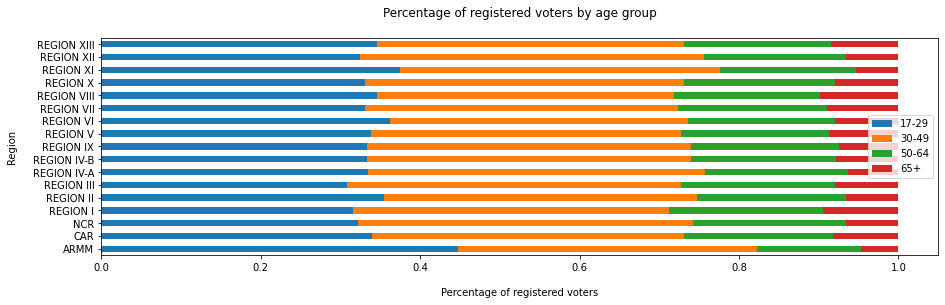

In [109]:
# get relevant columns and compute for percentages
df['17-29'] = df['17-19'] + df['20-24'] + df['25-29']
df['30-49'] = df['30-34'] + df['35-39'] + df['40-44'] + df['45-49']
df['50-64'] = df['50-54'] + df['55-59'] + df['60-64']
df['65+'] = df['65-above']
age = df.groupby(['Region'], as_index=True).agg({'17-29':'sum',
                                                 '30-49':'sum', 
                                                 '50-64':'sum',
                                                 '65+':'sum'})
age = age.div(age.sum(1), axis=0)

# plot the graph
age.plot.barh(legend=True, stacked=True, figsize=(15, 4))
plt.ylabel('Region\n', fontsize=font_label)
plt.xlabel('\nPercentage of registered voters', fontsize=font_label)
plt.title('Percentage of registered voters by age group\n',
          fontsize=font_title)
plt.show()

Among all regions, only ARMM has the youngest group of registered voters, where more than 40% are aged 17-29, and more than 80% are aged under 50 years old. A study by Thinking Machines showed that ARMM’s voter composition has changed dramatically between 2007 to 2010, where young voters increased by “a degree more extreme than can probably be caused by demographic or population change” [(Thinking Machines, 2016)](#TM). <br>

##### <span style="color:#2f50a2;">Presidentials in Focus</span>
**VOTING ALONG AGE LINES: Duterte appears to be popular across all age groups, while Roxas is popular with younger voters, and Poe with older voters.**

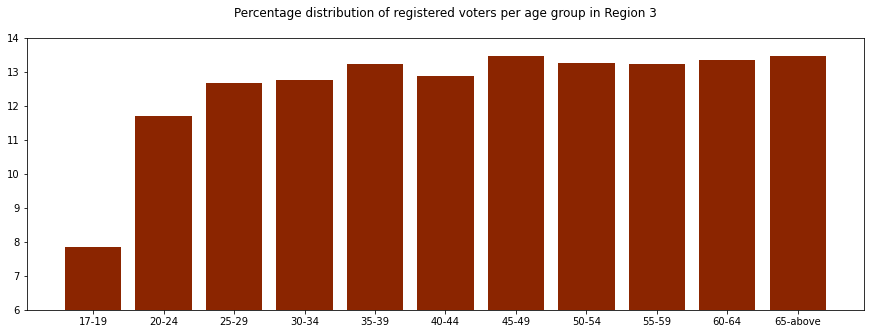

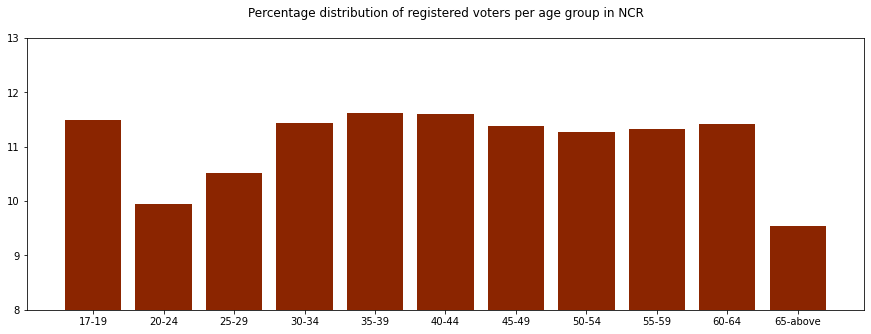

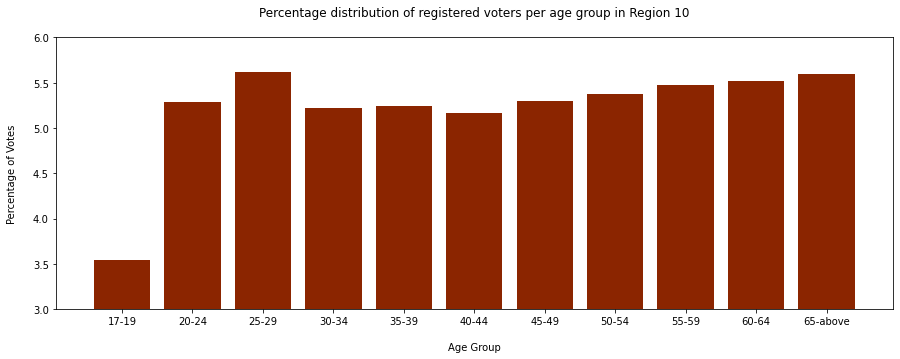

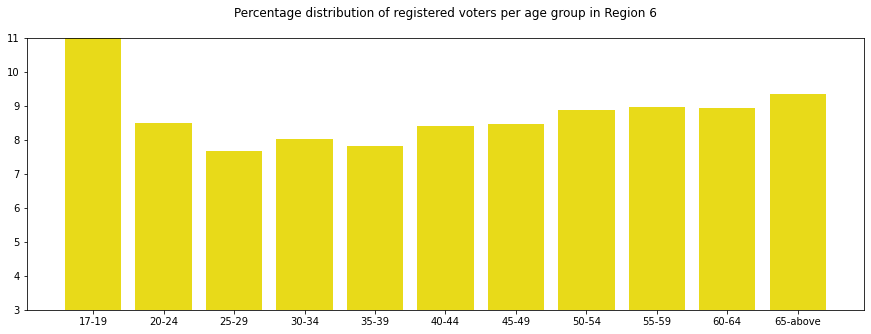

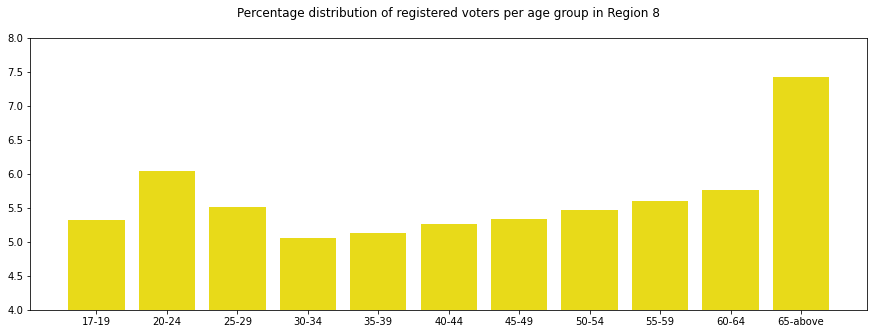

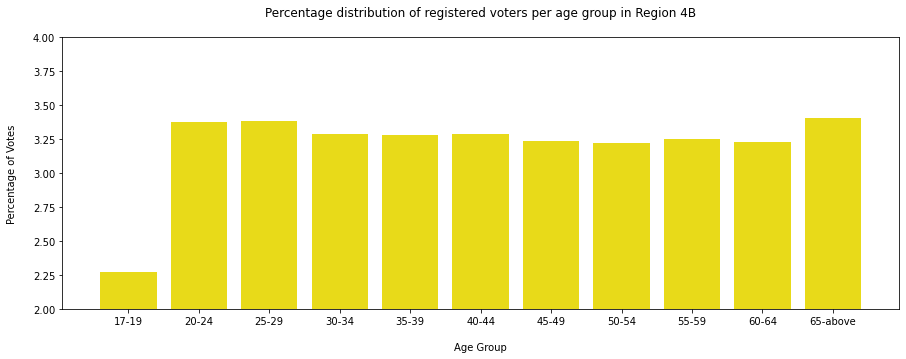

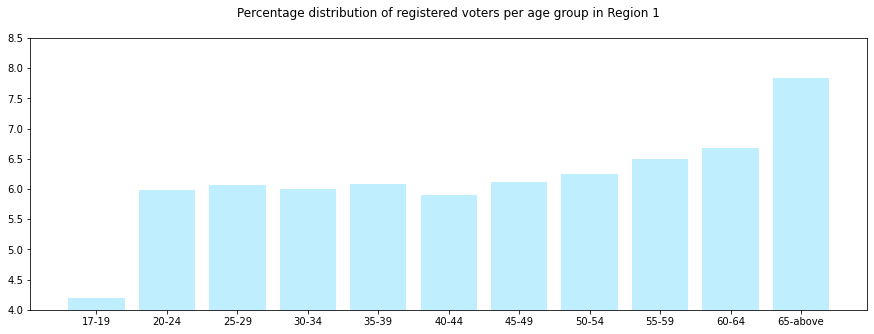

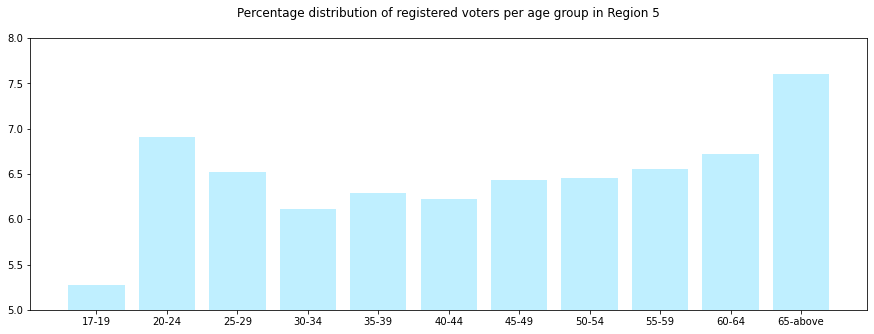

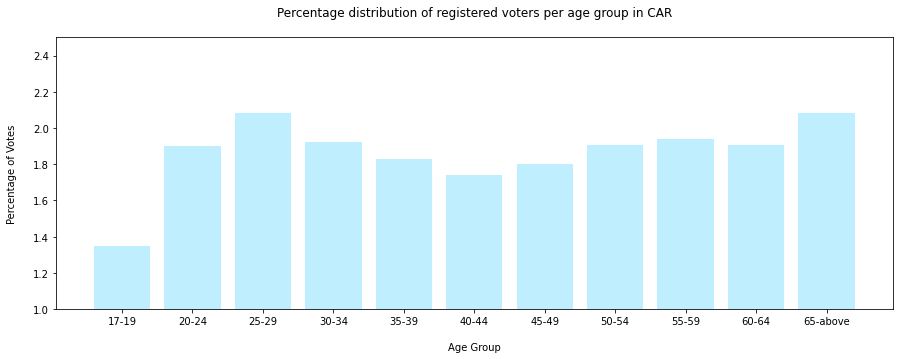

In [110]:
########################################################
# identify the proportions of each age group per region
########################################################
# PRESIDENTIALS
################

# get relevant columns
profiling = dfp[['Region',
                 'Province',
                 'City/Municipality',
                 'male',
                 'female',
                 '17-19',
                 '20-24',
                 '25-29',
                 '30-34',
                 '35-39',
                 '40-44',
                 '45-49',
                 '50-54',
                 '55-59',
                 '60-64',
                 '65-above',
                 'literacy',
                 'indigenous_people',
                 'person_with_disability',
                 'single',
                 'married',
                 'widow',
                 'legally_seperated']]

age_vars = ['17-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
            '50-54', '55-59', '60-64', '65-above']

# compute column totals
profiling = profiling.drop_duplicates(keep='first')
profiling = profiling.groupby(['Region'])[age_vars].sum()

for var in age_vars:
    profiling[var] = (profiling[var] / profiling[var].sum()) * 100
profiling = profiling.reset_index('Region')

########################################################################
# distribution of the relative proportions of each age group per region
########################################################################
# Duterte
##########

region3_data = profiling[profiling['Region'] == 'REGION III']
region3_data = pd.melt(region3_data, id_vars='Region', value_vars=age_vars,
                       var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region3_data[region3_data['age_group'] == var]['age_group'],
            region3_data[region3_data['age_group'] == var]['percent'],
            color='#8b2500')
plt.ylim(6, 14)
plt.title('Percentage distribution of registered voters'
          ' per age group in Region 3\n',
          fontsize=font_title)

ncr_data = profiling[profiling['Region'] == 'NCR']
ncr_data = pd.melt(ncr_data, id_vars='Region', value_vars=age_vars,
                   var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(ncr_data[ncr_data['age_group'] == var]['age_group'],
            ncr_data[ncr_data['age_group'] == var]['percent'],
            color='#8b2500')
plt.ylim(8, 13)
plt.title('Percentage distribution of registered voters'
          ' per age group in NCR\n',
          fontsize=font_title)

region10_data = profiling[profiling['Region'] == 'REGION X']
region10_data = pd.melt(region10_data, id_vars='Region',
                        value_vars=age_vars, var_name='age_group',
                        value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region10_data[region10_data['age_group'] == var]['age_group'],
            region10_data[region10_data['age_group'] == var]['percent'],
            color='#8b2500')
plt.ylim(3, 6)
plt.title('Percentage distribution of registered voters'
          ' per age group in Region 10\n',
          fontsize=font_title)
plt.ylabel('Percentage of Votes\n')
plt.xlabel('\nAge Group')
plt.show()

########################################################################
# distribution of the relative proportions of each age group per region
########################################################################
# Roxas
#######

region6_data = profiling[profiling['Region'] == 'REGION VI']
region6_data = pd.melt(region6_data, id_vars='Region', value_vars=age_vars,
                       var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region6_data[region6_data['age_group'] == var]['age_group'],
            region6_data[region6_data['age_group'] == var]['percent'],
            color='#e8da19')
plt.ylim(3, 11)
plt.title('Percentage distribution of registered voters per age group in '
          'Region 6\n',
          fontsize=font_title)

region8_data = profiling[profiling['Region'] == 'REGION VIII']
region8_data = pd.melt(region8_data, id_vars='Region', value_vars=age_vars,
                       var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region8_data[region8_data['age_group'] == var]['age_group'],
            region8_data[region8_data['age_group'] == var]['percent'],
            color='#e8da19')
plt.ylim(4, 8)
plt.title('Percentage distribution of registered voters per age group in '
          'Region 8\n',
          fontsize=font_title)

region4B_data = profiling[profiling['Region'] == 'REGION IV-B']
region4B_data = pd.melt(region4B_data, id_vars='Region',
                        value_vars=age_vars, var_name='age_group',
                        value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region4B_data[region4B_data['age_group'] == var]['age_group'],
            region4B_data[region4B_data['age_group'] == var]['percent'],
            color='#e8da19')
plt.ylim(2, 4)
plt.title('Percentage distribution of registered voters per age group in '
          'Region 4B\n',
          fontsize=font_title)
plt.ylabel('Percentage of Votes\n')
plt.xlabel('\nAge Group')
plt.show()

########################################################################
# distribution of the relative proportions of each age group per region
########################################################################
# Poe
######

region1_data = profiling[profiling['Region'] == 'REGION I']
region1_data = pd.melt(region1_data, id_vars='Region', value_vars=age_vars,
                       var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region1_data[region1_data['age_group'] == var]['age_group'],
            region1_data[region1_data['age_group'] == var]['percent'],
            color='#bfefff')
plt.ylim(4, 8.5)
plt.title('Percentage distribution of registered voters per age group in '
          'Region 1\n',
          fontsize=font_title)

region5_data = profiling[profiling['Region'] == 'REGION V']
region5_data = pd.melt(region5_data, id_vars='Region', value_vars=age_vars,
                       var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region5_data[region5_data['age_group'] == var]['age_group'],
            region5_data[region5_data['age_group'] == var]['percent'],
            color='#bfefff')
plt.ylim(5, 8)
plt.title('Percentage distribution of registered voters'
          ' per age group in Region 5\n',
          fontsize=font_title)

CAR_data = profiling[profiling['Region'] == 'CAR']
CAR_data = pd.melt(CAR_data, id_vars='Region',
                   value_vars=age_vars, var_name='age_group',
                   value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(CAR_data[CAR_data['age_group'] == var]['age_group'],
            CAR_data[CAR_data['age_group'] == var]['percent'],
            color='#bfefff')
plt.ylim(1, 2.5)
plt.title('Percentage distribution of registered voters'
          ' per age group in CAR\n',
          fontsize=font_title)
plt.ylabel('Percentage of Votes\n')
plt.xlabel('\nAge Group')
plt.show()

Here, we examine the distribution of voters per age in the regions where Duterte, Roxas, and Poe won respectively. Duterte appears to be popular across all age groups, while Roxas is popular with younger voters, and Poe with older voters.<br>

Duterte’s popularity across all age groups is very apparent, especially among voters above the age of 19 in Regions 3 and 10. Interestingly, fewer voters aged between 20 to 39 and 65+ voted for Duterte in NCR.

Region 6 and 4B voted along age lines. A large majority of voters aged 15-19 voted for him, at a rate almost twice versus other age groups in Region 6. This is a fascinating phenomenon: Roxas received lower votes among other age groups in his own bailiwick and where the Roxas political dynasty comes from. Strong showing from the younger voters may have also propelled him forward, given that the majority of voters in the region are above the age of 29. It was almost the complete opposite for Region 4B, where he received the lowest votes among voters below aged 20. 

Finally, Poe enjoys popularity among the older age groups. She has won in Regions 1, 5, and CAR, and is immensely popular among voters aged 65+. She is weakest among these regions under the age of 20.



##### <span style="color:#2f50a2;">Vice Presidentials in Focus</span>
**With the exception of Region 5, Robredo is popular among younger voters while Marcos with older voters.**


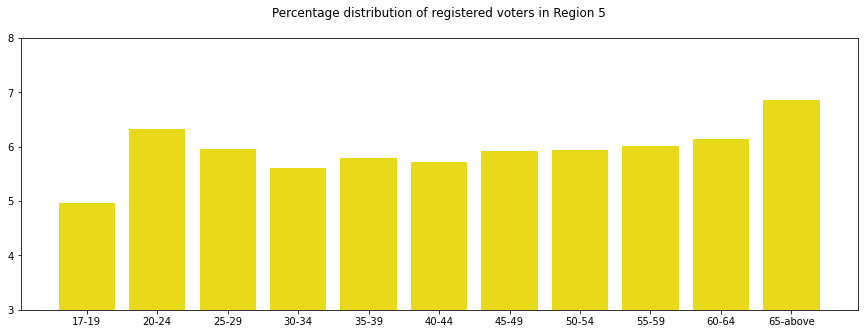

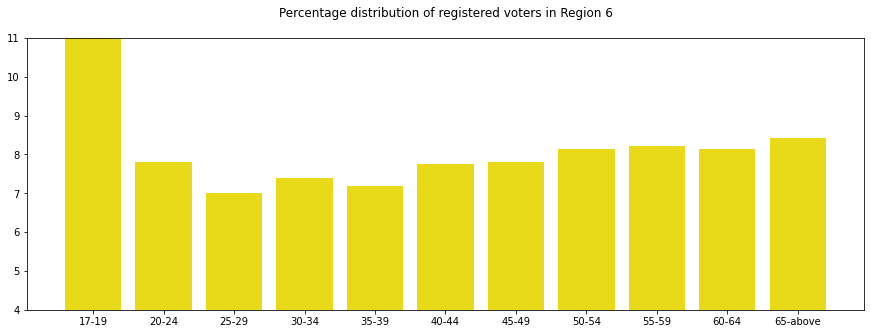

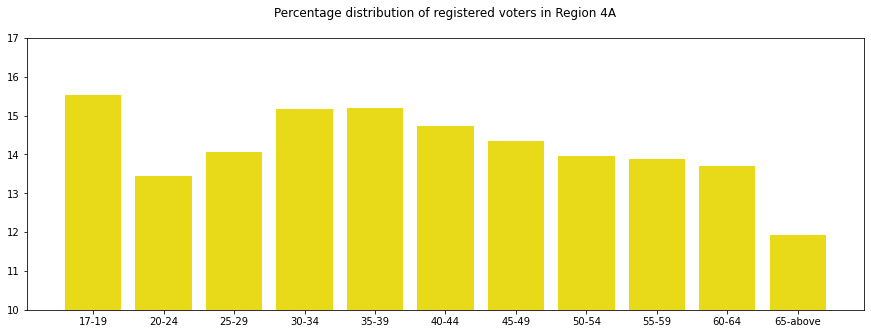

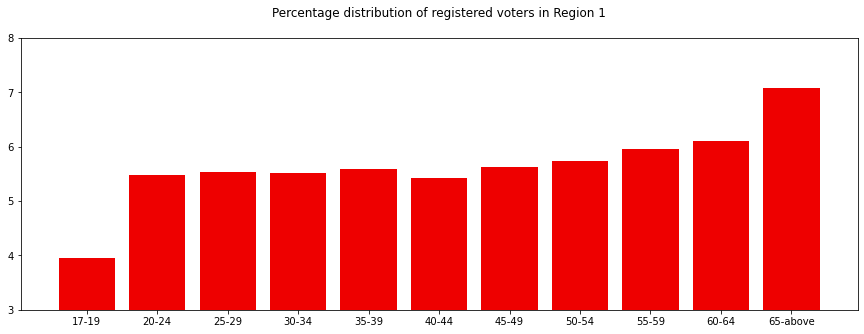

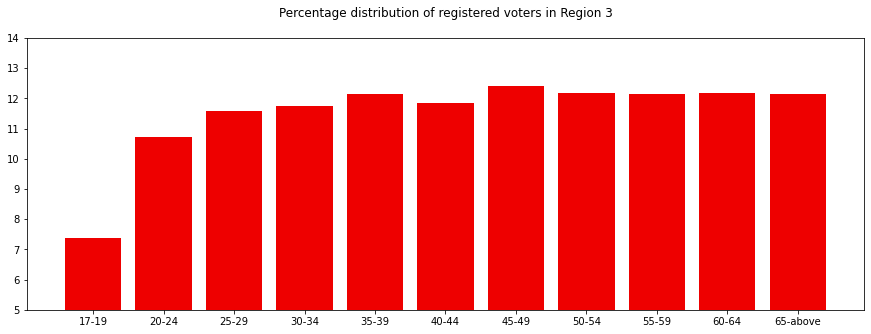

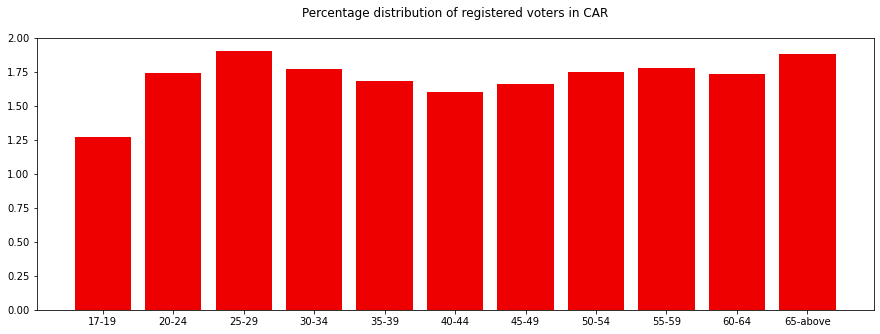

In [111]:
########################################################
# identify the proportions of each age group per region
########################################################
# VICE PRESIDENTIALS
####################

# get relevant columns
profiling = dfv[['Region', 'Province', 'City/Municipality', 'male', 'female',
                 '17-19', '20-24', '25-29', '30-34', '35-39', '40-44',
                 '45-49', '50-54', '55-59', '60-64', '65-above',
                 'literacy', 'indigenous_people', 'person_with_disability',
                 'single', 'married', 'widow', 'legally_seperated']]

age_vars = ['17-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
            '50-54', '55-59', '60-64', '65-above']

# compute column totals
profiling = profiling.drop_duplicates(keep='first')
profiling = profiling.groupby(['Region'])[age_vars].sum()

for var in age_vars:
    profiling[var] = (profiling[var] / profiling[var].sum()) * 100
profiling = profiling.reset_index('Region')

########################################################################
# distribution of the relative proportions of each age group per region
########################################################################
# Robredo
#########

region5_data = profiling[profiling['Region'] == 'REGION V']
region5_data = pd.melt(region5_data, id_vars='Region', value_vars=age_vars,
                       var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region5_data[region5_data['age_group'] == var]['age_group'],
            region5_data[region5_data['age_group'] == var]['percent'],
            color='#e8da19')
plt.ylim(3, 8)
plt.title('Percentage distribution of registered voters in Region 5\n',
          fontsize=font_title)

region6_data = profiling[profiling['Region'] == 'REGION VI']
region6_data = pd.melt(region6_data, id_vars='Region', value_vars=age_vars,
                       var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region6_data[region6_data['age_group'] == var]['age_group'],
            region6_data[region6_data['age_group'] == var]['percent'],
            color='#e8da19')
plt.ylim(4, 11)
plt.title('Percentage distribution of registered voters in Region 6\n',
          fontsize=font_title)

region4A_data = profiling[profiling['Region'] == 'REGION IV-A']
region4A_data = pd.melt(region4A_data, id_vars='Region',
                        value_vars=age_vars, var_name='age_group',
                        value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region4A_data[region4A_data['age_group'] == var]['age_group'],
            region4A_data[region4A_data['age_group'] == var]['percent'],
            color='#e8da19')
plt.ylim(10, 17)
plt.title('Percentage distribution of registered voters in Region 4A\n',
          fontsize=font_title)

########################################################################
# distribution of the relative proportions of each age group per region
########################################################################
# Marcos
########

region1_data = profiling[profiling['Region'] == 'REGION I']
region1_data = pd.melt(region1_data, id_vars='Region', value_vars=age_vars,
                       var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region1_data[region1_data['age_group'] == var]['age_group'],
            region1_data[region1_data['age_group'] == var]['percent'],
            color='#ee0000')
plt.ylim(3, 8)
plt.title('Percentage distribution of registered voters in Region 1\n',
          fontsize=font_title)

region3_data = profiling[profiling['Region'] == 'REGION III']
region3_data = pd.melt(region3_data, id_vars='Region', value_vars=age_vars,
                       var_name='age_group', value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(region3_data[region3_data['age_group'] == var]['age_group'],
            region3_data[region3_data['age_group'] == var]['percent'],
            color='#ee0000')
plt.ylim(5, 14)
plt.title('Percentage distribution of registered voters in Region 3\n',
          fontsize=font_title)

car_data = profiling[profiling['Region'] == 'CAR']
car_data = pd.melt(car_data, id_vars='Region',
                   value_vars=age_vars, var_name='age_group',
                   value_name='percent')

plt.figure(figsize=(15, 5))
for var in age_vars:
    plt.bar(car_data[car_data['age_group'] == var]['age_group'],
            car_data[car_data['age_group'] == var]['percent'],
            color='#ee0000')
plt.ylim(0, 2)
plt.title('Percentage distribution of registered voters in CAR\n',
          fontsize=font_title)
plt.show()

For vice presidential bets, we also examine the distribution of voters per age in the regions where Robredo and Marcos won respectively. With the exception of Region 5 (Robredo’s homeland), Robredo is popular among younger voters while Marcos with older voters.

Beyond Robredo’s homeland, she appears to be popular in Region 6 and 4A which are regions with a high share of younger voters. This trend is more apparent in Region 6 with a region that has predominantly 17-19 years olds. On the other hand, the northern regions which mostly have an older population, gravitated towards Marcos. 
<br>
#### <span style="color:#2f50a2;">Sex at Birth</span>
**While the male to female registered voter ratio largely follows that of the national male to female ratio, there are slightly more females than males who have registered to vote at 51.8%.**

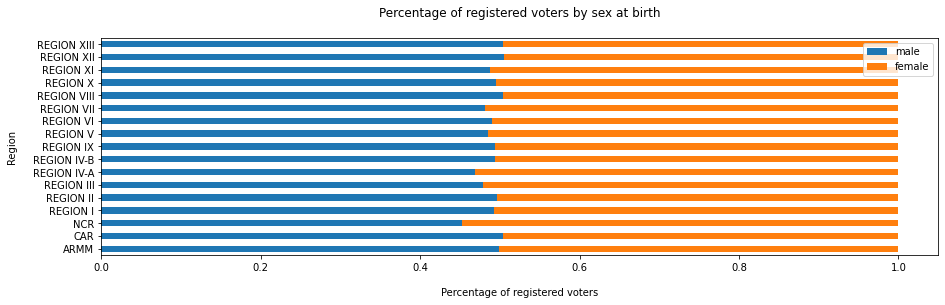

In [112]:
# get relevant columns and compute for percentages
sex = df.groupby(['Region'], as_index=True).agg({'male':'sum',
                                                 'female':'sum'})
sex = sex.div(sex.sum(1), axis=0)

# plot the graph
sex.plot.barh(legend=True, stacked=True, figsize=(15, 4))
plt.ylabel('Region\n', fontsize=font_label)
plt.xlabel('\nPercentage of registered voters', fontsize=font_label)
plt.title('Percentage of registered voters by sex at birth\n',
          fontsize=font_title)
plt.show()

This was the second general election which featured two female Presidential candidates - Grace Poe and Miriam Defensor-Santiago - since 1986. The first was in 1992, where Miriam Defensor-Santiago and Imelda Marcos ran against five male candidates for the elections. What made 2016 different were the sexist remarks and harassing behavior of the eventual President, Rodrigo Duterte, during his campaigns for presidency. There has been at least one female Vice Presidential candidate at every national election since 1992.
<br><br>
*Given that the share of the share of male and females appear homogeneous among all regions, we no longer explored the difference among candidates.*
<br>
#### <span style="color:#2f50a2;">Marital Status</span>
**Overall, there are more voters who are married at 48.8% than those who are single at 48.6%.**

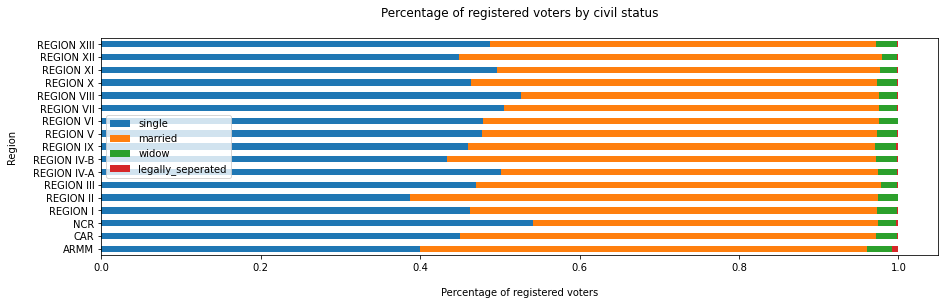

In [113]:
# get the relevant columns and compute for percentages
status = df.groupby(['Region'], as_index=True).agg({'single':'sum',
                                                    'married':'sum',
                                                    'widow':'sum',
                                                    'legally_seperated':
                                                    'sum',})
status = status.div(status.sum(1), axis=0)

#plot the graph
status = status.plot.barh(legend=True, stacked=True, figsize=(15, 4))
plt.ylabel('Region\n')
plt.xlabel('\nPercentage of registered voters')
plt.title('Percentage of registered voters by civil status\n')
plt.show()

We have seen no evidence if marital status influences voting behavior or preference. However, it may be important to note that the immediate past President, Noynoy Aquino, is the first and only bachelor to hold the office. Similarly, Duterte is the first president to have been transparent about his affairs and common-law wife and children, and Robredo is the first Vice President who is a widow.
<br>
##### <span style="color:#2f50a2;">Presidentials in Focus</span>
**Duterte appeals to provinces with more single voters, while Binay is popular among provinces with more married ones.**
<br><br>
The figures below explore the top (bottom 10) provinces with the highest (lowest) share of single and married registered voters. Duterte appears more popular among provinces with more single voters. As previously highlighted, there had been no academic studies providing evidence on the effect of marital status on voting behavior. It may be noteworthy, however, that Duterte is the first president who mentioned in interviews about having multiple girlfriends and annulment with his previous wife [(Rappler News, 2015)](#Rappler). Binay was popular in provinces with the highest share of married voters. He is part of a prominent political dynasty with his wife even serving as the mayor of Makati from 1998 to 2001.


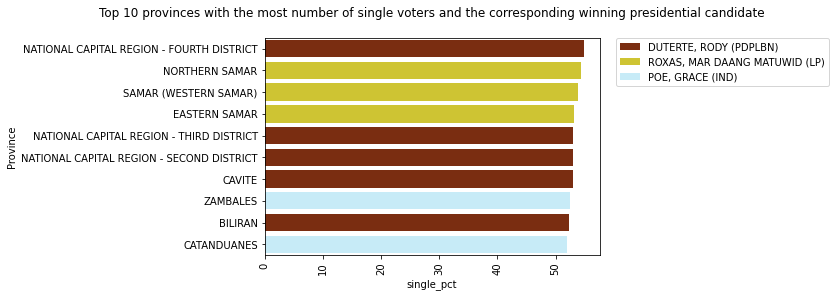

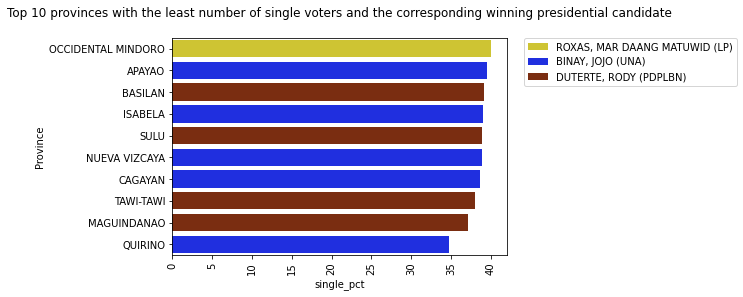

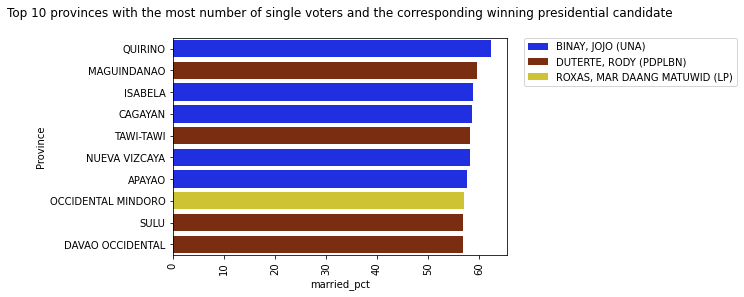

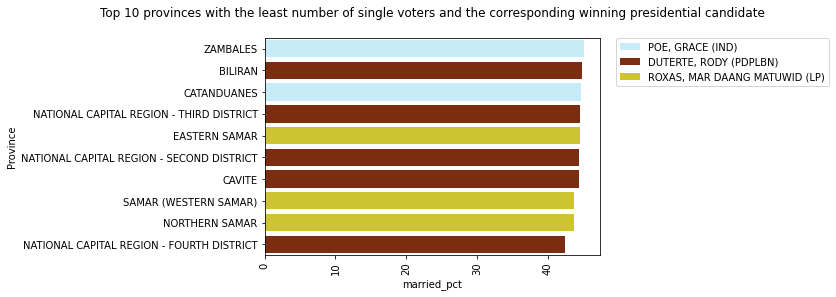

In [114]:
################################################################
# Top 10 Provinces with Most and Least  Number of SINGLE Voters
################################################################
# Presidentials
###############

# get winners per province
win_pres = (dfp.groupby(['Province', 'bName'])['votes']
            .sum()
            .sort_values(ascending=False)
            .reset_index().drop_duplicates(subset='Province',
                                           keep='first'))

# compute the total number of registered voters
v = dfp[['Region', 'Province', 'registered_voter']]
v = v.drop_duplicates(keep='first')
v = (v.groupby(['Region', 'Province'])
     ['registered_voter'].sum().reset_index())

# compute the total number of single voters
w = dfp[['Region', 'Province', 'single']]
w = w.drop_duplicates(keep='first')
w = (w.groupby(['Region', 'Province'])
     ['single'].sum().reset_index())

# compute turnout = votes/registered voters
single_pres = pd.merge(v, w, on=['Region', 'Province'])
single_pres['single_pct'] = (single_pres['single']
                             / single_pres['registered_voter'] * 100)
single_pres = single_pres.sort_values('single_pct', ascending=False)
single_pres = single_pres[['Province', 'Region',
                           'registered_voter',
                           'single', 'single_pct']]

# merge dataframes to get top and bottom 10
single_merge = pd.merge(single_pres, win_pres, on='Province')
single_merge = single_merge[['Province', 'bName', 'single_pct']]
singlemerge_toppres = single_merge.head(10)
singlemerge_bottompres = single_merge.tail(10)

# plot the 10 provinces with most number of singles
sns.barplot(y=singlemerge_toppres['Province'],
            x=singlemerge_toppres['single_pct'],
            hue=singlemerge_toppres['bName'],
            palette=palettep,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the most number of '
          'single voters and the corresponding '
          'winning presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# plot the 10 provinces with the least number of singles
sns.barplot(y=singlemerge_bottompres['Province'],
            x=singlemerge_bottompres['single_pct'],
            hue=singlemerge_bottompres['bName'],
            palette=palettep,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the least number of '
          'single voters and the corresponding '
          'winning presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

################################################################
# Top 10 Provinces with Most and Least  Number of MARRIED Voters
################################################################
# Presidentials
###############

# compute the total number of registered voters
v = dfp[['Region', 'Province', 'registered_voter']]
v = v.drop_duplicates(keep='first')
v = (v.groupby(['Region', 'Province'])
     ['registered_voter'].sum().reset_index())

# compute the total number of married
w = dfp[['Region', 'Province', 'married']]
w = w.drop_duplicates(keep='first')
w = (w.groupby(['Region', 'Province'])
     ['married'].sum().reset_index())

# compute turnout = votes/registered voters
married_pres = pd.merge(v, w, on=['Region', 'Province'])
married_pres['married_pct'] = (married_pres['married']
                               / married_pres['registered_voter'] * 100)
married_pres = married_pres.sort_values('married_pct', ascending=False)
married_pres = married_pres[['Province', 'Region',
                             'registered_voter', 'married',
                             'married_pct']]

# merge dataframes to get top and bottom 10
married_merge = pd.merge(married_pres, win_pres, on='Province')
married_merge = married_merge[['Province', 'bName', 'married_pct']]
marriedmerge_toppres = married_merge.head(10)
marriedmerge_bottompres = married_merge.tail(10)

# plot the 10 provinces with most number of married voters
sns.barplot(y=marriedmerge_toppres['Province'],
            x=marriedmerge_toppres['married_pct'],
            hue=marriedmerge_toppres['bName'],
            palette=palettep,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the most number of '
          'single voters and the corresponding '
          'winning presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# plot the 10 provinces with least number of married voters
sns.barplot(y=marriedmerge_bottompres['Province'],
            x=marriedmerge_bottompres['married_pct'],
            hue=marriedmerge_bottompres['bName'],
            palette=palettep,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the least number of '
          'single voters and the corresponding '
          'winning presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### <span style="color:#2f50a2;">Vice Presidentials in Focus</span>
**Unlike the presidential bets, Robredo and Marcos both appear to be popular among single and married registered voters.**

The figures below explore the top (bottom 10) provinces with the highest (lowest) share of single and married registered voters for the vice presidential bets. Robredo and Marcos appear to be popular in both groups. Robredo is also known as the wife of the late Jesse Robredo who served as Secretary of the Interior and Local Government in the administration of President Benigno Aquino III. Marcos is also known to be part of the political dynasty who originated from the northern regions.


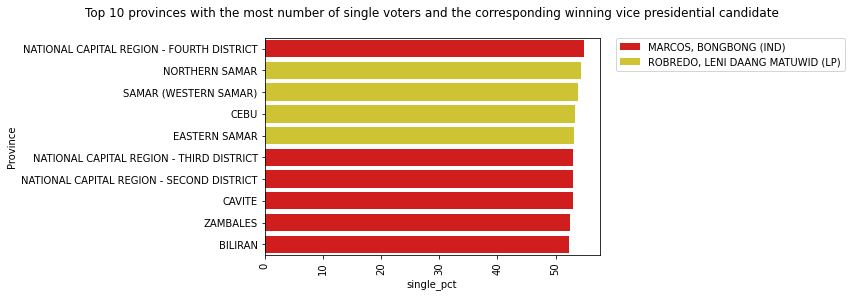

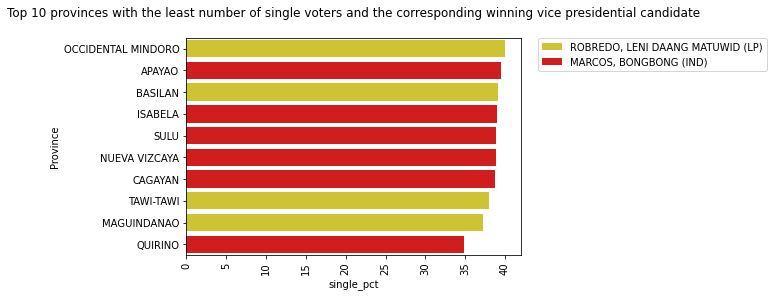

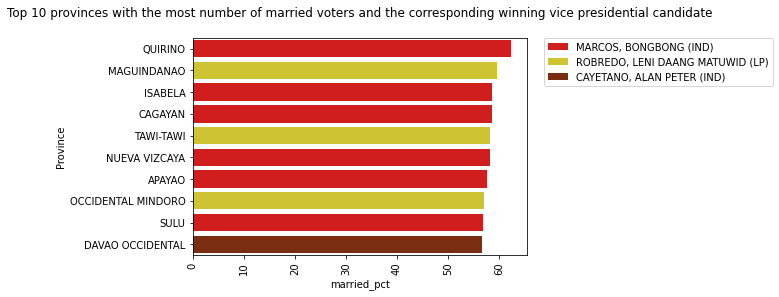

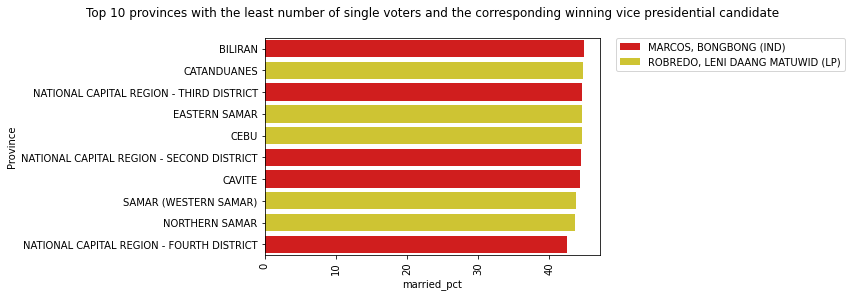

In [115]:
################################################################
# Top 10 provinces with most and least  number of SINGLE voters
################################################################
# Vice Presidentials
#####################

# get winners per province
win_vp = (dfv.groupby(['Province', 'bName'])['votes']
          .sum()
          .sort_values(ascending=False)
          .reset_index()
          .drop_duplicates(subset='Province', keep='first'))

# compute the total number of registered voters
v = dfv[['Region', 'Province', 'registered_voter']]
v = v.drop_duplicates(keep='first')
v = (v.groupby(['Region', 'Province'])
     ['registered_voter'].sum().reset_index())

# compute the total number of single
w = dfv[['Region', 'Province', 'single']]
w = w.drop_duplicates(keep='first')
w = (w.groupby(['Region', 'Province'])
     ['single'].sum().reset_index())

# compute turnout = votes/registered voters
single_vp = pd.merge(v, w, on=['Region', 'Province'])
single_vp['single_pct'] = (single_vp['single']
                           / single_vp['registered_voter'] * 100)
single_vp = single_vp.sort_values('single_pct', ascending=False)
single_vp = single_vp[['Province', 'Region', 'registered_voter',
                       'single', 'single_pct']]

# merge dataframes to get top and bottom 10
single_merge = pd.merge(single_vp, win_vp, on='Province')
single_merge = single_merge[['Province', 'bName', 'single_pct']]
singlemerge_topvp = single_merge.head(10)
singlemerge_bottomvp = single_merge.tail(10)

# plot the 10 provinces with most number of single voters
sns.barplot(y=singlemerge_topvp['Province'],
            x=singlemerge_topvp['single_pct'],
            hue=singlemerge_topvp['bName'],
            palette=palettev,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the most number of '
          'single voters and the corresponding '
          'winning vice presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# plot the 10 provinces with least number of single voters
sns.barplot(y=singlemerge_bottomvp['Province'],
            x=singlemerge_bottomvp['single_pct'],
            hue=singlemerge_bottomvp['bName'],
            palette=palettev,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the least number of '
          'single voters and the corresponding '
          'winning vice presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

################################################################
# Top 10 provinces with most and least  number of MARRIED voters
################################################################
# Vice Presidentials
#####################

# compute the total number of registered voters
v = dfv[['Region', 'Province', 'registered_voter']]
v = v.drop_duplicates(keep='first')
v = (v.groupby(['Region', 'Province'])
     ['registered_voter'].sum().reset_index())

# compute the total number of married
w = dfv[['Region', 'Province', 'married']]
w = w.drop_duplicates(keep='first')
w = (w.groupby(['Region', 'Province'])
     ['married'].sum().reset_index())

# compute turnout = votes/registered voters
married_vp = pd.merge(v, w, on=['Region', 'Province'])
married_vp['married_pct'] = (married_vp['married']
                             / married_vp['registered_voter'] * 100)
married_vp = married_vp.sort_values('married_pct', ascending=False)
married_vp = married_vp[['Province', 'Region', 'registered_voter',
                         'married', 'married_pct']]

# merge dataframes to get top and bottom 10
married_merge = pd.merge(married_vp, win_vp, on='Province')
married_merge = married_merge[['Province', 'bName', 'married_pct']]
marriedmerge_topvp = married_merge.head(10)
marriedmerge_bottomvp = married_merge.tail(10)

# plot the 10 provinces with most number of married voters
sns.barplot(y=marriedmerge_topvp['Province'],
            x=marriedmerge_topvp['married_pct'],
            hue=marriedmerge_topvp['bName'],
            palette=palettev,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the most number of '
          'married voters and the corresponding '
          'winning vice presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# plot the 10 provinces with least number of married voters
sns.barplot(y=marriedmerge_bottomvp['Province'],
            x=marriedmerge_bottomvp['married_pct'],
            hue=marriedmerge_bottomvp['bName'],
            palette=palettev,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the least number of '
          'single voters and the corresponding '
          'winning vice presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### <span style="color:#2f50a2;">Literacy Rate</span>
**Literacy rates across regions are high with an average of 94.9%. ARMM’s literacy rate is at 51.8%.**

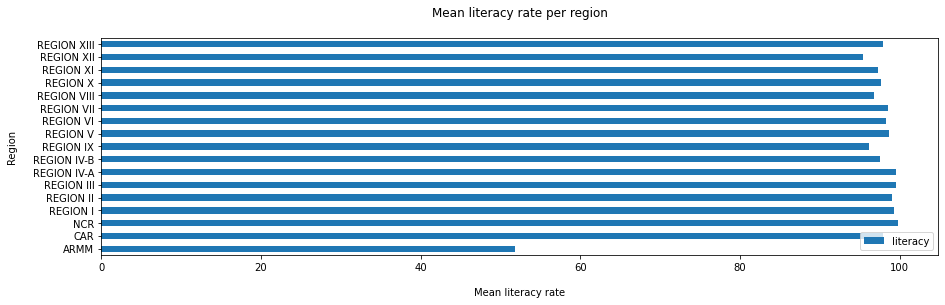

In [116]:
# get the relevant columns and compute for the mean
literacy = df.groupby(['Region'], as_index=True).agg({'literacy':'mean'})

# plot the graph
literacy = literacy.plot.barh(legend=True, stacked=False, figsize=(15, 4))
plt.ylabel('Region\n', fontsize=font_label)
plt.xlabel('\nMean literacy rate', fontsize=font_label)
plt.title('Mean literacy rate per region\n',
          fontsize=font_title)
plt.show()

Research has shown that higher literacy rates indicate a more educated population, but it does not translate to higher voter turnouts [(Schraufnagel, Buehler, and Lowry-Fritz, 2014)](#SBL). The level of education, however, has been shown to impact voter’s choice during elections; for example, more educated voters tend to vote for dynastic candidates - and political dynasties exacerbate poverty, which in turn impact inaccessibility to education [(David and San Pascual, 2016; Mendoza, Beja, Vedina, and Yap, 2016)](#DS).

**Duterte is popular among provinces that have the highest and lowest literacy rate. Marcos dominates provinces with the highest literacy rate while Robredo is popular among the lowest ones.**

The figures below explore the top (bottom 10) provinces with the highest (lowest) literacy rates. Interestingly, the research on “educated voters” tending to vote for dynastic candidates [(David and San Pascual, 2016; Mendoza, Beja, Vedina, and Yap, 2016)](#DS) appears to be aligned with Duterte and Marcos election outcomes. Duterte appeals to provinces with the highest literacy rate, similar to Marcos. Robredo seems to capture more provinces that have the lowest literacy rates. 


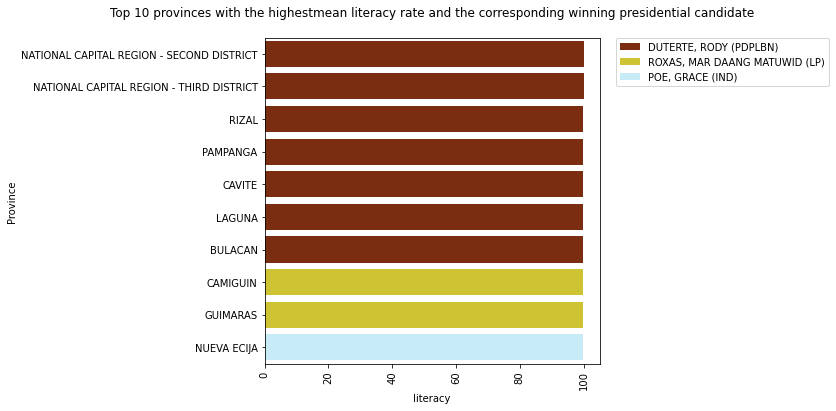

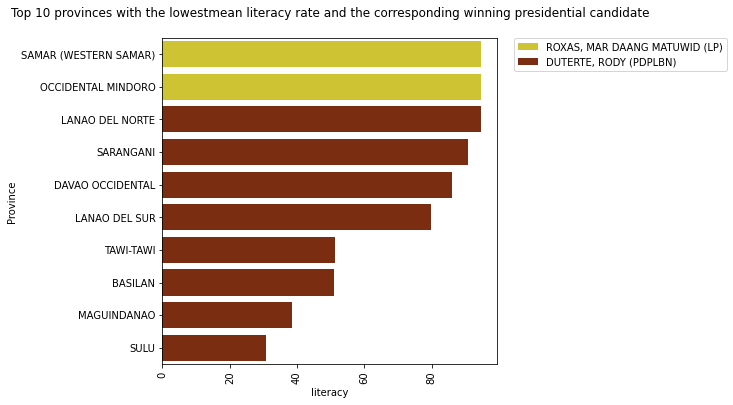

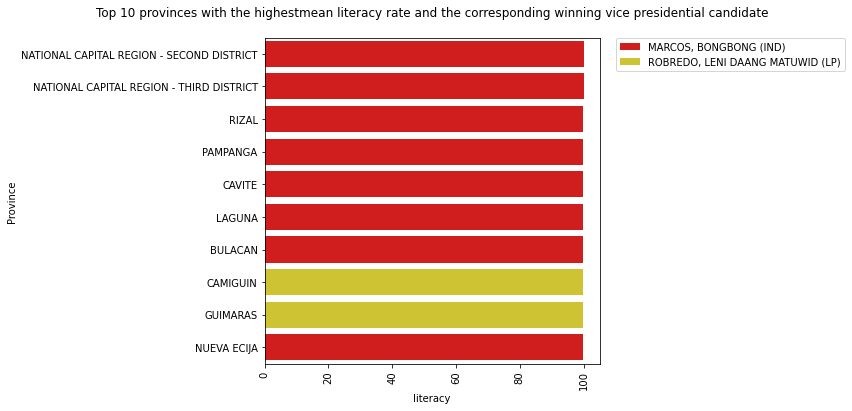

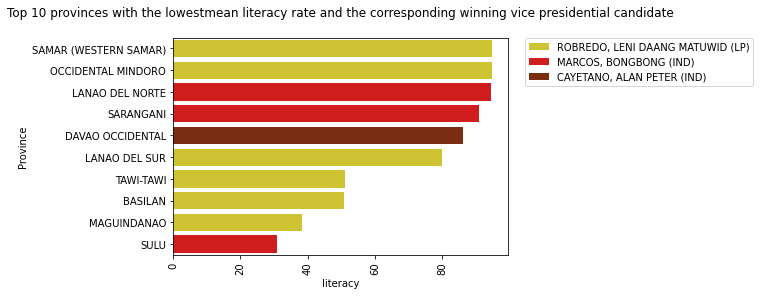

In [117]:
#############################################################
# Top 10 provinces with the highest and lowest LITERACY RATE
#############################################################
# Presidentials
################

# get relevant columns
lit_pres = (dfp.groupby(['Province'])['literacy']
            .mean()
            .sort_values(ascending=False)
            .reset_index().drop_duplicates(subset='Province',
                                           keep='first'))

# merge dataframes to get top and bottom 10
lit_merge = pd.merge(lit_pres, win_pres, on='Province')
lit_merge = lit_merge[['Province', 'bName', 'literacy']]
litmerge_toppres = lit_merge.head(10)
litmerge_bottompres = lit_merge.tail(10)

# plot the top 10 provinces with the highest literacy rates
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=litmerge_toppres['Province'],
            x=litmerge_toppres['literacy'],
            hue=litmerge_toppres['bName'],
            palette=palettep,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the highest'
          'mean literacy rate and the corresponding '
          'winning presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# plot the top 10 provinces with the lowest literacy rates
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=litmerge_bottompres['Province'],
            x=litmerge_bottompres['literacy'],
            hue=litmerge_bottompres['bName'],
            palette=palettep,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the lowest'
          'mean literacy rate and the corresponding '
          'winning presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#############################################################
# Top 10 provinces with the highest and lowest LITERACY RATE
#############################################################
# Vice Presidentials
#####################

# get relevant columns
lit_vp = (dfv.groupby(['Province'])['literacy']
          .mean()
          .sort_values(ascending=False)
          .reset_index()
          .drop_duplicates(subset='Province', keep='first'))

# merge dataframes to get top and bottom 10
lit_merge = pd.merge(lit_vp, win_vp, on='Province')
lit_merge = lit_merge[['Province', 'bName', 'literacy']]
litmerge_topvp = lit_merge.head(10)
litmerge_bottomvp = lit_merge.tail(10)

# plot the top 10 provinces with the highest literacy rates
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=litmerge_topvp['Province'],
            x=litmerge_topvp['literacy'],
            hue=litmerge_topvp['bName'],
            palette=palettev,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the highest'
          'mean literacy rate and the corresponding '
          'winning vice presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# plot the top 10 provinces with the lowest literacy rates
sns.barplot(y=litmerge_bottomvp['Province'],
            x=litmerge_bottomvp['literacy'],
            hue=litmerge_bottomvp['bName'],
            palette=palettev,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the lowest'
          'mean literacy rate and the corresponding '
          'winning vice presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### <span style="color:#2f50a2;">Indigenous People</span>
**Registered voters who identify as part of indigenous groups are only at 0.17% or 100,580.**

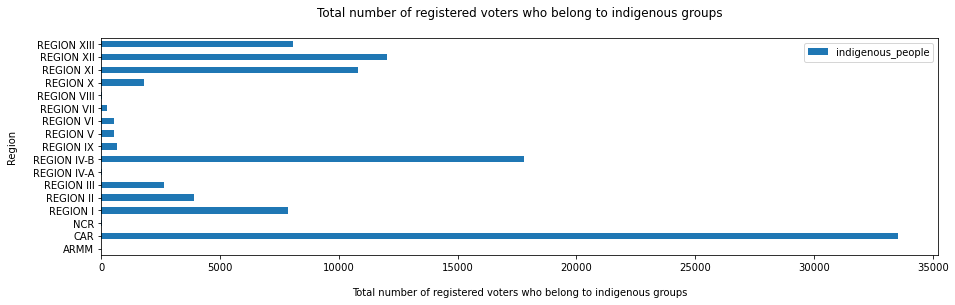

In [118]:
# get relevant columns then compute for sum
ip = df.groupby(['Region'], as_index=True).agg({'indigenous_people':'sum'})

# plot the graph
ip = ip.plot.barh(legend=True, stacked=False, figsize=(15, 4))
plt.ylabel('Region\n', fontsize=font_label)
plt.xlabel('\nTotal number of registered voters who belong'
           ' to indigenous groups', fontsize=font_label)
plt.title('Total number of registered voters who belong'
           ' to indigenous groups\n', fontsize=font_title)
plt.show()

This is despite estimates that the country has an indigenous population between 10% to 20% of the entire population [(IWGIA, 2020)](#IWGIA). It was also during the 2016 elections where KATRIBU, a national alliance of indigenous peoples’ organizations, applied to stand for elections as a party list. They were later denied by COMELEC. The figures below show the provinces with the most number of indigenous people. There appears to be no candidate that dominates this demographic.


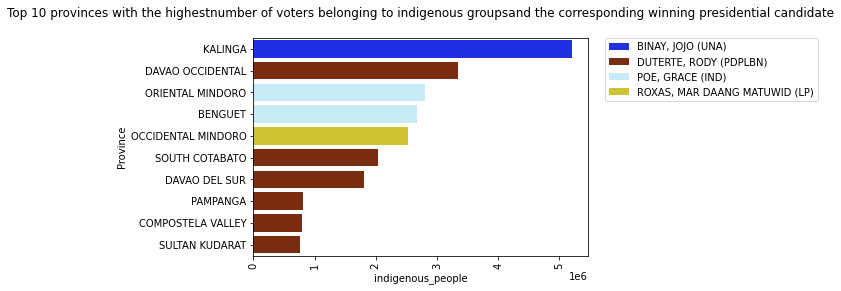

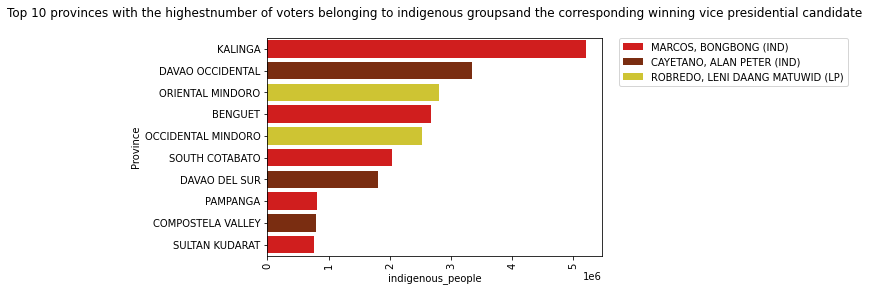

In [119]:
###########################################
# Top 10 provinces with the highest number
# of voters belonging to indigenous groups
###########################################
# Presidentials
###############

# get relevant columns
indi_pres = (dfp.groupby(['Province'])['indigenous_people']
             .sum()
             .sort_values(ascending=False)
             .reset_index()
             .drop_duplicates(subset='Province', keep='first'))

# merge dataframes to get the top 10
indi_merge = pd.merge(indi_pres, win_pres, on='Province')
indi_merge = indi_merge[['Province', 'bName', 'indigenous_people']]
indimerge_toppres = indi_merge.head(10)
indimerge_bottompres = indi_merge.tail(10)

# plot the top 10 provinces with the highest number of voters
# belonging to indigenous groups
sns.barplot(y=indimerge_toppres['Province'],
            x=indimerge_toppres['indigenous_people'],
            hue=indimerge_toppres['bName'],
            palette=palettep,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the highest'
          'number of voters belonging to indigenous groups'
          'and the corresponding winning presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

###########################################
# Top 10 provinces with the highest number
# of voters belonging to indigenous groups
###########################################
# Vice Presidentials
#####################

# get relevant columns
indi_vp = (dfp.groupby(['Province'])['indigenous_people']
           .sum()
           .sort_values(ascending=False)
           .reset_index()
           .drop_duplicates(subset='Province', keep='first'))

# merge dataframes to get top and bottom 10
indi_merge = pd.merge(indi_vp, win_vp, on='Province')
indi_merge = indi_merge[['Province', 'bName', 'indigenous_people']]
indimerge_topvp = indi_merge.head(10)
indimerge_bottomvp = indi_merge.tail(10)

# plot the top 10 provinces with the highest number of voters
# belonging to indigenous groups
sns.barplot(y=indimerge_topvp['Province'],
            x=indimerge_topvp['indigenous_people'],
            hue=indimerge_topvp['bName'],
            palette=palettev,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the highest'
          'number of voters belonging to indigenous groups'
          'and the corresponding winning vice presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### <span style="color:#2f50a2;">Persons with Disability</span>

**Voters with disabilities are only at 0.56% or 331,367. Duterte and Marcos appear popular with this demographic.**

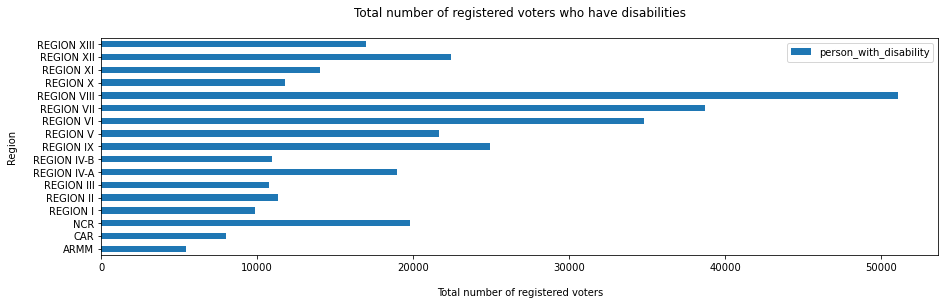

In [120]:
# get relevant columns then compute for sum
pwd = df.groupby(['Region'], as_index=True).agg({'person_with_disability':
                                                 'sum'})
# plot the graph
pwd = pwd.plot.barh(legend=True, stacked=False, figsize=(15, 4))
plt.ylabel('Region\n', fontsize=font_label)
plt.xlabel('\nTotal number of registered voters', fontsize=font_label)
plt.title('Total number of registered voters who have'
          ' disabilities\n', fontsize=font_title)
plt.show()

This is only one-fourth of the recorded population of persons with disabilities (PWDs) by PSA at 1.44 million Filipinos [(Philippine Statistics Authority, 2010)](#PSA). The enactment of RA 10366 or the Accessible Polling Place Law ensures persons with disabilities, or more appropriately termed as voters with disabilities, are included in the national elections. The figures below show the provinces with the most number of PWDs. Duterte and Marcos appeared popular with this demographic during the last national elections.


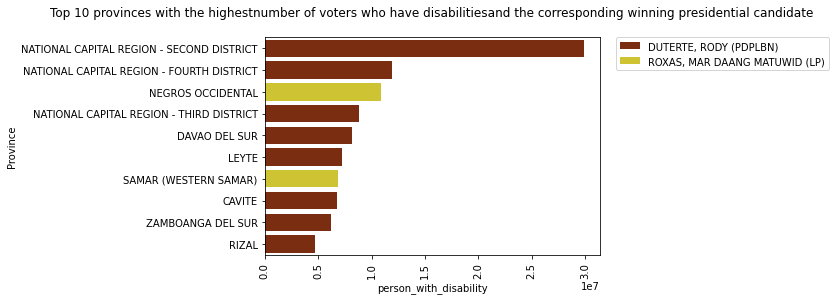

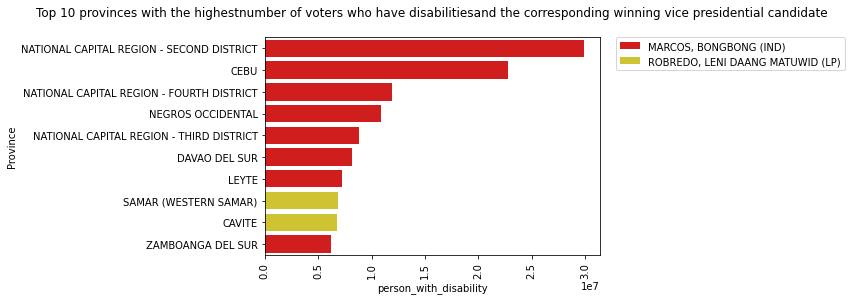

In [121]:
###########################################
# Top 10 provinces with the highest number
# of voters who have disabilities
###########################################
# Presidentials
################

# get relevant columns
dis_pres = (dfp.groupby(['Province'])['person_with_disability']
            .sum()
            .sort_values(ascending=False)
            .reset_index()
            .drop_duplicates(subset='Province', keep='first'))

# merge dataframes to get the top 10
dis_merge = pd.merge(dis_pres, win_pres, on='Province')
dis_merge = dis_merge[['Province', 'bName', 'person_with_disability']]
dismerge_toppres = dis_merge.head(10)
dismerge_bottompres = dis_merge.tail(10)

# plot the top 10 provinces with the highest number of voters
# who have disabilities
sns.barplot(y=dismerge_toppres['Province'],
            x=dismerge_toppres['person_with_disability'],
            hue=dismerge_toppres['bName'],
            palette=palettep,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the highest'
          'number of voters who have disabilities'
          'and the corresponding winning presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

###########################################
# Top 10 provinces with the highest number
# of voters who have disabilities
###########################################
# Vice Presidentials
####################

# get relevant columns
dis_vp = (dfv.groupby(['Province'])['person_with_disability']
          .sum()
          .sort_values(ascending=False)
          .reset_index()
          .drop_duplicates(subset='Province', keep='first'))

# merge dataframes to get the top 10
dis_merge = pd.merge(dis_vp, win_vp, on='Province')
dis_merge = dis_merge[['Province', 'bName', 'person_with_disability']]
dismerge_topvp = dis_merge.head(10)
dismerge_bottomvp = dis_merge.tail(10)

# plot the top 10 provinces with the highest number of voters
# who have disabilities
sns.barplot(y=dismerge_topvp['Province'],
            x=dismerge_topvp['person_with_disability'],
            hue=litmerge_topvp['bName'],
            palette=palettev,
            dodge=False)
plt.xticks(rotation=90)
plt.title('Top 10 provinces with the highest'
          'number of voters who have disabilities'
          'and the corresponding winning vice presidential candidate\n',
          fontsize=font_title)
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### <span style="color:#2f50a2;">Voter turnout per region</span>
##### <span style="color:#2f50a2;">Presidentials in Focus</span>
**Duterte predominantly won in regions with less-than-average voter turnouts, while Poe garnered the highest votes in regions that have higher-than-average.**

The figure above shows the voter turnout per region. It appears that Duterte won in regions IV-A, XI, XII, XIII, IX, and ARMM which have less-than-average voter turnouts. Even though these regions have less voter engagement, the sheer number of regions that Duterte captured was able to secure Duterte’s win in the national elections. On the other hand, Region 1 with the most engaged voters, was captured by Poe. This may also be influenced by the strong support of the local government officials in Ilocos Sur where they urge to have a “Solid North” in support of Poe given her plans to decrease excise tax on tobacco products, Ilocos’ top product, if she wins presidency [(Senate of the Philippines, 2016)](#SOTP). Roxas captured Region VI, Region VIII, and Region IV-B which had mixed levels of voter turnouts.



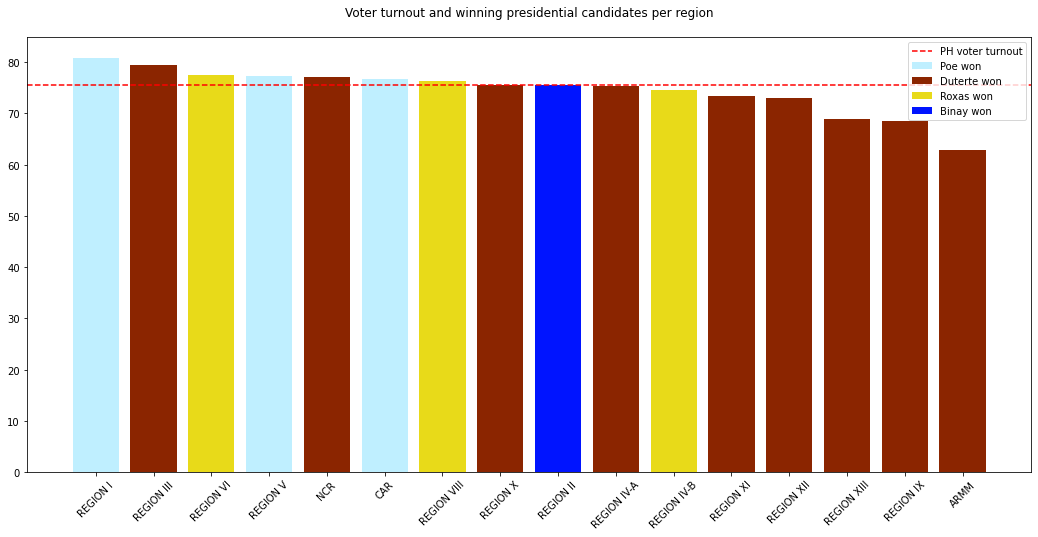

In [122]:
#########################
# National voter turnout
#########################

# get total number of voters
total_voters = dfp['votes'].sum()

# get total number of registered voters
total_registered = (dfp[['Region', 'Province', 'City/Municipality',
                        'registered_voter']].groupby(['Region',
                                                      'Province',
                                                      'City/Municipality'])
                    ['registered_voter'].mean().sum())

# compute for national voter turnout
PH_voter_turnout = total_voters / total_registered * 100


##################################################
# Voter turnout per region with winning candidate
##################################################

# compute for regional voter turnout
province = dfp[['Region', 'Province',
                'votes', 'registered_voter']]
total_voters = province.groupby('Region')['votes'].sum()
region = dfp[['Region', 'registered_voter']]
region = region.drop_duplicates(keep='first')
region = region.groupby('Region')['registered_voter'].sum()
voter_turnout = pd.merge(total_voters, region,
                         left_index=True, right_index=True)
voter_turnout = voter_turnout.reset_index('Region')
voter_turnout['turnout'] = ((voter_turnout['votes'] /
                            voter_turnout['registered_voter']) * 100)
voter_turnout.sort_values('turnout')

# get relevant columns
results = dfp[['Region', 'Province', 'City/Municipality',
              'bName', 'votes', 'registered_voter']]

# aggregate votes per city
results = pd.DataFrame(results.groupby(['Region', 'Province',
                                        'City/Municipality',
                                        'bName'])['votes'].sum())
results = results.reset_index(['Region', 'Province',
                               'City/Municipality', 'bName'])

# aggregate votes per each region
results = (results.groupby(['Region',
                           'bName'])['votes'].sum()
                  .reset_index(['Region', 'bName']))
regional_turnout = (voter_turnout[['Region', 'turnout']]
                    .sort_values(by='turnout', ascending=False))

# identify top 1 candidate per each region
top_1 = {'Region': [], 'Winner': []}
for region in regional_turnout['Region'].values:
    max_region = results[results['Region'] == region]['votes'].max()
    results[results['votes'] == max_region]['bName'].values[0]
    top_1['Region'].append(region)
    (top_1['Winner']
     .append(results[results['votes'] == max_region]['bName'].values[0]))

# create a dataframe with the top 1 for each region
top_1 = pd.DataFrame(top_1)
regional_turnout = pd.merge(regional_turnout, top_1, on='Region')

# plot the voterout per region with winning candidate
plt.figure(figsize=(18, 8))
poe_count = 0
duts_count = 0
roxas_count = 0
binay_count = 0
for i, region in enumerate(regional_turnout['Region'].values):
    if regional_turnout.iloc[i, 2] == 'POE, GRACE (IND)':
        col = '#bfefff'
        label = 'Poe won'
        poe_count += 1
        if poe_count == 1:
            plt.bar(regional_turnout[regional_turnout['Region'] == region]
                    ['Region'],
                    regional_turnout[regional_turnout['Region'] == region]
                    ['turnout'],
                    color=col,
                    label=label)
            continue
    elif regional_turnout.iloc[i, 2] == 'DUTERTE, RODY (PDPLBN)':
        col = '#8b2500'
        label = 'Duterte won'
        duts_count += 1
        if duts_count == 1:
            plt.bar(regional_turnout[regional_turnout['Region'] == region]
                    ['Region'],
                    regional_turnout[regional_turnout['Region'] == region]
                    ['turnout'],
                    color=col,
                    label=label)
            continue
    elif regional_turnout.iloc[i, 2] == 'ROXAS, MAR DAANG MATUWID (LP)':
        col = '#e8da19'
        label = 'Roxas won'
        roxas_count += 1
        if roxas_count == 1:
            plt.bar(regional_turnout[regional_turnout['Region'] == region]
                    ['Region'],
                    regional_turnout[regional_turnout['Region'] == region]
                    ['turnout'],
                    color=col,
                    label=label)
            continue
    elif regional_turnout.iloc[i, 2] == 'BINAY, JOJO (UNA)':
        col = '#0014ff'
        label = 'Binay won'
        binay_count += 1
        if binay_count == 1:
            plt.bar(regional_turnout[regional_turnout['Region'] == region]
                    ['Region'],
                    regional_turnout[regional_turnout['Region'] == region]
                    ['turnout'],
                    color=col,
                    label=label)
            continue
    plt.bar(regional_turnout[regional_turnout['Region'] == region]['Region'],
            regional_turnout[regional_turnout['Region'] == region]['turnout'],
            color=col)
plt.xticks(rotation=45)
plt.title('Voter turnout and winning presidential candidates per region\n',
          fontsize=font_title)
plt.axhline(PH_voter_turnout, color='red', label='PH voter turnout',
            linestyle='--')
plt.legend(loc=1)
plt.show()

##### <span style="color:#2f50a2;">Vice Presidentials in Focus</span>

**Robredo won in more regions with less-than-average voter turnout, despite the “Solid North” support to Marcos.**

Similar to Duterte’s winning regions, Robredo garnered the highest votes in locations with less-than-average voter turnouts. It is also apparent that the “Solid North” regions, Region I, II, and CAR, are highly engaged in expressing support [(Senate of the Philippines, 2016)](#SOTP) towards Marcos’ vice presidency.


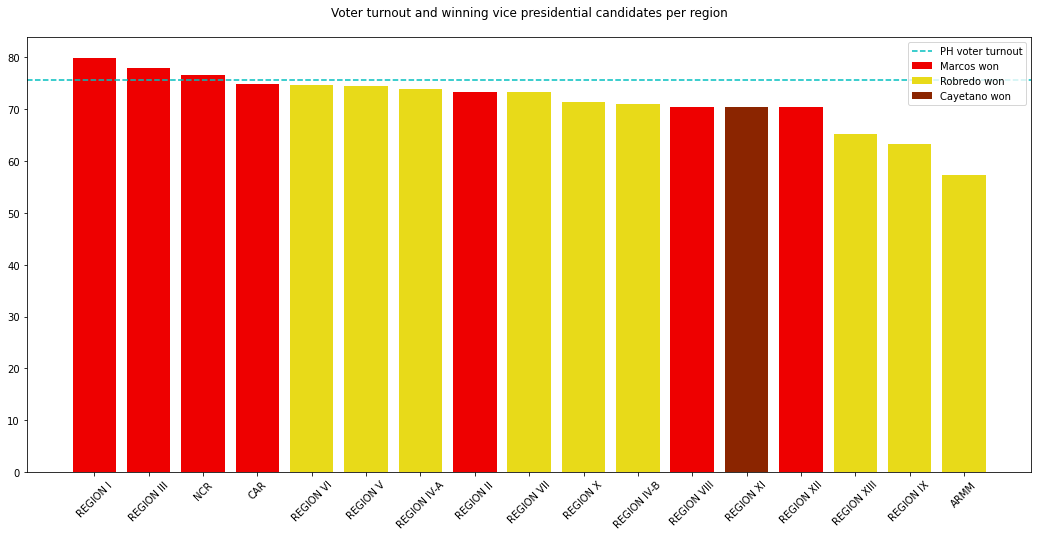

In [123]:
####################################################################
# Voter turnout per region with winning vice presidential candidate
####################################################################

# compute for number of voters per region
province = dfv[['Region', 'Province', 'votes', 'registered_voter']]
total_voters = province.groupby('Region')['votes'].sum()

# compute for number of registered voters per region
region = dfv[['Region', 'registered_voter']]
region = region.drop_duplicates(keep='first')
region = region.groupby('Region')['registered_voter'].sum()

# create dataframe for voter turnout
voter_turnout = pd.merge(total_voters, region,
                         left_index=True, right_index=True)
voter_turnout = voter_turnout.reset_index('Region')
voter_turnout['turnout'] = ((voter_turnout['votes'] /
                            voter_turnout['registered_voter']) * 100)
voter_turnout = voter_turnout.sort_values('turnout')

# aggregate votes per city
results = dfv[['Region', 'Province', 'City/Municipality',
              'bName', 'votes', 'registered_voter']]
results = pd.DataFrame(results.groupby(['Region', 'Province',
                                        'City/Municipality',
                                        'bName'])['votes'].sum())
results = results.reset_index(['Region', 'Province',
                               'City/Municipality', 'bName'])

# aggregate votes per each region
results = (results.groupby(['Region',
                           'bName'])['votes'].sum()
                  .reset_index(['Region', 'bName']))

regional_turnout = (voter_turnout[['Region', 'turnout']]
                    .sort_values(by='turnout', ascending=False))

# identify top 1 candidate per each region
top_1 = {'Region':[], 'Winner':[]}
for region in regional_turnout['Region'].values:
    max_region = results[results['Region'] == region]['votes'].max()
    results[results['votes'] == max_region]['bName'].values[0]
    top_1['Region'].append(region)
    (top_1['Winner'].append(results[results['votes'] == max_region]
                            ['bName'].values[0]))

top_1 = pd.DataFrame(top_1)
regional_turnout = pd.merge(regional_turnout, top_1, on='Region')


# plot the voterout per region with winning candidate
plt.figure(figsize=(18, 8))

poe_count = 0
duts_count = 0
roxas_count = 0
binay_count = 0
for i, region in enumerate(regional_turnout['Region'].values):
    if regional_turnout.iloc[i, 2] == 'MARCOS, BONGBONG (IND)':
        col = '#ee0000'
        label = 'Marcos won'
        poe_count += 1
        if poe_count == 1:
            plt.bar(regional_turnout[regional_turnout['Region'] == region]
                    ['Region'],
                    regional_turnout[regional_turnout['Region'] == region]
                    ['turnout'],
                    color=col,
                    label=label)
            continue
    elif regional_turnout.iloc[i, 2] == 'CAYETANO, ALAN PETER (IND)':
        col = '#8b2500'
        label = 'Cayetano won'
        duts_count += 1
        if duts_count == 1:
            plt.bar(regional_turnout[regional_turnout['Region'] == region]
                    ['Region'],
                    regional_turnout[regional_turnout['Region'] == region]
                    ['turnout'],
                    color=col,
                    label=label)
            continue
    elif regional_turnout.iloc[i, 2] == 'ROBREDO, LENI DAANG MATUWID (LP)':
        col = '#e8da19'
        label = 'Robredo won'
        roxas_count += 1
        if roxas_count == 1:
            plt.bar(regional_turnout[regional_turnout['Region'] == region]
                    ['Region'],
                    regional_turnout[regional_turnout['Region'] == region]
                    ['turnout'],
                    color=col,
                    label=label) 
            continue
            
    plt.bar(regional_turnout[regional_turnout['Region'] == region]['Region'],
            regional_turnout[regional_turnout['Region'] == region]['turnout'], 
            color=col)
plt.xticks(rotation=45)
plt.title('Voter turnout and winning vice presidential '
          'candidates per region\n',
          fontsize=font_title)
plt.axhline(PH_voter_turnout, color='c', label='PH voter turnout',
            linestyle='--')
plt.legend(loc=1)
plt.show()

**Among all of the demographic factors, literacy rate appears to be the most significant difference between regions with the highest and lowest turnout.**


In [124]:
def winner_region(series, region):
    """Return winning candidate of Vice president with voter count.

    Parameters
    ----------
    series : pandas.Series
    region: str

    Returns
    -------
    tuple
        winning vice presidential candidate and vote count
    """
    winner = series[region].idxmax()
    votes = series[region].max()
    return (winner, votes)


def winner_region_pres(series, region):
    """Return winning candidate of president with voter count.

    Parameters
    ----------
    series : pandas.Series
    region: str

    Returns
    -------
    tuple
        winning presidential candidate and vote count
    """
    winner = series[region].idxmax()
    votes = series[region].max()
    return (winner, votes)


def highlight_max(s, props='', props2=''):
    """Return CSS code for cell text formatting.

    Parameters
    ----------
    s : pandas.Series
    props: str
    props2: str

    Returns
    -------
    str
    """
    return np.where(s == np.nanmax(s.values), props, props2)


dfv = pd.read_csv('vp_conso.csv')
dfp = pd.read_csv('pres_conso.csv')
ser_vp = dfv.groupby(['Region', 'bName'])['votes'].sum()
ser_p = dfp.groupby(['Region', 'bName'])['votes'].sum()
filter_ = [i for i in dfv[dfv['Region'] == 'ARMM'].columns.tolist()
           if i not in ['Barangay',
                        'percentage',
                        'canCode',
                        'Precint',
                        'cClass',
                        'bName',
                        'votes']]
# creating dictionary for .agg method;
# summing relevant columns that are population related, averaging the literacy
dict_agg = {}
charac_list = [i for i in dfv.columns
               if i not in ['Barangay',
                            'percentage',
                            'canCode',
                            'Precint',
                            'cClass',
                            'bName',
                            'votes'] + ['Region',
                                        'Province',
                                        'City/Municipality']]
for i in charac_list:
    if i == 'literacy':
        dict_agg[i] = ['mean']
    else:
        dict_agg[i] = ['sum']
reg_agg = (dfv[filter_]
           .drop_duplicates()
           .groupby('Region')
           [
               [i for i in dfv.columns if i not in
                (['Barangay',
                  'percentage',
                  'canCode',
                  'Precint',
                  'cClass',
                  'bName',
                  'votes']
                 + ['Province', 'City/Municipality'])]
           ].agg(dict_agg))
reg_agg = reg_agg.reset_index().droplevel(1, axis=1)
# time to aggregate
reg_agg_p = (dfp[filter_].drop_duplicates().groupby('Region')
                [[i for i in dfp.columns if i not in
                  (['Barangay', 'percentage', 'canCode',
                    'Precint', 'cClass', 'bName', 'votes'] +
                   ['Province', 'City/Municipality'])]].agg(dict_agg))
reg_agg_p = reg_agg_p.reset_index().droplevel(1, axis=1)
popu_list = [
 'registered_voter',
 'male',
 'female',
 '17-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-above',
 'indigenous_people',
 'person_with_disability',
 'single',
 'married',
 'widow',
 'legally_seperated'
]
reg_popu_prop_p = reg_agg_p.set_index('Region')
reg_popu_prop_p = reg_popu_prop_p[popu_list].transform(
    lambda x: x / reg_popu_prop_p.registered_voter)
# combining
reg_all_agg_p = pd.merge(
    reg_popu_prop_p.reset_index(),
    reg_agg_p[['Region', 'literacy']],
    on='Region',
    how='left'
)
dfp_v_reg = dfp.groupby(['Region'])['votes'].sum()
dfp_rv_reg = dfp[['Region', 'registered_voter']].drop_duplicates()
dfp_rv_reg = dfp_rv_reg.groupby('Region')['registered_voter'].sum()
dfp_turnout_reg = pd.merge(dfp_v_reg,
                           dfp_rv_reg,
                           left_index=True,
                           right_index=True)
dfp_turnout_reg['turnout'] = (dfp_turnout_reg.votes * 100 /
                              dfp_turnout_reg.registered_voter)
dfp_turnout_reg = (dfp_turnout_reg.reset_index()
                   .sort_values(by='turnout', ascending=False))
top10_R_p = dfp_turnout_reg.reset_index(drop=True)[['Region', 'turnout']][:10]
top10_R_p.index = range(1, 11)
top10_R_agg_p = pd.merge(top10_R_p, reg_all_agg_p, on='Region', how='left')
top10_R_agg_p.index = top10_R_p.index
top10_R_lit_p = top10_R_agg_p.literacy.mean()
dfv_reg = dfv.groupby(['Region'])['votes'].sum()
df_rv_reg = dfv[['Region', 'registered_voter']].drop_duplicates()
df_rv_reg = df_rv_reg.groupby('Region')['registered_voter'].sum()
df_turnout_reg = pd.merge(dfv_reg,
                          df_rv_reg,
                          left_index=True,
                          right_index=True)
df_turnout_reg['turnout'] = (df_turnout_reg.votes * 100 /
                             df_turnout_reg.registered_voter)
df_turnout_reg = df_turnout_reg.reset_index().sort_values(by='turnout',
                                                          ascending=False)
top10_R = df_turnout_reg.reset_index(drop=True)[['Region', 'turnout']][:10]
top10_R.index = range(1, 11)
reg_popu_prop = reg_agg.set_index('Region')
reg_popu_prop = reg_popu_prop[popu_list].transform(
    lambda x: x / reg_popu_prop.registered_voter)
# combining
reg_all_agg = pd.merge(reg_popu_prop.reset_index(),
                       reg_agg[['Region', 'literacy']],
                       on='Region',
                       how='left')
top10_R_agg = pd.merge(top10_R, reg_all_agg, on='Region', how='left')
top10_R_agg.index = top10_R.index
# adding VP winner and vote count
top10_R_agg['VP_winner'] = pd.Series([winner_region(ser_vp, i)[0]
                                      for i in top10_R_agg.Region],
                                     name='VP_winner',
                                     index=top10_R_agg.index)
top10_R_agg['Winner_vote_count'] = pd.Series([winner_region(ser_vp, i)[1]
                                              for i in top10_R_agg.Region],
                                             name='Winner_vote_count',
                                             index=top10_R_agg.index)
top10_R_lit = top10_R_agg.literacy.mean()
bot10_r_p = dfp_turnout_reg.reset_index(drop=True)
bot10_r_p = bot10_r_p[['Region', 'turnout']].tail(10)
bot10_R_agg_p = pd.merge(bot10_r_p, reg_all_agg_p, on='Region', how='left')
bot10_R_agg_p.index = bot10_r_p.index
# adding VP winner and vote count
bot10_R_agg_p['Pres_winner'] = pd.Series([winner_region_pres(ser_p, i)[0]
                                          for i in bot10_R_agg_p.Region],
                                         name='Pres_winner',
                                         index=bot10_R_agg_p.index)
bot10_R_agg_p['Winner_vote_count'] = pd.Series(
    [winner_region_pres(ser_p, i)[1] for i in bot10_R_agg_p.Region],
    name='Winner_vote_count',
    index=bot10_R_agg_p.index)
bot10_r = df_turnout_reg.reset_index(drop=True)
bot10_r = bot10_r[['Region', 'turnout']].tail(10)
bot10_R_agg = pd.merge(bot10_r, reg_all_agg, on='Region', how='left')
bot10_R_agg.index = bot10_r.index
# adding VP winner and vote count
bot10_R_agg['VP_winner'] = pd.Series([winner_region(ser_vp, i)[0]
                                      for i in bot10_R_agg.Region],
                                     name='VP_winner',
                                     index=bot10_R_agg.index)
bot10_R_agg['Winner_vote_count'] = pd.Series([winner_region(ser_vp, i)[1]
                                              for i in bot10_R_agg.Region],
                                             name='Winner_vote_count',
                                             index=bot10_R_agg.index)
bot10_R_lit = bot10_R_agg.literacy.mean()
bot10_R_lit_p = bot10_R_agg_p.literacy.mean()
df_lit = pd.DataFrame([pd.Series([top10_R_lit_p, top10_R_lit],
                                 index=['President', 'VP']),
                       pd.Series([bot10_R_lit_p, bot10_R_lit],
                                 index=['President', 'VP'])]).T
df_lit.columns = ['Top 10 Literacy Rate AVG (%)',
                  'Bottom 10 Literacy Rate AVG (%)']
df_lit.style.apply(highlight_max,
                   props='color:green;background-color:'
                   'None;font-weight: bold',
                   props2='color:darkred;background-color:None;'
                   'font-weight: bold',
                   axis=1).set_properties(**{'text-align': 'center'})

,Top 10 Literacy Rate AVG (%),Bottom 10 Literacy Rate AVG (%)
President,98.684975,92.855322
VP,98.847924,92.747187


We also compared the profile (e.g. age, sex, marital status, persons with disability) of those regions with highest and lowest turnouts. Based on our analysis, the most significant disparity comes from literacy rate. This insight contrasts the research of [Schraufnagel, Buehler, and Lowry-Fritz (2014)](#SBL) saying that literacy rate does not translate to voter turnout. Their research focused more on the “quality of democracy” being a factor of voter turnouts than any other demographic variable.


### <span style="color:#2f50a2;">Election Outcomes</span>

This subsection answers the research question no. 2:<br>
<blockquote>
What insights can we draw upon the candidates’ baluartes in terms of:<br>
a. Share of votes (%) and registered voters among provinces to maximize winnability<br>
b. Preferred presidential and vice presidential tandem among regions
</blockquote>

The 2016 elections voted on geographic lines, at least for the Presidential race, where candidates are equally representative of Luzon, Visayas, and Mindanao. While the Vice Presidential race was limited to candidates from Luzon, it remained tight all throughout the election period and many years after as Marcos tried, but failed, on his poll protest.

#### <span style="color:#2f50a2;">Presidential Results</span>

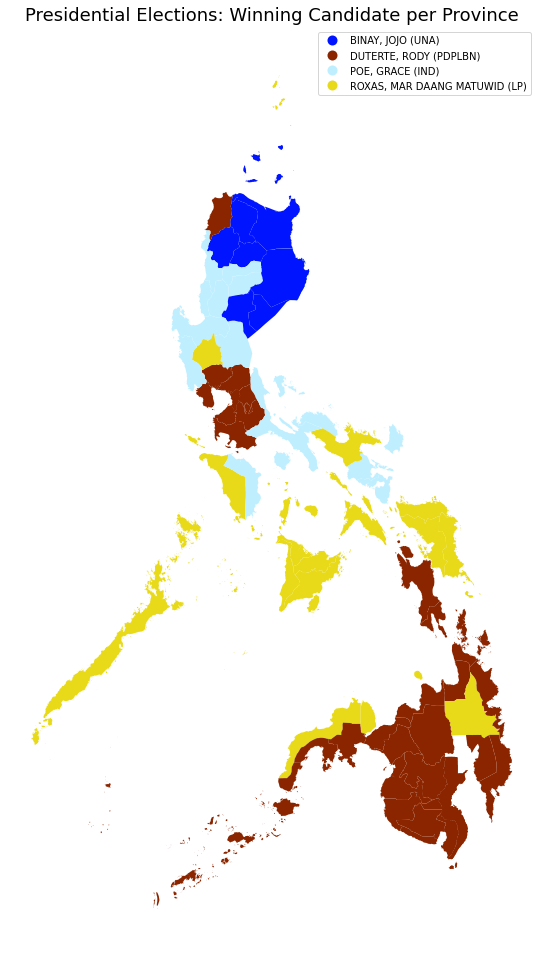

In [125]:
# load geodataframe and province coordinates file
phil_map = gpd.read_file('PHL_adm1.shp')
phil_map['NAME_1'] = phil_map['NAME_1'].str.title()
ph_locations = pd.read_csv('provinces coordinates.csv')

# data cleaning to match voter data with geodataframe

# neg_occ = pd.read_csv('reg6_pres.csv', low_memory=False)
# neg_occ = neg_occ[neg_occ['Province'] == 'NEGROS OCCIDENTAL']
# neg_occ['Region'] = 'REGION VI'
# dfp = pd.concat([dfp, neg_occ])
replace_provinces = {'COTABATO (NORTH COT.)': 'NORTH COTABATO',
                     'SAMAR (WESTERN SAMAR)': 'SAMAR',
                     'NATIONAL CAPITAL REGION - FOURTH DISTRICT':
                     'METROPOLITAN MANILA',
                     'NATIONAL CAPITAL REGION - SECOND DISTRICT':
                     'METROPOLITAN MANILA',
                     'NATIONAL CAPITAL REGION - THIRD DISTRICT':
                     'METROPOLITAN MANILA'}
dfp = dfp.replace({'Province': replace_provinces})
dfp['Province'] = dfp['Province'].str.title()

# data cleaning to match province latitude and longitude data with
# geodataframe

ph_locations = ph_locations.rename(columns={'City/Municipality': 'Province'})
replace_provinces = {'COTABATO (NORTH COT.)': 'NORTH COTABATO',
                     'SAMAR (WESTERN SAMAR)': 'SAMAR',
                     'NATIONAL CAPITAL REGION - FOURTH DISTRICT':
                     'METROPOLITAN MANILA',
                     'NATIONAL CAPITAL REGION - SECOND DISTRICT':
                     'METROPOLITAN MANILA',
                     'NATIONAL CAPITAL REGION - THIRD DISTRICT':
                     'METROPOLITAN MANILA'}
ph_locations = ph_locations.replace({'Province': replace_provinces})
ph_locations['Province'] = ph_locations['Province'].str.title()
new_data = pd.merge(ph_locations, dfp, on='Province')
new_data = new_data.dropna(axis=1)

# transforming the new data

results = new_data[['Region', 'Province', 'City/Municipality',
                    'bName', 'votes', 'registered_voter']]

# aggregate votes per each region
results = (results.groupby(['Province', 'bName'])['votes'].sum()
                  .reset_index(['Province', 'bName']))

# identify top 1 candidate per each region
top_1 = {'Province': [], 'Winner': []}
for province in new_data['Province'].unique():
    max_region = results[results['Province'] == province]['votes'].max()
    results[results['votes'] == max_region]['bName'].values[0]
    top_1['Province'].append(province)
    (top_1['Winner'].append(results[results['votes'] == max_region]
                            ['bName'].values[0]))

# generate dataframe to list winners per province

top_1 = pd.DataFrame(top_1)
provincial_turnout = pd.merge(ph_locations, top_1, on='Province', how='left')

# create a Point using the latitude and longitude coordinates


provincial_turnout['geometry'] = (provincial_turnout
                                  .apply(lambda x:
                                         Point((x['Longitude'],
                                                x['Latitude'])),
                                         axis=1))

# transform pandas dataframe to a geodataframe

geo_data = gpd.GeoDataFrame(provincial_turnout,
                            crs=phil_map.crs,
                            geometry=provincial_turnout.geometry)

# visualizing

cmap_pres = ListedColormap(['#0014ff', '#8b2500', '#bfefff', '#e8da19'])

result_data = gpd.sjoin(phil_map, geo_data, op='contains')

fig, ax = plt.subplots(1, figsize=(10, 17))
ax = result_data.plot(ax=ax, cmap=cmap_pres, column='Winner', legend=True,
                      categorical=True, legend_kwds={'loc': 'upper right'})
plt.axis('off')
plt.title('Presidential Elections: '
          'Winning Candidate per Province', fontsize=18)
plt.show()

Presidential candidates has largely relied on each of their bailiwicks:<br>
1. Duterte has tapped Mindanao, and for good reason: Mindanao voted along geographic lines, voting for him except for Camiguin, Agusan del Sur, Misamis Occidental and Zamboanga del Norte. In 2010, the latter three provinces similarly voted for Liberal Party’s candidate, Noynoy Aquino.
2. Roxas received the most votes from a majority of Visayan provinces, especially from Region 6, where the Roxas political dynasty resides. Five provinces - Cebu, Bohol, Southern Leyte, Leyte, and Biliran - voted for Duterte instead. Duterte was born in Southern Leyte, and his father was a previous mayor of Cebu.
3. Poe held most of Luzon provinces. Up until her political campaign was hounded by citizenship issues, she was once considered a front runner to the Presidential race. Her father, Fernando Poe Jr., previously ran and lost in 2004; she maintained most Luzon provinces that voted for her father.

**In focus: Do vote-rich provinces ensure winnability for the Presidency?**

**Plotting candidates’ share of votes and the number of registered voters together reveals more insights on a candidate’s strengths and weaknesses and vote-richness, which a map alone is unable to provide.** Political commentaries usually focus on vote-rich provinces, aside from baluartes, to guide their estimates. The following charts surface unique strategies in tapping vote-rich and vote-poor provinces to maximize winnability. 

As a guide for the next charts, the broken lines represent the averages: the vertical line representing the average vote share he received across all provinces which is slightly below 40%, and the horizontal line representing the average number of registered voters across all provinces. 



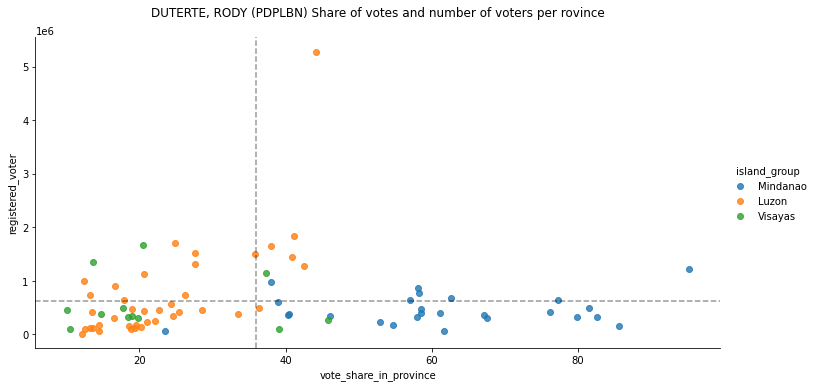

In [126]:
# categorizing regions by island group
luzon = ['REGION I', 'REGION II', 'REGION III', 'REGION IV-A',
         'REGION IV-B', 'REGION V', 'CAR', 'NCR']
visayas = ['REGION VI', 'REGION VII', 'REGION VIII']
mindanao = ['REGION IX', 'REGION X', 'REGION XI', 'REGION XII',
            'REGION XIII', 'ARMM']


def island_group(region):
    """Categorize region by island group."""
    if region in luzon:
        return 'Luzon'
    elif region in visayas:
        return 'Visayas'
    elif region in mindanao:
        return 'Mindanao'


# add a column to the dataframe containing new classification
dfp['island_group'] = dfp['Region'].apply(island_group)

##############################################################
# Shares of votes and number of voters per province : DUTERTE
#############################################################

# plot the scatter plot for Duterte
cand = 'DUTERTE, RODY (PDPLBN)'

# data processing
pres_votes = (dfp[(dfp['bName'] == cand)]
              .groupby(['Region', 'Province'])['votes'].sum())
total_votes = (dfp[['Region', 'Province', 'City/Municipality', 'votes']]
               .groupby(['Region', 'Province'])['votes'].sum())
share_per_province = (pres_votes / total_votes * 100)
registered_voters = dfp[['Region', 'Province',  'registered_voter']]
registered_voters = registered_voters.drop_duplicates(keep='first')
registered_voters = (registered_voters
                     .groupby(['Region', 'Province'])
                     ['registered_voter'].sum())
share_per_province = (pd.merge(share_per_province,
                               registered_voters,
                               left_index=True,
                               right_index=True)
                      .reset_index(['Region', 'Province']))
share_per_province = (share_per_province
                      .rename(columns={'votes':'vote_share_in_province'}))
share_per_province['island_group'] = (share_per_province['Region']
                                       .apply(island_group))

# plot the scatter plot
sns.lmplot(data=share_per_province, x='vote_share_in_province', 
       y='registered_voter', height=5, aspect=2, fit_reg=False,
       hue='island_group', sharex='col')
plt.title(f'{cand} Share of votes and number of voters ' 
          'per rovince\n', fontsize=font_title);
plt.axhline(share_per_province['registered_voter'].mean(),
            color='k', linestyle='--', alpha=0.4)
plt.axvline(share_per_province['vote_share_in_province'].mean(),
            color='k', linestyle='--', alpha=0.4)
plt.show();

**Looking at Duterte’s vote share at the figure above, the lower right (or quadrant 4) of the chart shows that most Mindanaoan provinces that voted for him are smaller than average.** He had weaker showings in vote-rich provinces and in Luzon and Visayas, as seen in the upper half (quadrants 1 and 2) of the chart. Nevertheless, this was sufficient for him to win the elections.

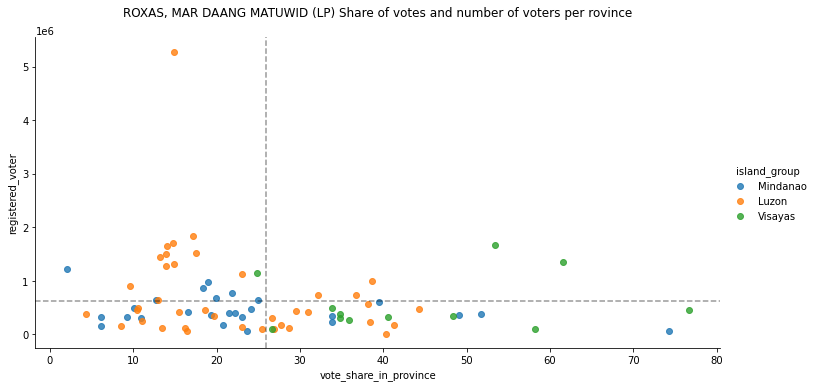

In [127]:
############################################################
# Shares of votes and number of voters per province : ROXAS
###########################################################

# plot the scatter plot for Roxas
cand = 'ROXAS, MAR DAANG MATUWID (LP)'

# data processing
pres_votes = (dfp[(dfp['bName'] == cand)]
              .groupby(['Region', 'Province'])['votes'].sum())
total_votes = (dfp[['Region', 'Province', 'City/Municipality', 'votes']]
               .groupby(['Region', 'Province'])['votes'].sum())
share_per_province = (pres_votes / total_votes * 100)
registered_voters = dfp[['Region', 'Province',  'registered_voter']]
registered_voters = registered_voters.drop_duplicates(keep='first')
registered_voters = (registered_voters
                     .groupby(['Region', 'Province'])
                     ['registered_voter'].sum())
share_per_province = (pd.merge(share_per_province,
                               registered_voters,
                               left_index=True,
                               right_index=True)
                      .reset_index(['Region', 'Province']))
share_per_province = (share_per_province
                      .rename(columns={'votes':'vote_share_in_province'}))
share_per_province['island_group'] = (share_per_province['Region']
                                       .apply(island_group))

# plot the scatter plot
sns.lmplot(data=share_per_province, x='vote_share_in_province', 
       y='registered_voter', height=5, aspect=2, fit_reg=False,
       hue='island_group', sharex='col')
plt.title(f'{cand} Share of votes and number of voters ' 
          'per rovince\n', fontsize=font_title);
plt.axhline(share_per_province['registered_voter'].mean(),
            color='k', linestyle='--', alpha=0.4)
plt.axvline(share_per_province['vote_share_in_province'].mean(),
            color='k', linestyle='--', alpha=0.4)
plt.show();

Provinces with more than 1 million voters are mostly in Luzon and Visayas, which were won by Roxas and Poe respectively. 

As seen in the figure above, most Roxas voters are in Luzon and Visayas. **It is, however, the Visayas provinces that are more apparent: Roxas’ vote shares from almost all Visayan provinces were overwhelmingly higher than the average.** Robredo, his running mate, performed relatively well among provinces with smaller voter shares possibly due to party machinery. It is possible that Roxas was unable to tap this because, after Duterte dominated Mindanao and Poe dominated Luzon, he has only Visayas left, with the fewest of provinces among three island groups. 


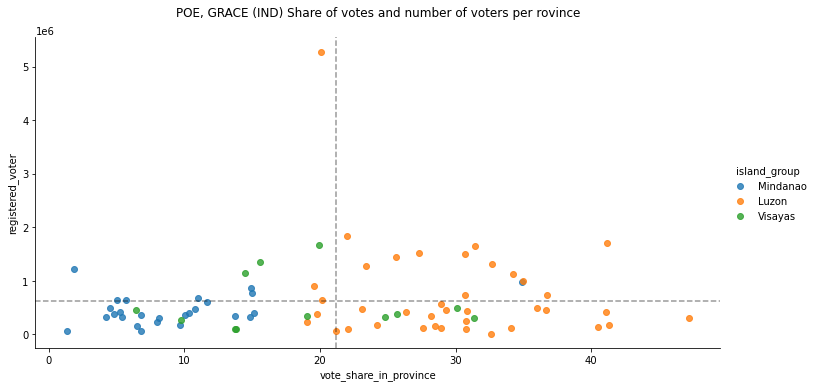

In [128]:
##########################################################
# Shares of votes and number of voters per province : POE
##########################################################

# plot the scatter plot for Poe
cand = 'POE, GRACE (IND)'

# data processing
pres_votes = (dfp[(dfp['bName'] == cand)]
              .groupby(['Region', 'Province'])['votes'].sum())
total_votes = (dfp[['Region', 'Province', 'City/Municipality', 'votes']]
               .groupby(['Region', 'Province'])['votes'].sum())
share_per_province = (pres_votes / total_votes * 100)
registered_voters = dfp[['Region', 'Province',  'registered_voter']]
registered_voters = registered_voters.drop_duplicates(keep='first')
registered_voters = (registered_voters
                     .groupby(['Region', 'Province'])['registered_voter']
                     .sum())
share_per_province = (pd.merge(share_per_province,
                               registered_voters,
                               left_index=True,
                               right_index=True)
                      .reset_index(['Region', 'Province']))
share_per_province = (share_per_province
                      .rename(columns={'votes':'vote_share_in_province'}))
share_per_province['island_group'] = (share_per_province['Region']
                                       .apply(island_group))

# plot the scatter plot
sns.lmplot(data=share_per_province, x='vote_share_in_province', 
       y='registered_voter', height=5, aspect=2, fit_reg=False,
       hue='island_group', sharex='col')
plt.title(f'{cand} Share of votes and number of voters ' 
          'per rovince\n', fontsize=font_title);
plt.axhline(share_per_province['registered_voter'].mean(),
            color='k', linestyle='--', alpha=0.4)
plt.axvline(share_per_province['vote_share_in_province'].mean(),
            color='k', linestyle='--', alpha=0.4)
plt.show();

Among them three, it is Poe who has benefited most from vote-rich provinces. **Poe’s performance is seen in the figure above, where she won most provinces in Luzon, including those considered vote-rich as seen in the upper right of the chart (or quadrant 1)**. In the absence of Poe in Luzon - that is, if her citizenship status remained an unresolved issue - it would be interesting to see if it would have benefitted Duterte more, leading to a landslide win, instead of Roxas.

#### <span style="color:#2f50a2;">Vice-presidential results</span>

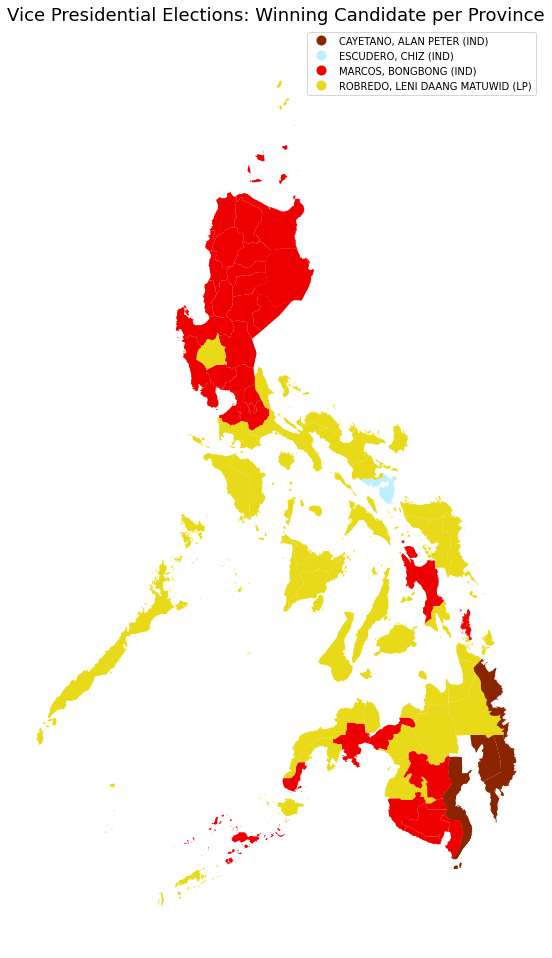

In [129]:
replace_provinces = {'COTABATO (NORTH COT.)': 'NORTH COTABATO',
                     'SAMAR (WESTERN SAMAR)': 'SAMAR',
                     'NATIONAL CAPITAL REGION - FOURTH DISTRICT':
                     'METROPOLITAN MANILA',
                     'NATIONAL CAPITAL REGION - SECOND DISTRICT':
                     'METROPOLITAN MANILA',
                     'NATIONAL CAPITAL REGION - THIRD DISTRICT':
                     'METROPOLITAN MANILA'}
dfv = dfv.replace({'Province': replace_provinces})
dfv['Province'] = dfv['Province'].str.title()

ph_locations = ph_locations.rename(columns={'City/Municipality': 'Province'})
replace_provinces = {'COTABATO (NORTH COT.)': 'NORTH COTABATO',
                     'SAMAR (WESTERN SAMAR)': 'SAMAR',
                     'NATIONAL CAPITAL REGION - FOURTH DISTRICT':
                     'METROPOLITAN MANILA',
                     'NATIONAL CAPITAL REGION - SECOND DISTRICT':
                     'METROPOLITAN MANILA',
                     'NATIONAL CAPITAL REGION - THIRD DISTRICT':
                     'METROPOLITAN MANILA'}
ph_locations = ph_locations.replace({'Province': replace_provinces})
ph_locations['Province'] = ph_locations['Province'].str.title()
new_data = pd.merge(ph_locations, dfv, on='Province')
new_data = new_data.dropna(axis=1)


# transforming the new data

results = new_data[['Region', 'Province', 'City/Municipality',
                    'bName', 'votes', 'registered_voter']]

# aggregate votes per each region
results = (results.groupby(['Province', 'bName'])['votes'].sum()
                  .reset_index(['Province', 'bName']))

# # identify top 1 candidate per each region
top_1 = {'Province': [], 'Winner': []}
for province in new_data['Province'].unique():
    max_region = results[results['Province'] == province]['votes'].max()
    results[results['votes'] == max_region]['bName'].values[0]
    top_1['Province'].append(province)
    (top_1['Winner'].append(results[results['votes'] == max_region]
                            ['bName'].values[0]))


top_1 = pd.DataFrame(top_1)
provincial_turnout = pd.merge(ph_locations, top_1, on='Province', how='left')


provincial_turnout['geometry'] = (provincial_turnout
                                  .apply(lambda x:
                                         Point((x['Longitude'],
                                                x['Latitude'])),
                                         axis=1))


# transform pandas dataframe to a geodataframe
geo_data = gpd.GeoDataFrame(provincial_turnout,
                            crs=phil_map.crs,
                            geometry=provincial_turnout.geometry)

cmap_vp = ListedColormap(['#8b2500', '#bfefff', '#ee0000', '#e8da19'])

result_data = gpd.sjoin(phil_map, geo_data, op='contains')

fig, ax = plt.subplots(1, figsize=(10, 17))
ax = result_data.plot(ax=ax, cmap=cmap_vp, column='Winner', legend=True,
                      categorical=True, legend_kwds={'loc': 'upper right'})
plt.axis('off')
plt.title('Vice Presidential Elections: '
          'Winning Candidate per Province', fontsize=18)
plt.show()

The Vice-Presidential race was much closer and dragged longer than expected:
1. Robredo won in provinces across Luzon, Visayas, and Mindanao. She was strongest in Visayas, where all regions voted for her except Biliran and Leyte. This is unsurprising, as Imelda Marcos, Bongbong’s mother, comes from the latter.
2. Marcos also won across all island groups, but is strongest in Luzon. The “solid North” vote remained uncontested, where he received votes from all Ilocos regions and the Cordillera Administrative Region. He won eight provinces in Mindanao; it was also here where his poll protest was based on. He was eventually defeated as declared by the Supreme Court.

*In focus: Do vote-rich provinces ensure winnability for the Vice Presidency?*



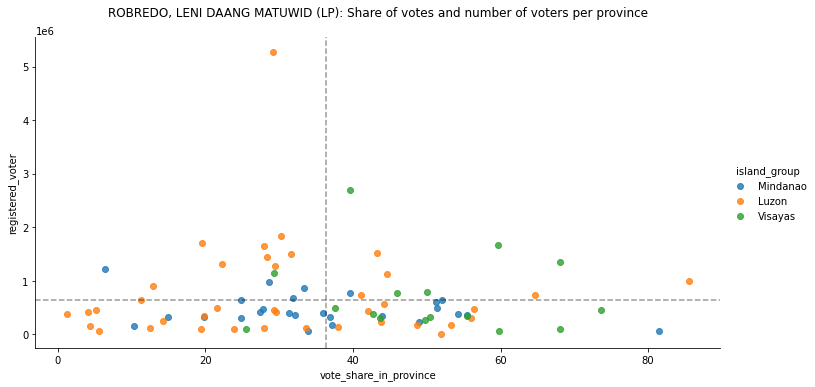

In [130]:
##############################################################
# Shares of votes and number of voters per province : ROBREDO
#############################################################

# plot the scatter plot for Robredo
cand = 'ROBREDO, LENI DAANG MATUWID (LP)'

# data processing
pres_votes = (dfv[(dfv['bName'] == cand)]
              .groupby(['Region', 'Province'])['votes'].sum())
total_votes = (dfv[['Region', 'Province', 'City/Municipality', 'votes']]
               .groupby(['Region', 'Province'])['votes'].sum())
share_per_province = (pres_votes / total_votes * 100)
registered_voters = dfv[['Region', 'Province', 'registered_voter']]
registered_voters = registered_voters.drop_duplicates(keep='first')
registered_voters = (registered_voters
                     .groupby(['Region', 'Province'])
                     ['registered_voter'].sum())
share_per_province = (pd.merge(share_per_province,
                               registered_voters,
                               left_index=True,
                               right_index=True)
                      .reset_index(['Region', 'Province']))
share_per_province = (share_per_province
                      .rename(columns={'votes':'vote_share_in_province'}))
share_per_province['island_group'] = (share_per_province['Region']
                                       .apply(island_group))
# plotting
sns.lmplot(data=share_per_province, x='vote_share_in_province', 
       y='registered_voter', height=5, aspect=2, fit_reg=False,
       hue='island_group', sharex='col')
plt.title(f'{cand}: Share of votes and number of voters ' 
          'per province\n', fontsize=font_title)
plt.axhline(share_per_province['registered_voter'].mean(),
            color='k', linestyle='--', alpha=0.4)
plt.axvline(share_per_province['vote_share_in_province'].mean(),
            color='k', linestyle='--', alpha=0.4);
plt.show()

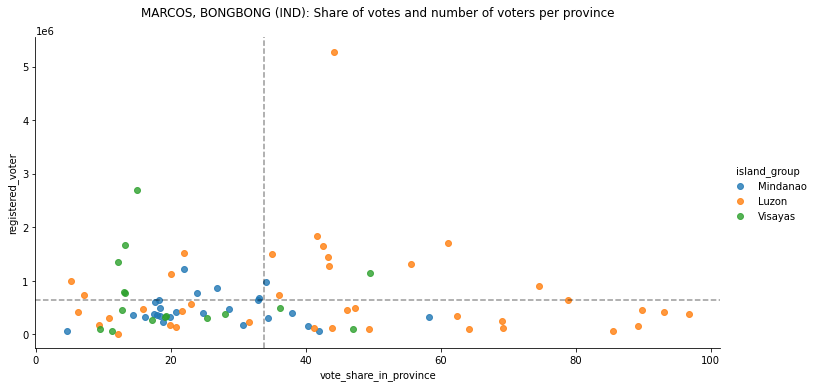

In [131]:
##############################################################
# Shares of votes and number of voters per province : MARCOS
#############################################################

# plot the scatter plot for Marcos
cand = 'MARCOS, BONGBONG (IND)'

# data processing
pres_votes = (dfv[(dfv['bName'] == cand)]
              .groupby(['Region', 'Province'])['votes'].sum())
total_votes = (dfv[['Region', 'Province', 'City/Municipality', 'votes']]
               .groupby(['Region', 'Province'])['votes'].sum())
share_per_province = (pres_votes / total_votes * 100)
registered_voters = dfv[['Region', 'Province',  'registered_voter']]
registered_voters = registered_voters.drop_duplicates(keep='first')
registered_voters = (registered_voters
                     .groupby(['Region', 'Province'])
                     ['registered_voter'].sum())
share_per_province = (pd.merge(share_per_province,
                               registered_voters,
                               left_index=True,
                               right_index=True)
                      .reset_index(['Region', 'Province']))
share_per_province = (share_per_province
                      .rename(columns={'votes':'vote_share_in_province'}))
share_per_province['island_group'] = (share_per_province['Region']
                                       .apply(island_group))
# plotting
sns.lmplot(data=share_per_province, x='vote_share_in_province', 
       y='registered_voter', height=5, aspect=2, fit_reg=False,
       hue='island_group', sharex='col')
plt.title(f'{cand}: Share of votes and number of voters ' 
          'per province\n', fontsize=font_title)
plt.axhline(share_per_province['registered_voter'].mean(),
            color='k', linestyle='--', alpha=0.4)
plt.axvline(share_per_province['vote_share_in_province'].mean(),
            color='k', linestyle='--', alpha=0.4);
plt.show()

Focusing on the Vice-Presidential elections, we see similar broken lines representing the same average vote shares. This is expected, given that Robredo has won over Marcos by just 15,000 votes.

**Robredo’s vote shares shows that her results were quite similar to Duterte - at least insofar as focusing on smaller provinces to clinch a win.** While she was the weaker candidate in Luzon’s vote-rich areas, she fared better than expected as her performance was nearer the average (see the upper left or quadrant 2 of the figure above). This could be attributed to party machinery, where the Liberals are present all throughout the country. Winning a few more vote-rich provinces in Luzon may have provided her a more comfortable win without contest.

**Marcos, on the other hand, won most of Luzon, including its vote-rich provinces.** It appears he focused on these areas, as he was weakest among Visayan and Mindanaoan provinces with smaller vote shares - reminiscent of Poe’s performance. Compared to Robredo, he might have won if he focused more on these smaller provinces - but without a political machinery to back him up, along with the historical baggage his political dynasty is linked to - the cards are stacked against him.

#### <span style="color:#2f50a2;">President-Vice President tandem per province</span>

In [132]:
def color_cell_by_candidate(candidate, text_color='black', bgcolor=None):
    """Fill the background color of dataframe's cell based on a condition.

    Parameters
    ----------
    candidate : object
    text_color: str
        initial text color
    bgcolor:
        initial background color

    Returns
    -------
    str
        CSS code to format the cell
    """
    pres_list = ['DUTERTE', 'ROXAS', 'POE', 'BINAY', 'DEFENSOR']
    vp_list = ['CAYETANO', 'ROBREDO', 'ESCUDERO', '', 'MARCOS']
    if candidate.startswith(pres_list[0]) or candidate.startswith(vp_list[0]):
        bgcolor = '#8b2500'
        text_color = 'white'
    elif (candidate.startswith(pres_list[1])
          or candidate.startswith(vp_list[1])):
        bgcolor = '#e8da19'
    elif (candidate.startswith(pres_list[2])
          or candidate.startswith(vp_list[2])):
        bgcolor = '#bfefff'
    elif candidate.startswith(pres_list[3]):
        bgcolor = '#0014ff'
        text_color = 'white'
    elif (candidate.startswith(pres_list[4])
          or candidate.startswith(vp_list[4])):
        bgcolor = '#ee0000'
    return f'background-color: {bgcolor}; color:{text_color}'


def island_group(x):
    """Assign a region to a particular Island Group.

    Parameters
    ----------
    x : object

    Returns
    -------
    str
        Corresponding island group of input x
    """
    luzon = ['NCR',
             'CAR',
             'REGION I',
             'REGION II',
             'REGION III',
             'REGION IV-A',
             'REGION IV-B',
             'REGION V']
    visayas = ['REGION VI',
               'REGION VII',
               'REGION VIII']
    mindanao = ['REGION IX',
                'REGION X',
                'REGION XI',
                'REGION XII',
                'REGION XIII',
                'ARMM']
    if x in luzon:
        x = 'LUZON'
    elif x in visayas:
        x = 'VISAYAS'
    elif x in mindanao:
        x = 'MINDANAO'
    return x


dfv = pd.read_csv('vp_conso.csv')
dfp = pd.read_csv('pres_conso.csv')
ser_vp = dfv.groupby(['Region', 'bName'])['votes'].sum()
ser_p = dfp.groupby(['Region', 'bName'])['votes'].sum()
dfv_reg = dfv.groupby(['Region'])['votes'].sum()
df_rv_reg = dfv[['Region', 'registered_voter']].drop_duplicates()
df_rv_reg = df_rv_reg.groupby('Region')['registered_voter'].sum()
# computing regional turnouts
df_turnout_reg = pd.merge(dfv_reg,
                          df_rv_reg,
                          left_index=True,
                          right_index=True)
df_turnout_reg['turnout'] = (df_turnout_reg.votes * 100 /
                             df_turnout_reg.registered_voter)
df_turnout_reg = df_turnout_reg.reset_index().sort_values(by='turnout',
                                                          ascending=False)
# computing top and bottom 10 regions in terms of turnout
top10_R = df_turnout_reg.reset_index(drop=True)[['Region', 'turnout']][:10]
top10_R.index = range(1, 11)
bot10_r = df_turnout_reg.reset_index(drop=True)
bot10_r = bot10_r[['Region', 'turnout']].tail(10)
region_tuple = tuple(dfp.Region.unique())
vp_winners = pd.Series(
    [winner_region(ser_vp, reg)[0] for reg in region_tuple],
    index=region_tuple, name='VP'
)
pres_winners = pd.Series(
    [winner_region_pres(ser_p, reg)[0] for reg in region_tuple],
    index=region_tuple, name='President'
)
df_winners = pd.DataFrame([pres_winners, vp_winners]).T
df_winners = df_winners.reset_index()
df_winners['Island Group'] = df_winners['index'].apply(island_group)
df_winners = df_winners.rename(columns={'index':'Region'})[['Region',
                                                            'Island Group',
                                                            'President','VP']]
df_winners['Island Group'] = pd.Categorical(
    df_winners['Island Group'],
    ['LUZON','VISAYAS','MINDANAO']
)
df_winners = df_winners.sort_values(by=['Island Group','Region'])
df_winners = df_winners.set_index('Region')
x = list(zip(df_winners['Island Group'],df_winners.index))
index = pd.MultiIndex.from_tuples(x, names=["Island Group", "Region"])
df_winners.index = index
df_winners = df_winners.drop('Island Group', axis=1)
df_winners_colored = df_winners.style.applymap(color_cell_by_candidate)
df_winners_colored

Voters do not vote for a party; they vote for individual candidates (or, as what political scientists would describe, they vote for personalities/celebrities). 2016 was no different, as it was only Region 11 (Davao Region) who voted for the Duterte-Cayetano tandem.


## <span style="color:#2f50a2;">Summary of Results and Conclusion</span>

The Philippines has been one of the most engaged electorate in Asia, with almost 80% voter turnout from 1945 to 2010 ([Holmes, 2016](#holmes)). While this appears higher than average than across Asean peers, there is a much more colorful story to tell when get a closer look at the data especially in defining the baluartes of a candidate. The main objective of this Study is to explore the differences among voter profiles and election outcomes of the candidates’ winning regions and provinces (the baluartes). Guided by our six-step methodology [(Section 5)](#S5), we summarize the main findings as follows:

1. The geographic baluartes of the candidates are described as follows: 
 - *Presidential baluartes*: Duterte has captured most of the votes of Mindanao and least of the Luzon areas. Roxas received the most votes from a majority of Visayan provinces, especially from Region 6, where the Roxas political dynasty resides. Poe held most of Luzon provinces. 
 - *Vice Presidential baluartes*: Robredo won in provinces across Luzon, Visayas, and Mindanao. She was strongest in Visayas, where all regions voted for her except Biliran and Leyte. Marcos also won across all island groups, but is strongest in Luzon. The “solid North” vote remained uncontested, where he received votes from all Ilocos regions and the Cordillera Administrative Region. 
2. Beyond geographical baluartes, we unearthed select insights on voter profiles of the winning candidates:
 - *Age*: Duterte appears to be popular across all age groups, while Roxas is popular with younger voters, and Poe with older voters. Robredo is popular among younger voters while Marcos with older voters. 
 - *Marital status*: Duterte won in provinces with more single voters, while Binay is popular among provinces with more married ones. Unlike the presidential bets, Robredo and Marcos both appear to be popular among single and married registered voters.
 - *Literacy rate*: Duterte is popular among provinces that have the highest and lowest literacy rate (i.e. polarized literacy rates). Marcos dominates provinces with the highest literacy rate while Robredo is popular among the lowest ones. 
 - *Voter turnouts*: Duterte predominantly won in regions with less-than-average voter turnouts (mostly Mindanaoans), while Poe garnered the highest votes in regions that have higher-than-average. Robredo won in more regions with less-than-average voter turnout, despite the “Solid North” support to Marcos.
3. The most significant difference between the provinces with high voter turnout and low voter turnout is their literacy rate. High voter turnout regions have higher literacy rates (around 98%) on average, while low voter turn out regions have lower (around 92%).
4. Mindanao regions and provinces have less-than-average number of registered voters and voter turnouts, but their unified voting-choice led to the win of the Duterte-Robredo presidential and vice presidential race. 
5. Duterte’s votes are polarized in Mindanao, while Robredo’s votes come from vote-rich provinces (i.e. higher than average registered voters) across all main island groups. 
6. Voters across all regions do not vote for a party (or tandem); they vote for individual candidates. It was only Region 11 (Davao Region) who voted for the Duterte-Cayetano tandem.

We hope that this exploratory study would not only help candidates to identify their bailiwicks, but more to support government leaders and non-profit efforts towards targeted voter engagement and registration of the upcoming 2022 elections, which has been made difficult due to government restrictions during the COVID-19 pandemic. Moreover, we hope that this extended definition of baluartes helps the candidates better strategize their campaign strategy in the upcoming elections, especially the servant leaders who put the country’s welfare first instead of their own. 

## <span style="color:#2f50a2;">Recommendations</span>

Our recommendations for next steps and avenues of further research are as follows. We also have the limitations of the Study in mind with the following future considerations:
1. We have only focused on the Presidential and Vice-Presidential race, and have excluded other political positions. Considering other factors, such as political parties, is worth exploring to appreciate a complete picture of the 2016 national elections. This may be important given that most of the political dynamism is found at the local level (for example, Duterte, Aquino, and Estrada started out as representatives of each of their provinces/cities.); 
2. We did not validate the raw data in Jojie with other external sources, such as counts from election watchdogs or the media, in the interest of time. Our findings would benefit from further validation and review; and
3. We focused on an exploratory analysis approach for this study, specifically, describing the profile of the regions/provinces where each of the candidates won. Future researchers may further explore predicting, and not merely describing, the effect of a voter’s demographic profile on his/her candidate of choice.


## <span style="color:#2f50a2;">References</span>

[1] <a id='abinales'>Abinales, PN.</a> (2016). The 2016 Philippine elections: local power as national authority. *Asia Pacific Bulletin*, 344. East-West Center. Retrieved from https://scholarspace.manoa.hawaii.edu/bitstream/10125/41060/apb%20no.344.pdf

[2] <a id='alis'>Alis, C.</a> (2016). *scrapER2016* [electronic resource: python source code]. *Asia Pacific Bulletin*, 344. East-West Center. Retrieved from https://github.com/ianalis/scraper2016

[3] <a id='ansolabehere'>Ansolabehere, S. & Hersh, E.</a> (2011). Gender, race, age, and voting: a research note. *APSA 2011 Meeting Paper*. Retrieved from https://ssrn.com/abstract=1901654

[4] <a id='arugay'>Arugay, AA.</a> (2017). The Philippines in 2016: the electoral earthquake and its aftershocks. *Southeast Asian Affairs*, 277-296. doi:10.2307/26492610

[5] <a id='arugay'>Curato, N.</a> (2016). Politics of anxiety, politics of hope: penal populism and Duterte's rise to power. *Journal of Current Southeast Asian Affairs*, 35(3), 91-109. 

[6] <a id='DS'>David, C. C., & San Pascual, M. R. S. (2016).</a> Predicting vote choice for celebrity and political dynasty candidates in Philippine national elections. Philippine Political Science Journal, 37(2), 82–93. https://doi.org/10.1080/01154451.2016.1198076

[7] <a id='fermin'>Fermin, A.</a> (2001). Prospects and scenarios for the party list system in the Philippines. *Friedrich Ebert Stiftung Online Papers*. Retrieved from https://library.fes.de/pdf-files/bueros/philippinen/50074.pdf

[8] <a id='holmes'>Holmes, RD.</a> (2016). The dark side of electoralism: opinion polls and voting in the 2016 Philippine presidential election. *Journal of Current Southeast Asian Affairs*, 35(3), 15-38.

[9] <a id='IWGIA'>Indigenous World 2020: Philippines. (2020, May 11)</a>. IWGIA - International Work Group for Indigenous Affairs. https://www.iwgia.org/en/philippines/3608-iw-2020-philippines.html

[10] <a id='TM'>INTERACTIVE: How voter turnout has changed in 1,611 Philippine towns & cities since 2007.</a> (2016, April 18). Thinking Machines. https://stories.thinkingmachin.es/election-turnout/

[11] <a id='jallorina'>Jallorina, LB.</a> (2021). Party-list perversion in the Philippines: An analysis on the rise of spurious party-list groups and its effect on the current legal framework of the party-list system. Retrieved from https://animorepository.dlsu.edu.ph/etdm_law/1

[12] <a id='lande'> Landé, C.</a> 1996. Post-Marcos Politics: A Geographical and Statistical Analysis of the 1992
Presidential Election. Singapore: Institute of Southeast Asian Studies.

[13] <a id='mcdermott'>McDermott, ML.</a> (1998). Race and gender in low-information elections. *Political Research Quarterly*, 51(4), 895-918. doi:10.2307/449110

[14] <a id='PSA'>Philippine Statistics Authority.</a> (2013). Persons with Disability in the Philippines (Results from the 2010 Census) | Philippine Statistics Authority. https://psa.gov.ph/content/persons-disability-philippines-results-2010-census

[15] <a id='Rappler'>Rappler.com.</a> (2015, July 28). ‘Philandering’ Rodrigo Duterte cause of marriage annulment. Rappler. https://www.rappler.com/newsbreak/inside-track/philandering-rodrigo-duterte-marriage-annulment

[16] <a id='SBL'>Schraufnagel, S., Buehler, M., & Lowry-Fritz, M.</a> (2014). Voter Turnout in Democratizing Southeast Asia A Comparative Analysis of Electoral Participation in Five Countries. Taiwan Journal of Democracy, 10(1). https://eprints.soas.ac.uk/18940/1/SchraufnagelBuehlerLowryToD2014.pdf

[17] <a id='SOTP'>Senate of the Philippines.</a> (2016). Press Release - Poe backed by Ilocos officials. http://legacy.senate.gov.ph/press_release/2016/0426_poe5.asp

[18] <a id='teehankee'>Teehankee, JC.</a> (2020). Untangling the party list system. In Hutchcroft, PD. (Ed.), *Strong patronage, weak parties*, (pp. 151-167). World Scientific. doi:10.1142/9789811212604_0009

[19] <a id='teehankee-2'>Teehankee, JC.</a> (2018). Regional dimensions of the 2016 general elections in the Philippines: Emerging contours of federalism. *Regional and Federal Studies*, 28(3), 383-394. doi:10.1080/13597566.2018.1454911

## <span style="color:#2f50a2;">Appendix</span>

*Supporting code: The code below is for Figure 1*

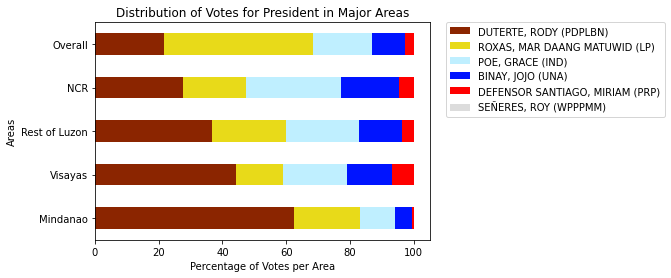

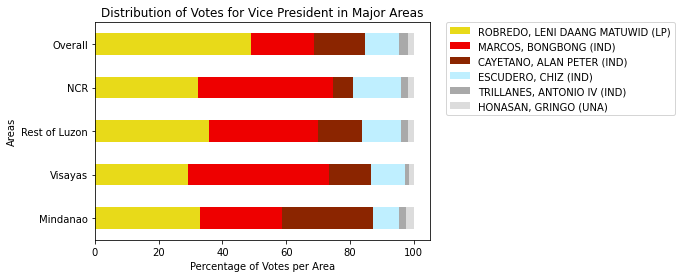

In [133]:
###############################################
# DISTRIBUTION OF VOTES PER AREA FOR PRESIDENT
###############################################

# classify regions according to Rest of Luzon, Visayas, Mindanao, NCR
distp = dfp.replace({'Region' : {'REGION I':'Rest of Luzon',
                                 'CAR':'Rest of Luzon',
                                 'REGION II':'Rest of Luzon',
                                 'REGION III':'Rest of Luzon',
                                 'REGION IV-A':'Rest of Luzon',
                                 'REGION IV-B':'Rest of Luzon',
                                 'REGION V':'Rest of Luzon',
                                 'REGION VI':'Visayas',
                                 'REGION VII':'Visayas',
                                 'REGION VIII':'Visayas',
                                 'REGION IX':'Mindanao',
                                 'REGION X':'Mindanao',
                                 'REGION XI':'Mindanao',
                                 'REGION XII':'Mindanao',
                                 'REGION XIII':'Mindanao',
                                 'ARMM':'Mindanao'}})
distp = distp.rename(columns={'Region':'Area'})
distp = distp[['Area', 'bName', 'votes']]
distp = distp.groupby(['Area', 'bName'])['votes'].sum().reset_index()

# generate percentage of votes per candidate per area
areap = pd.DataFrame(columns=['Area', 'bName', 'percent_share'])
areas = ['Mindanao', 'Visayas', 'Rest of Luzon', 'NCR']
for i in areas:
    m = distp[distp.Area == i]
    m['total'] = m.votes.sum()
    m['percent_share'] = m.votes / m.total * 100
    m = m.drop(['votes', 'total'], axis = 1)
    areap = pd.concat([areap, m])

# generate percentage of votes nationwide
nationalp = dfp.replace({'Region':{'REGION I':'Rest of Luzon',
                                 'CAR':'Rest of Luzon',
                                 'REGION II':'Rest of Luzon',
                                 'REGION III':'Rest of Luzon',
                                 'REGION IV-A':'Rest of Luzon',
                                 'REGION IV-B':'Rest of Luzon',
                                 'REGION V':'Rest of Luzon',
                                 'REGION VI':'Visayas',
                                 'REGION VII':'Visayas',
                                 'REGION VIII':'Visayas',
                                 'REGION IX':'Mindanao',
                                 'REGION X':'Mindanao',
                                 'REGION XI':'Mindanao',
                                 'REGION XII':'Mindanao',
                                 'REGION XIII':'Mindanao',
                                 'ARMM':'Mindanao'}})
nationalp = nationalp.rename(columns={'Region':'Area'})
nationalp = nationalp.groupby(['bName'])['votes'].sum().reset_index()
nationalp['percent_share'] = nationalp.votes / nationalp.votes.sum() * 100
nationalp = nationalp[['bName', 'percent_share']]
nationalp['Area'] = 'Overall'
nationalp = nationalp[['Area', 'bName', 'percent_share']]

# merge the two dataframes and pivot to prepare for plotting
areap = pd.concat([areap, nationalp])
areap = areap.pivot(index='Area', columns='bName').reset_index()
areap.columns = areap.columns.get_level_values(1)
areap['Area'] = ['Mindanao', 'Visayas', 'Rest of Luzon', 'NCR', 'Overall']
areap = areap[['Area',
               'DUTERTE, RODY (PDPLBN)',
               'ROXAS, MAR DAANG MATUWID (LP)',
               'POE, GRACE (IND)',
               'BINAY, JOJO (UNA)',
               'DEFENSOR SANTIAGO, MIRIAM (PRP)',
               'SEÑERES, ROY (WPPPMM)']]


# generate the plot
areap.plot(x='Area', 
           kind='barh', 
           stacked=True, 
           mark_right=True,
          color = palettep)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.ylabel('Areas')
plt.xlabel('Percentage of Votes per Area')
plt.title('Distribution of Votes for President in Major Areas')
plt.show()

####################################################
# DISTRIBUTION OF VOTES PER AREA FOR VICE PRESIDENT
####################################################

# classify regions according to Rest of Luzon, Visayas, Mindanao, NCR
distv = dfv.replace({'Region':{'REGION I':'Rest of Luzon',
                                 'CAR':'Rest of Luzon',
                                 'REGION II':'Rest of Luzon',
                                 'REGION III':'Rest of Luzon',
                                 'REGION IV-A':'Rest of Luzon',
                                 'REGION IV-B':'Rest of Luzon',
                                 'REGION V':'Rest of Luzon',
                                 'REGION VI':'Visayas',
                                 'REGION VII':'Visayas',
                                 'REGION VIII':'Visayas',
                                 'REGION IX':'Mindanao',
                                 'REGION X':'Mindanao',
                                 'REGION XI':'Mindanao',
                                 'REGION XII':'Mindanao',
                                 'REGION XIII':'Mindanao',
                                 'ARMM':'Mindanao'}})
distv = distv.rename(columns={'Region':'Area'})
distv = distv[['Area', 'bName', 'votes']]
distv = distv.groupby(['Area', 'bName'])['votes'].sum().reset_index()

# generate percentage of votes per candidate per area
areav = pd.DataFrame(columns=['Area', 'bName', 'percent_share'])
areas = ['Mindanao', 'Visayas', 'Rest of Luzon', 'NCR']
for i in areas:
    m = distv[distv.Area == i]
    m['total'] = m.votes.sum()
    m['percent_share'] = m.votes / m.total * 100
    m = m.drop(['votes', 'total'], axis = 1)
    areav = pd.concat([areav, m])

# generate percentage of votes nationwide
nationalv = dfv.replace({'Region':{'REGION I':'Rest of Luzon',
                                 'CAR':'Rest of Luzon',
                                 'REGION II':'Rest of Luzon',
                                 'REGION III':'Rest of Luzon',
                                 'REGION IV-A':'Rest of Luzon',
                                 'REGION IV-B':'Rest of Luzon',
                                 'REGION V':'Rest of Luzon',
                                 'REGION VI':'Visayas',
                                 'REGION VII':'Visayas',
                                 'REGION VIII':'Visayas',
                                 'REGION IX':'Mindanao',
                                 'REGION X':'Mindanao',
                                 'REGION XI':'Mindanao',
                                 'REGION XII':'Mindanao',
                                 'REGION XIII':'Mindanao',
                                 'ARMM':'Mindanao'}})
nationalv = nationalv.rename(columns={'Region':'Area'})
nationalv = nationalv.groupby(['bName'])['votes'].sum().reset_index()
nationalv['percent_share'] = nationalv.votes / nationalv.votes.sum() * 100
nationalv = nationalv[['bName', 'percent_share']]
nationalv['Area'] = 'Overall'
nationalv = nationalv[['Area', 'bName', 'percent_share']]

# merge the two dataframes and pivot to prepare for plotting
areav = pd.concat([areav, nationalv], ignore_index=True)
areav = areav.pivot(index='Area', columns='bName').reset_index()
areav.columns = areav.columns.get_level_values(1)
areav['Area'] = ['Mindanao', 'Visayas', 'Rest of Luzon', 'NCR', 'Overall']
areav = areav[['Area',
               'ROBREDO, LENI DAANG MATUWID (LP)',
              'MARCOS, BONGBONG (IND)',
              'CAYETANO, ALAN PETER (IND)',
              'ESCUDERO, CHIZ (IND)',
              'TRILLANES, ANTONIO IV (IND)',
              'HONASAN, GRINGO (UNA)']]

# generate the plot
areav.plot(x='Area', 
           kind='barh', 
           stacked=True, 
           mark_right=True,
          color = palettev)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.ylabel('Areas')
plt.xlabel('Percentage of Votes per Area')
plt.title('Distribution of Votes for Vice President in Major Areas')
plt.show()

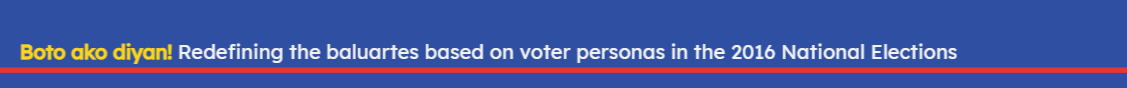